# The second part of the assignment, IDS 2021-2022
In this Jupyter notebook document all your results and the way you have obtained them. Please use the _Python environment_ provided for this part of the assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing  other outputs you have generated that are not included in this notebook (such as pdf, jpg, and others). Please make sure that the other outputs are easily identifiable, i.e. use names as requested in the corresponding question. _You do not need to include the datasets._

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> Please make sure to include the names and matriculation numbers of all group members in the slot provided below. </font> If a name or a student id is missing, the student will not receive any points.

<font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


Overall points: 76/100. Q1: 19,5/20 points. Feedback: d) -0.5pts Total population is sometimes 0, do not comment on such outliers //Q2: 7,5/15 points. Feedback:a) -1.5pts not in the same histogram b) -1pts: the reasoning does not mention the we should weight by the population d) -5 pts: didn't show anything //Q3: 11/12 points. Feedback: (c) 1: (-0.5) Join function is not correct (You have to filter for len(intersec)==len(itemset1)-1 ); (c) 3: (-0.5) The number of frequent itemsets of size 4 is missing in the plot //Q4: 15/15 points. Feedback: Well Done! //Q5: 23/23 points. Feedback: //Q6: 0/15 points. Feedback: missing solutions

<font color="red"><b>Student Names and IDs:
    
    1. Kenny Yung 416070
    
    2. Fasile Ayalew 432884
    
    3. 

# Setup

In [1]:
### Display
from IPython.core.display import display, HTML

### Widgets
#import ipywidgets as widgets 

### Data Handline
import pandas as pd
import numpy as np

### Utility
import math
import string
import datetime
import pickle

### Plotting
# Matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
# Matplotlib toolkits
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Seaborn
import seaborn as sns
# Plotly
import pip
# pip.main(['install', 'plotly'])
import plotly.graph_objects as go
# Gespatial data with cartopy
# pip.main(['install', 'cartopy'])
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


### Frequent Pattern Mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules as arule

### Text Mining
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

### PM4Py
import pm4py
# Log Handling
from pm4py.objects.conversion.log import converter as log_converter
# Statistics
from pm4py.statistics.traces.generic.log import case_statistics
# Filtering
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.algo.filtering.log.attributes import attributes_filter
# Discovery and Conformance Checking
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.objects.conversion.process_tree import converter as pt_converter
# Visualization
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer

In [2]:
# Pandas indexing
idx = pd.IndexSlice

Be careful if you use the **matplotlib widget** magic. If you do not close the created plots, previous plots may change if you create a new one.
So if you use this magic command, be careful about your outputs in your final submission.

In [3]:
%matplotlib inline

# Q1 - Preprocessing (20 points)
In this question, we consider a US-census dataset (**census_data.csv**).
Each row contains statistics of a certain tract on a variety of, particularly income- and work-related, life aspects of US citizens.
Short column description:

| Column | Description |
| ------ | ----------- |
| CensusTract | Tract |
| State | State |
| County | County |
| TotalPop | Total population  |
| Men | Number of men |
| Women | Number of women |
| Hispanic, White, Black, Native, Asian, Pacific | Percentage of ethnic group |
| Citizen | Percentage of citizen |
| Income | Median household income |
| IncomePerCap | Income per capita |
| Poverty | Poverty rate |
| ChildPoverty | Child poverty rate |
| Professional | Employed in management, business, science, and arts (percentage) |
| Service, Office, Construction, Production | Other profession fields (percentage) |
| PrivateWork, PublicWork | Employed in private / public sector (percentage) |
| Drive, Carpool, Transit, Walk, OtherTransp | Means of commuting (percentage) |
| WorkAtHome | Working at home (percentage) |
| MeanCommute | Mean time for commuting |
| Employed | Number of employed |
| SelfEmployed | Self-employed (percentage) |
| FamilyWork | Unpaid family work (percentage) |
| Unemployment | Unemployment rate |


## Loading the Data and Initial Quality Investigation

**a)** Load the dataset into a dataframe `df`. <font color='red'>Use the CensusTract as index for your dataframe</font>. In doing so, ensure that the index is valid, that is, it does not contain any duplicate entries.

**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [4]:
df = pd.read_csv("dataset/census_data.csv", index_col="CensusTract")
print("Done")

Done


**b)** Show the data types of the dataframe columns as well as the first few rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)? 

In [5]:
pd.set_option('display.max_colwidth', None)
print(df.dtypes)
display(HTML(df.head().to_html()))

State            object
County           object
TotalPop          int64
Men             float64
Women           float64
Hispanic        float64
White           float64
Black           float64
Native          float64
Asian           float64
Pacific         float64
Citizen           int64
Income          float64
IncomePerCap    float64
Poverty         float64
ChildPoverty    float64
Professional    float64
Service         float64
Office          float64
Construction    float64
Production      float64
Drive           float64
Carpool         float64
Transit         float64
Walk            float64
OtherTransp     float64
WorkAtHome      float64
MeanCommute     float64
Employed          int64
PrivateWork     float64
PublicWork      float64
SelfEmployed    float64
FamilyWork      float64
Unemployment    float64
dtype: object


Answer:

We might have some inconsistent dtype for example `TotalPop: int64` and `Men`,  `Women` being `float64`. This is still no issue tho. 


**c)** To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable. 
Are there any categorical column candidates? Explain your answer. \
Afterwards, convert these columns into categorical columns.

In [6]:
df["State"] = df["State"].astype('category')
df["County"] = df["County"].astype('category')

print(df["State"].dtype)
print(df["County"].dtype)

category
category


Answer: 

Obvious choice is `State` and `County`. There are fixed state and counties in the usa. We can use pandas.cut to get percentages and absolute values into categories. This is often used as data anonymization technique but we would loose some information. This course is not aiming to teach data anonymization so we can stick with our first two categories.

**d)** To select a good strategy to deal with missing data, it is important to get an overview over the general data distribution.
Show the basic statistics for the dataset and create 6 boxplots for the following column groupings:

    ['TotalPop', 'Men', 'Women', 'Citizen', 'Employed'],
    ['Income', 'IncomePerCap'],
    ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
    ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Poverty', 'ChildPoverty'],
    ['Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome'],
    ['MeanCommute']

Can you spot any (severe) data quality problems, in particular, are there unrealistic values (also considering the semantics)?

*Hint: Use the `df.describe()` function.*

In [7]:
descr_1 = df[['TotalPop', 'Men', 'Women', 'Citizen', 'Employed']]
descr_2 = df[['Income', 'IncomePerCap']]
descr_3 = df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']]
descr_4 = df[['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Poverty', 'ChildPoverty']]
descr_5 = df[['Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 
                 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome']]
descr_6 = df[['MeanCommute']]

print(descr_1.describe())
print(descr_2.describe())
print(descr_3.describe())
print(descr_4.describe())
print(descr_5.describe())
print(descr_6.describe())

           TotalPop           Men         Women       Citizen      Employed
count  74001.000000  73622.000000  73640.000000  74001.000000  74001.000000
mean    4325.591465   2127.937437   2197.755337   3043.079566   1983.907366
std     2129.306903   1072.200320   1095.899964   1475.492946   1073.429808
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%     2891.000000   1409.000000   1460.000000   2037.000000   1249.000000
50%     4063.000000   1987.000000   2066.000000   2863.000000   1846.000000
75%     5442.000000   2674.000000   2774.000000   3838.000000   2553.000000
max    53812.000000  27962.000000  27250.000000  37416.000000  24075.000000
              Income   IncomePerCap
count   72901.000000   73261.000000
mean    57225.564862   28491.234299
std     28663.331962   15047.068660
min      2611.000000     128.000000
25%     37683.000000   19123.000000
50%     51094.000000   25344.000000
75%     70117.000000   33894.000000
max    248750.000000  254204

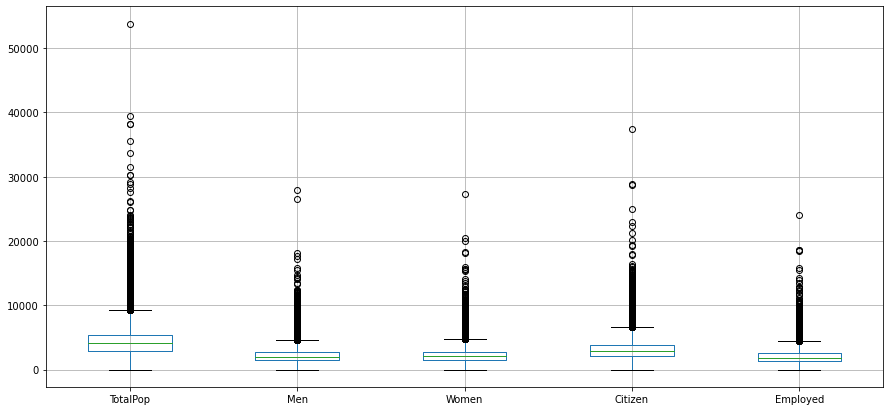

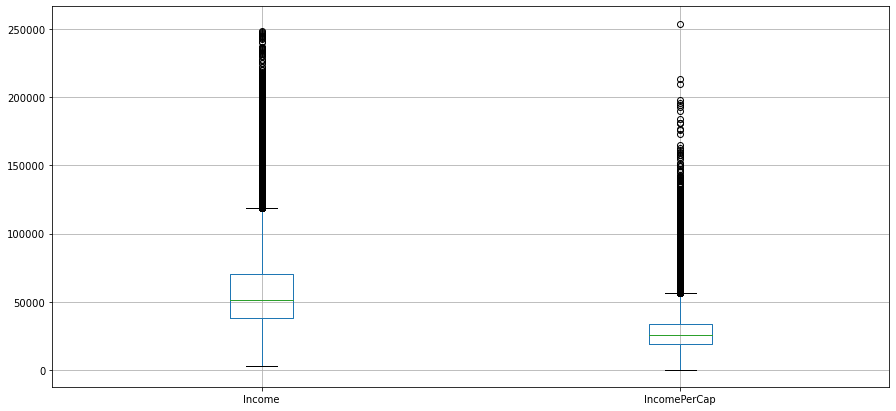

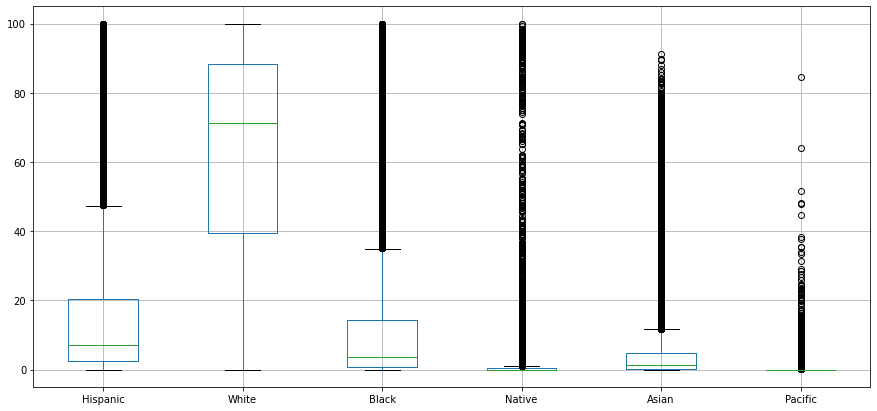

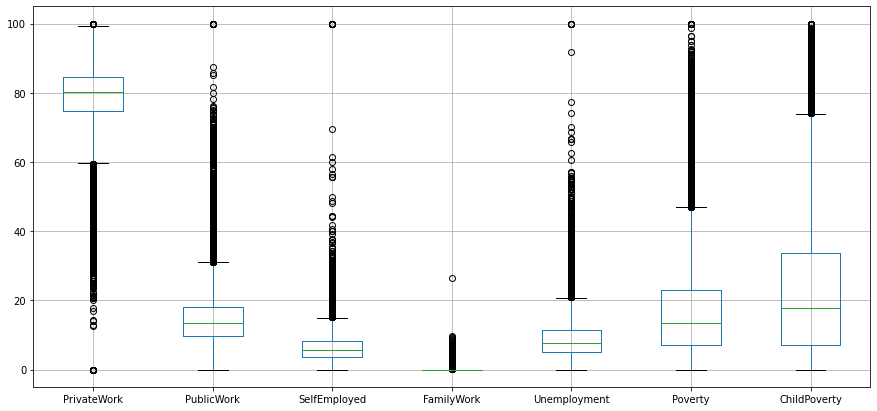

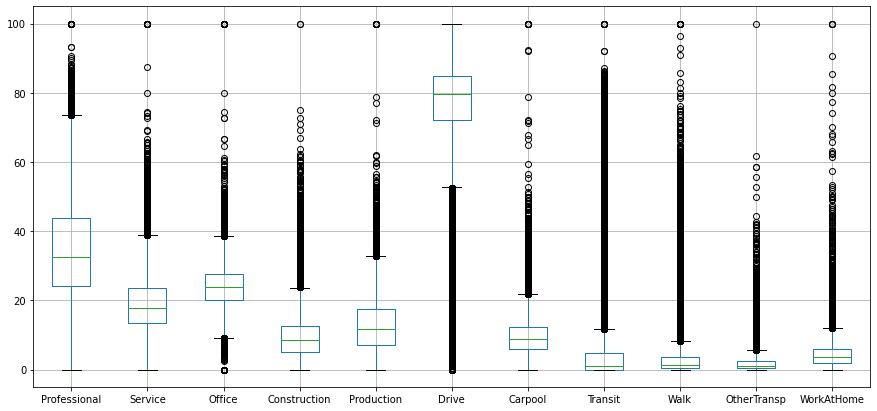

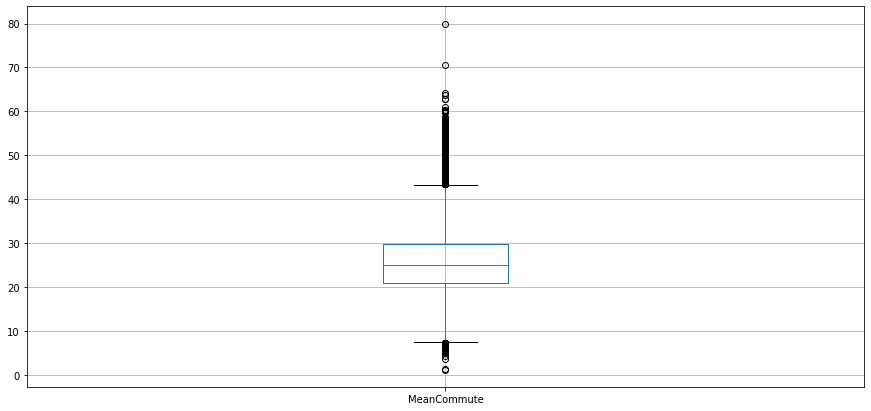

In [8]:

ax = [descr_1, descr_2, descr_3, descr_4, descr_5, descr_6]
for a in ax:
    plt.figure(figsize=(15,7))
    a.boxplot()
    

Answer:

We have some columns with null values. This is indicated by the `DataFrame.count` attribute of columns that are less than 74001. 
This is an issue since the dataset might not be complete. Again, there is a missmatch between description of `Citizen` which is not given as a percentage value in the data set. We think that `descr_2` shows the inconsistency of income data since max `IncomePerCap` is bigger than `Income` which should not be possible! Also looking at work related fields such a subset of `descr_4` the max value is 100. It is hard to believe that for example 100% of people of one census tract work in the same field. Same applies to the employment status and prefered transportation (`descr_5`). This bevaviour is suspect and unlikely to be true but not impossible.

## Handling Missing Values
(In the following task you can assume that every NAN entry in the dataframe is actually a missing value. This can paritally be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., numbers types as string would result in an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.)

**e)** Simply filling missing entries is usually not a good idea. Therefore, you should first analyze the quantity of missing values and check for patterns of missing values.

To this end, compute the following statistics on missing values:
1) How many entries does the dataframe have? (To relate this to the number of entries missing)
2) How many missing values do we have?
3) How many rows have at least a single missing value?
4) Count the number of missing values per column.
5) Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.

What do you observe?

In [9]:
#nan = df[df.isna().any(axis=1)]
#display(HTML(nan.head().to_html()))
print("1. total entries/rows  : {}".format(len(df)))
print("2. missing values : {}".format(df.isna().sum().sum()))
print("3. rows with nan  : {}".format(len(df[df.isna().any(axis=1)])))
print("4. missing values per row: ")
display(HTML(df.isna().sum().to_frame().transpose().to_html()))
print("5. rows that miss values...")

cols_nan_count = [0] * (len(df.columns)+1)
nulls = df.isnull().sum(axis=1)
def _count(i):
    cols_nan_count[i] += 1
    return i
nulls.apply(lambda value: _count(value))

print_df = pd.DataFrame([tuple(cols_nan_count)], columns=["missing {}".format(i) for i in range(0, len(df.columns)+1)])
display(HTML(print_df.to_html()))

1. total entries/rows  : 74001
2. missing values : 22469
3. rows with nan  : 2008
4. missing values per row: 


5. rows that miss values...


Answer:

We have about 0.03 of rows with nan values. In 4. we can see that these missing values are distributed in an interesting pattern. 
For the groups:
1. `[Hispanic, White, Black, Native, Asian, Pacific]`
2. `[Professional, Service, Office, Construction, Production]`
3. `[Drive, Carpool, Transit, Walk, OtherTransp, WorkAtHome]`
4. `[PrivateWork, PublicWork, SelfEmployed, FamilyWork]`

We observed that they share the same amount of missing values for each feature. Each group expresses some specific information for example group 1 states how the ethnic distribution in then census tract is. Because the amount of missing value of features in one group is the same, we can assume that it is likely that once in this example the ehtnic distribution is not given all values of that group will miss too!

In 5. we can see two noticeable colums which are 1 missing value (982 cases) or 27 missing values (690 cases).
Of course we have many rows that miss x-different values but we can already make an educated guess that the 27 missing values will at least contain our groups from above and some more missing features that affected >= 690 rows. We suspect this because 690 might indicated this since it matches the amount of affected rows of group 1. This should however be investigated later. For now we cannot see any pattern for rows that miss only 1 value (nor any of x between 1 and 34 except 27).  


**f)** We decide to **remove all rows from `df` where the total population is zero**. \
Given the preceding results, how do you evaluate this strategy? Try to motivate your argumentation by additional short analysis results (see hint for an inspiration).

*Hint: It might be interesting to have a look at the rows with zero population. Afterwards, you can provide some analysis results that show that your (potential) observation generalizes to all rows with zero population.*

In [10]:
nan = df[df.isna().any(axis=1)]
no_pop = nan.query("TotalPop == 0")
print("1. percentage removed of total nan: {:.2f} (absolute {})".format(len(no_pop) / len(nan), len(no_pop)))
nan_ = no_pop.columns[no_pop.isna().any()].tolist()
print("2. Columns with NaN: {}".format(len(nan_)))
print("3. Columns with NaN-labels: ")
print(nan_)
print("4. Columns unique")
column_values = no_pop[no_pop.columns.difference(["County", "State"])].values
unique_values =  np.unique(column_values)
print(unique_values)
print("5. missing rows distributed...")
cols_nan_count = [0] * (len(no_pop.columns)+1)
nulls = no_pop.isnull().sum(axis=1)
def _count(i):
    cols_nan_count[i] += 1
    return i
nulls.apply(lambda value: _count(value))

print_df = pd.DataFrame([tuple(cols_nan_count)], columns=["missing {}".format(i) for i in range(0, len(df.columns)+1)])
display(HTML(print_df.to_html()))
display(HTML(no_pop.head().to_html()))


1. percentage removed of total nan: 0.34 (absolute 690)
2. Columns with NaN: 27
3. Columns with NaN-labels: 
['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'IncomePerCap', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment']
4. Columns unique
[ 0. nan]
5. missing rows distributed...


In [11]:
removed_no_pop = df.drop(no_pop.index)
df = removed_no_pop
print("Done")

Done


Answer:

As we can see, we have removed about 0.34 of the rows with nan (absolute 690)(1). These rows miss exactly 27 values which as predicted in e) consists of our groups and more values(2,3). This implies that having a 0 population means that some information such as the ethnic distribution and so on, in general population specific information is not given. This of course makes sense since we have no population! Removing these rows therefore can be done safely as they would not contain any information except nan or 0 and the `State` and `County` (4).

## Imputing Missing Values

**g)** The previous analysis showed that there are missing values in the 'Men' and 'Women' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Do not forget about the semantics of the columns.*

In [12]:
# due to higher mortality rate of men, we can observe that in many first world countries there are more women than men
# for usa it's about 0.97 men for 1 women
# source: https://en.wikipedia.org/wiki/List_of_countries_by_sex_ratio 
def dist_pop(total_pop, men, women):
    if np.isnan(men) and np.isnan(women):
        _pop = int(total_pop / 197)
        men = 97 * _pop
        women = total_pop - men # assertion! 
    elif np.isnan(men):
        men = total_pop - women
    elif np.isnan(women):
        women = total_pop - men
    return pd.Series([men, women])

new_df = df
new_df[["Men", "Women"]] = new_df.apply(lambda x: dist_pop(x["TotalPop"], x["Men"], x["Women"]), axis=1)

In [13]:
df = new_df
assert df[['Men', 'Women']].isna().sum().sum() == 0

**h)** Finally, impute the remaining missing values in `df` using the knn-imputation method.

1) Before you impute the remaining missing values, you should improve the data semantics consistency by turning the columns 
    
        ['Men', 'Women', 'Citizen', 'Employed']
    
    into percentage scores as well. To this end, divide these values by the total population (i.e., 'TotalPop')

In [14]:
def _per(men, women, citizen, empl, totalpop):
    return pd.Series([
        (men / totalpop) * 100,
        (women / totalpop) * 100,
        (citizen / totalpop) * 100,
        (empl / totalpop) * 100
    ])

percentage = df
percentage[["Men", "Women", "Citizen", "Employed"]] = percentage.apply(lambda x: 
                                                                        _per(x["Men"], x["Women"], x["Citizen"], 
                                                                                x["Employed"], x["TotalPop"]), 
                                                                        axis=1)
percentage.head()                                                                        

State   County  TotalPop        Men      Women  Hispanic  \
CensusTract                                                               
1001020100   Alabama  Autauga      1948  48.254620  51.745380       0.9   
1001020200   Alabama  Autauga      2156  49.118738  50.881262       0.8   
1001020300   Alabama  Autauga      2968  45.956873  54.043127       0.0   
1001020400   Alabama  Autauga      4423  49.106941  50.893059      10.5   
1001020500   Alabama  Autauga     10763  45.730744  54.269256       0.7   

             White  Black  Native  Asian  ...  Walk  OtherTransp  WorkAtHome  \
CensusTract                               ...                                  
1001020100    87.4    7.7     0.3    0.6  ...   0.5          2.3         2.1   
1001020200    40.4   53.3     0.0    2.3  ...   0.0          0.7         0.0   
1001020300    74.5   18.6     0.5    1.4  ...   0.0          0.0         2.5   
1001020400    82.8    3.7     1.6    0.0  ...   0.0          2.6         1.6   
1001020500    68.5   24.8     0.0    3.8  ...   0.0          0.6         0.9   

             MeanCommute   Employed  PrivateWork  PublicWork  SelfEmployed  \
CensusTract                                                                  
1001020100          25.0  48.408624         77.1        18.3           4.6   
1001020200          23.4  34.925788         77.0        16.9           6.1   
1001020300          19.6  46.260108         64.1        23.6          12.3   
1001020400          25.3  40.289396         75.7        21.2           3.1   
1001020500          24.8  46.799220         67.1        27.6           5.3   

             FamilyWork  Unemployment  
CensusTract                            
1001020100          0.0           5.4  
1001020200          0.0          13.3  
1001020300          0.0           6.2  
1001020400          0.0          10.8  
1001020500          0.0           4.2  

[5 rows x 34 columns]

In [15]:
df = percentage
print("Done")

Done


2) Impute the missing values using the knn-imputation method.
    To this end, apply the following steps:
        1) Create a working copy `df_tmp` of your dataframe.
        2) Drop the columns `['State', 'County']` from `df_tmp`. On the one hand, this makes the following steps easier because we only have to deal with numerical columns; on the other hand, an alternative one-hot encoding is also problematic as this will cause our feature dimensionality to explode!
        3) Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, even though we are mostly using percentages, knn can become very biased.
        4) Impute the missing values considering five neighbors.
        5) Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
        6) Append the columns `['State', 'County']`
 
In the end, `df` should not contain missing values and have columns `['State', 'County']`.

*Hint: Be careful with the indices of your dataframes.*


In [16]:
df_tmp = df.drop(['State', 'County'], axis=1)
df_tmp.head()

TotalPop        Men      Women  Hispanic  White  Black  Native  \
CensusTract                                                                   
1001020100       1948  48.254620  51.745380       0.9   87.4    7.7     0.3   
1001020200       2156  49.118738  50.881262       0.8   40.4   53.3     0.0   
1001020300       2968  45.956873  54.043127       0.0   74.5   18.6     0.5   
1001020400       4423  49.106941  50.893059      10.5   82.8    3.7     1.6   
1001020500      10763  45.730744  54.269256       0.7   68.5   24.8     0.0   

             Asian  Pacific    Citizen  ...  Walk  OtherTransp  WorkAtHome  \
CensusTract                             ...                                  
1001020100     0.6      0.0  77.156057  ...   0.5          2.3         2.1   
1001020200     2.3      0.0  77.087199  ...   0.0          0.7         0.0   
1001020300     1.4      0.3  78.672507  ...   0.0          0.0         2.5   
1001020400     0.0      0.0  74.745648  ...   0.0          2.6         1.6   
1001020500     3.8      0.0  71.225495  ...   0.0          0.6         0.9   

             MeanCommute   Employed  PrivateWork  PublicWork  SelfEmployed  \
CensusTract                                                                  
1001020100          25.0  48.408624         77.1        18.3           4.6   
1001020200          23.4  34.925788         77.0        16.9           6.1   
1001020300          19.6  46.260108         64.1        23.6          12.3   
1001020400          25.3  40.289396         75.7        21.2           3.1   
1001020500          24.8  46.799220         67.1        27.6           5.3   

             FamilyWork  Unemployment  
CensusTract                            
1001020100          0.0           5.4  
1001020200          0.0          13.3  
1001020300          0.0           6.2  
1001020400          0.0          10.8  
1001020500          0.0           4.2  

[5 rows x 32 columns]

In [17]:
from sklearn.preprocessing import StandardScaler
nrmlzd = StandardScaler()
data_std =nrmlzd.fit_transform(df_tmp)
df_tmp = pd.DataFrame(data_std, 
                       index=df_tmp.index,
                       columns=df_tmp.columns)
df_tmp.head()

TotalPop       Men     Women  Hispanic     White     Black  \
CensusTract                                                               
1001020100  -1.153039 -0.198081  0.198081 -0.695834  0.826748 -0.256065   
1001020200  -1.053865 -0.016187  0.016187 -0.700193 -0.704998  1.839298   
1001020300  -0.666706 -0.681747  0.681747 -0.735066  0.406333  0.244800   
1001020400   0.027033 -0.018670  0.018670 -0.277361  0.676833 -0.439869   
1001020500   3.049922 -0.729347  0.729347 -0.704552  0.210791  0.529696   

               Native     Asian   Pacific   Citizen  ...      Walk  \
CensusTract                                          ...             
1001020100  -0.095298 -0.453523 -0.139792  0.532334  ... -0.446056   
1001020200  -0.162138 -0.260208 -0.139792  0.525944  ... -0.531072   
1001020300  -0.050738 -0.362551  0.149408  0.673064  ... -0.531072   
1001020400   0.194344 -0.521751 -0.139792  0.308643  ... -0.531072   
1001020500  -0.162138 -0.089636 -0.139792 -0.018035  ... -0.531072   

             OtherTransp  WorkAtHome  MeanCommute  Employed  PrivateWork  \
CensusTract                                                                
1001020100      0.157306   -0.580823    -0.095818  0.306661    -0.224695   
1001020200     -0.458984   -1.118600    -0.325544 -1.114537    -0.236677   
1001020300     -0.728611   -0.478389    -0.871142  0.080190    -1.782383   
1001020400      0.272860   -0.708865    -0.052745 -0.549170    -0.392446   
1001020500     -0.497502   -0.888124    -0.124534  0.137017    -1.422917   

             PublicWork  SelfEmployed  FamilyWork  Unemployment  
CensusTract                                                      
1001020100     0.488132     -0.404113     -0.3705     -0.609306  
1001020200     0.302351     -0.033098     -0.3705      0.717221  
1001020300     1.191448      1.500431     -0.3705     -0.474974  
1001020400     0.872965     -0.775128     -0.3705      0.297434  
1001020500     1.722252     -0.230973     -0.3705     -0.810804  

[5 rows x 32 columns]

In [18]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imp = imputer.fit_transform(df_tmp)
df_tmp = pd.DataFrame(data_imp, 
                       index=df_tmp.index,
                       columns=df_tmp.columns)
df_tmp.head()

TotalPop       Men     Women  Hispanic     White     Black  \
CensusTract                                                               
1001020100  -1.153039 -0.198081  0.198081 -0.695834  0.826748 -0.256065   
1001020200  -1.053865 -0.016187  0.016187 -0.700193 -0.704998  1.839298   
1001020300  -0.666706 -0.681747  0.681747 -0.735066  0.406333  0.244800   
1001020400   0.027033 -0.018670  0.018670 -0.277361  0.676833 -0.439869   
1001020500   3.049922 -0.729347  0.729347 -0.704552  0.210791  0.529696   

               Native     Asian   Pacific   Citizen  ...      Walk  \
CensusTract                                          ...             
1001020100  -0.095298 -0.453523 -0.139792  0.532334  ... -0.446056   
1001020200  -0.162138 -0.260208 -0.139792  0.525944  ... -0.531072   
1001020300  -0.050738 -0.362551  0.149408  0.673064  ... -0.531072   
1001020400   0.194344 -0.521751 -0.139792  0.308643  ... -0.531072   
1001020500  -0.162138 -0.089636 -0.139792 -0.018035  ... -0.531072   

             OtherTransp  WorkAtHome  MeanCommute  Employed  PrivateWork  \
CensusTract                                                                
1001020100      0.157306   -0.580823    -0.095818  0.306661    -0.224695   
1001020200     -0.458984   -1.118600    -0.325544 -1.114537    -0.236677   
1001020300     -0.728611   -0.478389    -0.871142  0.080190    -1.782383   
1001020400      0.272860   -0.708865    -0.052745 -0.549170    -0.392446   
1001020500     -0.497502   -0.888124    -0.124534  0.137017    -1.422917   

             PublicWork  SelfEmployed  FamilyWork  Unemployment  
CensusTract                                                      
1001020100     0.488132     -0.404113     -0.3705     -0.609306  
1001020200     0.302351     -0.033098     -0.3705      0.717221  
1001020300     1.191448      1.500431     -0.3705     -0.474974  
1001020400     0.872965     -0.775128     -0.3705      0.297434  
1001020500     1.722252     -0.230973     -0.3705     -0.810804  

[5 rows x 32 columns]

In [19]:
df_inv = nrmlzd.inverse_transform(df_tmp)
df_tmp = pd.DataFrame(df_inv, 
                       index=df_tmp.index,
                       columns=df_tmp.columns)
df_tmp.head()

TotalPop        Men      Women  Hispanic  White  Black  Native  \
CensusTract                                                                   
1001020100     1948.0  48.254620  51.745380       0.9   87.4    7.7     0.3   
1001020200     2156.0  49.118738  50.881262       0.8   40.4   53.3     0.0   
1001020300     2968.0  45.956873  54.043127       0.0   74.5   18.6     0.5   
1001020400     4423.0  49.106941  50.893059      10.5   82.8    3.7     1.6   
1001020500    10763.0  45.730744  54.269256       0.7   68.5   24.8     0.0   

             Asian  Pacific    Citizen  ...  Walk  OtherTransp  WorkAtHome  \
CensusTract                             ...                                  
1001020100     0.6      0.0  77.156057  ...   0.5          2.3         2.1   
1001020200     2.3      0.0  77.087199  ...   0.0          0.7         0.0   
1001020300     1.4      0.3  78.672507  ...   0.0          0.0         2.5   
1001020400     0.0      0.0  74.745648  ...   0.0          2.6         1.6   
1001020500     3.8      0.0  71.225495  ...   0.0          0.6         0.9   

             MeanCommute   Employed  PrivateWork  PublicWork  SelfEmployed  \
CensusTract                                                                  
1001020100          25.0  48.408624         77.1        18.3           4.6   
1001020200          23.4  34.925788         77.0        16.9           6.1   
1001020300          19.6  46.260108         64.1        23.6          12.3   
1001020400          25.3  40.289396         75.7        21.2           3.1   
1001020500          24.8  46.799220         67.1        27.6           5.3   

             FamilyWork  Unemployment  
CensusTract                            
1001020100          0.0           5.4  
1001020200          0.0          13.3  
1001020300          0.0           6.2  
1001020400          0.0          10.8  
1001020500          0.0           4.2  

[5 rows x 32 columns]

In [20]:
df_tmp_cat = pd.concat([df_tmp, df[["State", "County"]]], axis=1)
display(df_tmp_cat.head())
df = df_tmp_cat

TotalPop        Men      Women  Hispanic  White  Black  Native  \
CensusTract                                                                   
1001020100     1948.0  48.254620  51.745380       0.9   87.4    7.7     0.3   
1001020200     2156.0  49.118738  50.881262       0.8   40.4   53.3     0.0   
1001020300     2968.0  45.956873  54.043127       0.0   74.5   18.6     0.5   
1001020400     4423.0  49.106941  50.893059      10.5   82.8    3.7     1.6   
1001020500    10763.0  45.730744  54.269256       0.7   68.5   24.8     0.0   

             Asian  Pacific    Citizen  ...  WorkAtHome  MeanCommute  \
CensusTract                             ...                            
1001020100     0.6      0.0  77.156057  ...         2.1         25.0   
1001020200     2.3      0.0  77.087199  ...         0.0         23.4   
1001020300     1.4      0.3  78.672507  ...         2.5         19.6   
1001020400     0.0      0.0  74.745648  ...         1.6         25.3   
1001020500     3.8      0.0  71.225495  ...         0.9         24.8   

              Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
CensusTract                                                                 
1001020100   48.408624         77.1        18.3           4.6         0.0   
1001020200   34.925788         77.0        16.9           6.1         0.0   
1001020300   46.260108         64.1        23.6          12.3         0.0   
1001020400   40.289396         75.7        21.2           3.1         0.0   
1001020500   46.799220         67.1        27.6           5.3         0.0   

             Unemployment    State   County  
CensusTract                                  
1001020100            5.4  Alabama  Autauga  
1001020200           13.3  Alabama  Autauga  
1001020300            6.2  Alabama  Autauga  
1001020400           10.8  Alabama  Autauga  
1001020500            4.2  Alabama  Autauga  

[5 rows x 34 columns]

In [21]:
assert 'State' in df.columns
assert 'County' in df.columns
assert df.isna().sum().sum() == 0
assert df['Hispanic'].min() > -0.01
assert df['Hispanic'].max() < 101

## Data Integration

**i)** In the final preprocessing step, you should integrate one additional source of data into the preprocessed dataframe `df`. 
As the data has a natural geospatial dimension, you are going to endow each tract with its geographic coordinate.
To this end, load **coordinates.csv**. Integrate the two data sources exploiting the correspondence between 'CensusTract' and 'GEOID'.
Finally, drop the 'USPS' column.

In [22]:
coords = pd.read_csv("dataset/coordinates.csv", index_col="GEOID")
df_join = df.join(coords)
df_join.drop("USPS", axis=1, inplace=True)
display(df_join.head())
df=df_join

TotalPop        Men      Women  Hispanic  White  Black  Native  \
CensusTract                                                                   
1001020100     1948.0  48.254620  51.745380       0.9   87.4    7.7     0.3   
1001020200     2156.0  49.118738  50.881262       0.8   40.4   53.3     0.0   
1001020300     2968.0  45.956873  54.043127       0.0   74.5   18.6     0.5   
1001020400     4423.0  49.106941  50.893059      10.5   82.8    3.7     1.6   
1001020500    10763.0  45.730744  54.269256       0.7   68.5   24.8     0.0   

             Asian  Pacific    Citizen  ...  FamilyWork  Unemployment  \
CensusTract                             ...                             
1001020100     0.6      0.0  77.156057  ...         0.0           5.4   
1001020200     2.3      0.0  77.087199  ...         0.0          13.3   
1001020300     1.4      0.3  78.672507  ...         0.0           6.2   
1001020400     0.0      0.0  74.745648  ...         0.0          10.8   
1001020500     3.8      0.0  71.225495  ...         0.0           4.2   

               State   County     ALAND  AWATER  ALAND_SQMI  AWATER_SQMI  \
CensusTract                                                                
1001020100   Alabama  Autauga   9809938   36312       3.788        0.014   
1001020200   Alabama  Autauga   3341886    5968       1.290        0.002   
1001020300   Alabama  Autauga   5349273    9054       2.065        0.003   
1001020400   Alabama  Autauga   6382707   16244       2.464        0.006   
1001020500   Alabama  Autauga  11399989   46159       4.402        0.018   

              INTPTLAT  INTPTLONG  
CensusTract                        
1001020100   32.481959 -86.491338  
1001020200   32.475758 -86.472468  
1001020300   32.474024 -86.459703  
1001020400   32.471030 -86.444835  
1001020500   32.458922 -86.421826  

[5 rows x 40 columns]

In [23]:
assert 'Men' in df.columns
assert 'County' in df.columns
assert 'INTPTLONG' in df.columns
assert 'INTPTLAT' in df.columns

# Q2 - Visualization (15 points)
In this task, you will analyze the data that you preprocessed in question 1 (**census_data.csv**). In particular you will analyze income-related aspects, using different means of visualization.

Start with the following preprocessed and integrated dataframe `df`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified!

**Library usage:** This notebook imports a couple visualization libraries that have a significat overlap in terms of functionalities. Therefore, you are free to use any of these libraries (and those in the environment in general) to implement the following questions as long as your resulting plot compilies with the explicitly mentioned requirements.

In [24]:
df = pd.read_pickle('./dataset/df_vis.pkl')

**a)** Visualize two histograms for 'Income' and 'IncomePerCap' in a **single plot**. Compare the two distributions; what do you observe?

(array([1.000e+01, 1.900e+01, 6.600e+01, 2.210e+02, 3.690e+02, 6.180e+02,
        7.890e+02, 1.212e+03, 1.396e+03, 1.834e+03, 1.953e+03, 2.588e+03,
        2.811e+03, 3.063e+03, 3.153e+03, 3.528e+03, 3.518e+03, 3.369e+03,
        3.260e+03, 3.404e+03, 3.130e+03, 2.773e+03, 2.488e+03, 2.552e+03,
        2.295e+03, 1.975e+03, 1.728e+03, 1.615e+03, 1.590e+03, 1.382e+03,
        1.196e+03, 1.083e+03, 1.153e+03, 9.900e+02, 8.450e+02, 7.570e+02,
        7.520e+02, 7.170e+02, 6.350e+02, 5.850e+02, 6.410e+02, 5.140e+02,
        4.160e+02, 3.950e+02, 3.870e+02, 2.890e+02, 3.010e+02, 2.710e+02,
        2.730e+02, 2.100e+02, 2.270e+02, 1.600e+02, 1.470e+02, 1.230e+02,
        1.260e+02, 1.100e+02, 1.130e+02, 8.800e+01, 9.100e+01, 8.900e+01,
        1.040e+02, 6.700e+01, 7.400e+01, 5.300e+01, 5.900e+01, 5.300e+01,
        4.500e+01, 4.200e+01, 3.500e+01, 2.500e+01, 3.500e+01, 3.200e+01,
        2.100e+01, 1.800e+01, 1.400e+01, 2.200e+01, 1.800e+01, 1.100e+01,
        2.100e+01, 1.300e+01, 1.400e+0

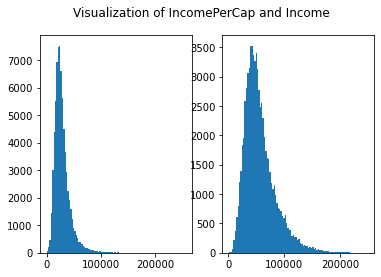

In [25]:
# your code
income = df['Income']
incomePerCap = df['IncomePerCap']

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Visualization of IncomePerCap and Income')

ax1.hist(incomePerCap, bins=100)
ax2.hist(income, bins=100)

We already mentioned that the highest peak of both histograms are on unexpected positions (outliners). On average the most people makes less than the avarage income of a household in the USA (So IncomePerCap is less than Income per household). Otherwise the data would not be correct. Furthermore the Income looks more like normal distribution but both are skewed to the left. 

## Aggregation for Visualization Pruposes
**b)** As the data contains too many rows for per-row visualizations, you should aggregate the data further before creating more interesting visualizations.
The following function will do the job for your; however, why didn't we simply run `groupby(...).mean()` to get the results for the columns
specified in `l_col`?

In [26]:
def my_aggregation(df):
    l_col = ['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income', 'IncomePerCap', 
             'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 
             'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 
             'FamilyWork', 'Unemployment', 'INTPTLAT', 'INTPTLONG']
    df_tmp = df.copy()
    df_tmp.loc[idx[:, l_col]] = df_tmp.loc[idx[:, l_col]].mul(df_tmp['TotalPop'], axis=0)
    df_tmp = df_tmp.groupby(['State', 'County'], observed=True).sum()
    df_tmp.loc[idx[:, l_col]] = df_tmp.loc[idx[:, l_col]].div(df_tmp['TotalPop'], axis=0)
    
    return df_tmp


In [27]:
df = my_aggregation(df)
df.head()

TotalPop        Men      Women  Hispanic      White  \
State   County                                                              
Alabama Autauga   55253.997778  48.434887  51.568594  2.642546  75.856849   
        Baldwin  195170.839070  48.857848  51.134700  4.488181  83.002196   
        Barbour   26863.503003  53.855367  46.153208  4.713527  46.337913   
        Bibb      22677.565195  53.413070  46.561785  2.300174  74.439569   
        Blount    57809.081940  49.441549  50.587929  8.708269  88.048684   

                     Black    Native     Asian   Pacific    Citizen  ...  \
State   County                                                       ...   
Alabama Autauga  18.517057  0.429003  0.957841  0.018335  73.665310  ...   
        Baldwin   9.451327  0.575898  0.663861  0.000381  75.686041  ...   
        Barbour  46.648892  0.164449  0.425173  0.002802  76.931310  ...   
        Bibb     21.274928  0.456621  0.106137  0.000623  77.335504  ...   
        Blount    1.563644  0.287027  0.141126 -0.002487  73.447426  ...   

                 PublicWork  SelfEmployed  FamilyWork  Unemployment  \
State   County                                                        
Alabama Autauga   20.783657      5.422749   -0.002682      7.765676   
        Baldwin   12.434242      5.914107    0.363948      7.572219   
        Barbour   21.151017      7.155351    0.089266     17.533583   
        Bibb      16.223342      6.654708    0.394732      8.186001   
        Blount    13.600970      4.231243    0.353626      7.719260   

                      ALAND     AWATER  ALAND_SQMI  AWATER_SQMI   INTPTLAT  \
State   County                                                               
Alabama Autauga  1539589643   25769317     594.440        9.948  32.501992   
        Baldwin  4117584013  317781489    1589.807      122.696  30.552544   
        Barbour  2291820706   50864677     884.877       19.640  31.861712   
        Bibb     1612481559    9287974     622.583        3.587  33.033842   
        Blount   1670041875   15077458     644.806        5.821  33.952978   

                 INTPTLONG  
State   County              
Alabama Autauga -86.509571  
        Baldwin -87.766448  
        Barbour -85.328403  
        Bibb    -87.150267  
        Blount  -86.593007  

[5 rows x 38 columns]

First, the groupby statement would include all states and countries, even if they have null values, in the newly generated data set. The function, as specified, reduces the data set to complete rows, leaving only a small number of rows compared to the original data set and do not reindex them. But if we use something else like aggregation (.agg) or apply instead of sum there is a way to do it directly with groupby.

**c)** Next, you should create an overview over column correlations particularly consideirng high/medium/and low incomes.

1) Create a copy `df_plot` of the aggregated dataframe.

In [28]:
# your code
df_plot = df.copy()

2) Append a column 'IncomeClass' to `df_plot` containing the 'Income' categories based on the following inter-percentile ranges:
    - low' iff the income is less than the 33% income percentile
    - 'medium' if the income is between the 33% and 66% percentile, and 
    - 'high' iff the income is above the 66% percentile

In [29]:
# your code
#index = len(df.columns)
#df_plot.insert(index, "IncomeClass", "")

first_percentile   = np.percentile(df_plot['Income'], 33)
second_percentile = np.percentile(df_plot['Income'], 66)

df_plot.loc[df_plot['Income'] < first_percentile, 'IncomeClass'] = "low"
df_plot.loc[(df_plot['Income'] > first_percentile) & (df_plot['Income'] < second_percentile), 'IncomeClass'] = "medium"
df_plot.loc[df_plot['Income'] > second_percentile, 'IncomeClass'] = "high"

df_plot

TotalPop        Men      Women   Hispanic  \
State       County                                                      
Alabama     Autauga     55253.997778  48.434887  51.568594   2.642546   
            Baldwin    195170.839070  48.857848  51.134700   4.488181   
            Barbour     26863.503003  53.855367  46.153208   4.713527   
            Bibb        22677.565195  53.413070  46.561785   2.300174   
            Blount      57809.081940  49.441549  50.587929   8.708269   
...                              ...        ...        ...        ...   
Puerto Rico Vega Baja   56804.013892  48.157598  51.833956  96.340161   
            Vieques      9040.443769  50.237254  49.793288  96.547564   
            Villalba    24612.475644  48.932217  51.050425  99.676655   
            Yabucoa     36271.800948  48.666190  51.374931  99.819849   
            Yauco       39563.609840  48.262001  51.764521  99.483488   

                           White      Black    Native     Asian   Pacific  \
State       County                                                          
Alabama     Autauga    75.856849  18.517057  0.429003  0.957841  0.018335   
            Baldwin    83.002196   9.451327  0.575898  0.663861  0.000381   
            Barbour    46.337913  46.648892  0.164449  0.425173  0.002802   
            Bibb       74.439569  21.274928  0.456621  0.106137  0.000623   
            Blount     88.048684   1.563644  0.287027  0.141126 -0.002487   
...                          ...        ...       ...       ...       ...   
Puerto Rico Vega Baja   3.329072   0.231452  0.011809 -0.026703  0.008674   
            Vieques     3.256932   0.117855 -0.016244 -0.101254 -0.005752   
            Villalba   -0.043289  -0.076433  0.028314  0.009448 -0.002687   
            Yabucoa     0.394926  -0.100464  0.004701  0.037184 -0.000805   
            Yauco       0.479674   0.009576 -0.009643 -0.006754  0.002152   

                         Citizen  ...  SelfEmployed  FamilyWork  Unemployment  \
State       County                ...                                           
Alabama     Autauga    73.665310  ...      5.422749   -0.002682      7.765676   
            Baldwin    75.686041  ...      5.914107    0.363948      7.572219   
            Barbour    76.931310  ...      7.155351    0.089266     17.533583   
            Bibb       77.335504  ...      6.654708    0.394732      8.186001   
            Blount     73.447426  ...      4.231243    0.353626      7.719260   
...                          ...  ...           ...         ...           ...   
Puerto Rico Vega Baja  76.778960  ...      4.139804    0.001642     15.838692   
            Vieques    77.570167  ...     13.322546    0.356347     11.502415   
            Villalba   74.736582  ...     13.052489    0.166431     25.648314   
            Yabucoa    77.026716  ...      7.178408    0.000268     24.526566   
            Yauco      77.592567  ...      4.536046    0.000341     28.207462   

                            ALAND     AWATER  ALAND_SQMI  AWATER_SQMI  \
State       County                                                      
Alabama     Autauga    1539589643   25769317     594.440        9.948   
            Baldwin    4117584013  317781489    1589.807      122.696   
            Barbour    2291820706   50864677     884.877       19.640   
            Bibb       1612481559    9287974     622.583        3.587   
            Blount     1670041875   15077458     644.806        5.821   
...                           ...        ...         ...          ...   
Puerto Rico Vega Baja   118766803    9174119      45.855        3.542   
            Vieques     131527813   57023944      50.783       22.017   
            Villalba     92298573    3622637      35.637        1.399   
            Yabucoa     143005215    6804952      55.215        2.627   
            Yauco       176615891    1625260      68.191        0.629   

                        INTPTLAT  INTPTLONG  IncomeClass  
State       C

3) Project the dataframe on the columns that contain percent values (for the sake of readability), that is:

        ['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 
        'Professional', 'Service', 'Office', 'Construction', 'Production',
        'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
        'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
        'FamilyWork', 'Unemployment', 'IncomeClass']
        

In [30]:
# your code
col =  ['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 
 'Professional', 'Service', 'Office', 'Construction', 'Production',
 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
 'FamilyWork', 'Unemployment', 'IncomeClass']

df_plot = df_plot[col]

4) Create a parallel coordinates diagram that uses the 'IncomeClass' for coloring the lines. Rotate the x-axis labels by 90° to make them easier to read.
Briefly discuss your results. Do you observe any correlations? Please explain.
    

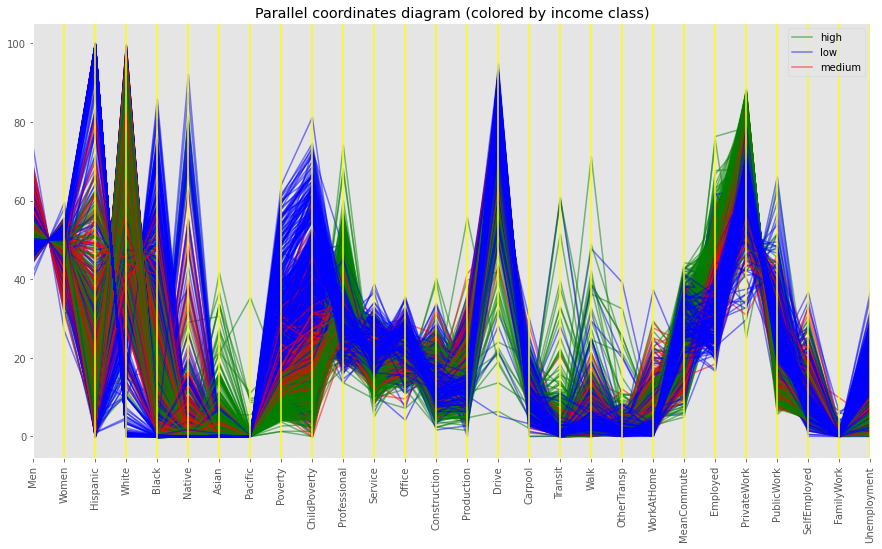

In [31]:
# your code
with plt.style.context(("ggplot")):
    fig = plt.figure(figsize=(15,8))
    pd.plotting.parallel_coordinates(df_plot, "IncomeClass",
                                     color=["green", "blue","red"],
                                     alpha=0.5,
                                     axvlines_kwds={"color":"yellow"})
    plt.xticks(rotation=90)
    plt.title("Parallel coordinates diagram (colored by income class)")


Going from left to right starting with Men and woman. It looks like men earn about as much money as women. This actually surprising because reality is acutally different (or at least it is said to be). In the ethnic groups we observe that black and native people often have low incomes while asian have high incomes. Also white people have a good mix while also having people with high incomes. The few pacific people seem to have high income too. The employment status shows a what we expected. Living in poverty means that you will also have a low income. Surprisingly there are also people with high income! Being a professional can actually pay higher income more likely while other employments such as service, office, construction and production have a much more low income. Looking at the commuting categories we can only see a small high income trends towards transit. Comparing the field of employment we observe something that we already expected. Unemployed people will like have low income (but surprisingly also some with high income) while employed and poeple in private work have some people having high income. Also surprisingly people who work in public work often receive low income.

## Advanced Visualization: Map

**d)** In this task, you are going to create an advanced visualization that exploits the geospatial nature of the data, that is, you will project the average 'Income' of each county and its population onto a map of the USA. \
You can use the following code to create a suitable map extend.

    ax.set_extent([-125, -66.5, 20, 50], ...)
        
Given this instance, plot one marker (e.g., circular marker) for each row in our aggregated dataset onto the map.
The color encoding should show the average 'Income' of the corresponding county, while the size should be chosen according to its population ('TotalPop'). If you want to modify the dataframe, create a **working copy** beforehand.

What do you observe?


In [32]:
# your code
col_map = ['TotalPop', 'Income', 'INTPTLAT','INTPTLONG']
df_map = df[col_map]
df_map.reset_index(level=['State', 'County'], inplace=True)

max_Income = df_map['Income'].max()
a_Income = round(max_Income*0.2)
b_Income = round(max_Income*0.4)
c_Income = round(max_Income*0.6)
d_Income = round(max_Income*0.8)

limits_Income = [(0,(a_Income)),
                 ((a_Income+1),b_Income),
                 ((b_Income+1),c_Income),
                 ((c_Income+1),d_Income),
                 ((d_Income+1),round(max_Income))]

colors = ["red", "orange", "yellow", "green", "blue"]


infoStrings = df_map['County'].astype(str) + " has a population of " + \
                df_map['TotalPop'].astype(int).astype(str) + " million people" 
               

df_map['Info'] = infoStrings 


fig = go.Figure()


for i in range(len(limits_Income)): 
    
    lim = limits_Income[i]
  
    df_sub = df_map[(df_map['Income'] >= lim[0]) & 
                    (df_map['Income'] < lim[1])]
    
    
    fig.add_trace(go.Scattergeo(
        
        locationmode = 'USA-states',
        lon = df_sub['INTPTLONG'],
        lat = df_sub['INTPTLAT'],
        text = df_sub['Info'],
        marker = dict(
            size = df_sub['TotalPop']/10000,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = 'Income from {0} to {1}'.format(lim[0], lim[1])))
        

    fig.update_layout(
            title_text = 'US: Population & income map (Zoom in and out)',
            showlegend = True,
            geo = dict(
                scope = 'usa',
                landcolor = 'rgb(217, 217, 217)',
            )

        )


fig.show()

/var/folders/7w/vnglv8td2nzbzrsjv8hs36d80000gn/T/ipykernel_51250/238709214.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['Info'] = infoStrings


As seen from the map, there are a number of clusters of high income areas in the US. Some are famous for their high living costs, such as San Francisco, Los Angeles, Seattle, D.C., and New York City areas. In general, it seems like high income areas are generally high population cities, whereas low income areas are rural, small population towns. This is seen as the bigger circles (corresponding to higher population) are mostly yellow, green, and blue, whereas the smaller circles (corresponding to smaller population) are mostly orange and yellow. 

# Q3 - Frequent Itemsets and Association Rules (12 points)


## Frequent Itemsets

**a)** Carry out some preprocessing steps before starting the analysis:

1) Load the `customer_data.csv`.

2) Select 90% of the `customer_data` dataset by random sampling. Use the matriculation number of one of the group members as seed.

3) After completing this preprocessing step, export your final dataset as `customer_data_2.csv` and use it for the next steps of the assignment.

In [54]:
# your code
df = pd.read_csv('./dataset/customer_data.csv')
display(df.head(10))
df = df.sample(frac=0.90, random_state=416070)
df.to_csv('./dataset/customer_data_2.csv')

Education Marital_Status Age_Group Income_Class     Children  \
0  Graduation         Single       50s       Medium  No Children   
1  Graduation         Single       50s       Medium     Children   
2  Graduation       Together       40s         High  No Children   
3  Graduation       Together       20s       Medium     Children   
4         PhD        Married       30s       Medium     Children   
5      Master       Together       40s         High     Children   
6  Graduation       Divorced       40s       Medium     Children   
7         PhD        Married       20s       Medium     Children   
8         PhD       Together       30s       Medium     Children   
9         PhD       Together       60s          Low     Children   

  Wine_Preference Fruit_Preference Meat_Preference Sweets_Preference  \
0            Wine           Fruits            Meat            Sweets   
1         No Wine        No Fruits         No Meat         No Sweets   
2            Wine           Fruits            Meat            Sweets   
3         No Wine        No Fruits         No Meat         No Sweets   
4            Wine           Fruits            Meat            Sweets   
5            Wine           Fruits            Meat            Sweets   
6            Wine           Fruits            Meat            Sweets   
7         No Wine        No Fruits         No Meat         No Sweets   
8         No Wine        No Fruits         No Meat         No Sweets   
9         No Wine        No Fruits         No Meat         No Sweets   

  Purchase_Place  
0            Web  
1          Store  
2          Store  
3          Store  
4          Store  
5          Store  
6            Web  
7            Web  
8            Web  
9            Web

**b)** In this part, we want to get to know our customers by looking at the typical shared characteristics (e.g. "Married customers in their 40s like wine"). This would correspond to the itemset {Married, 40s, Wine}. 

1) Create a new dataframe called `customer_data_onehot` such that rows correspond to customers (as in the original data set) and columns correspond to the categories of each of the ten categorical attributes in the data. The new dataframe should only contain boolean values (True/False or 0/1s) such that the value in row $i$ and column $j$ is True (or 1) if and only if the attribute value corresponding to the column $j$ holds for the customer corresponding to row $i$. Display the dataframe.

*Hint: For example, for the attribute "Education" there are 5 possible categories: 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'. Therefore, the new dataframe must contain one column for each of those attribute values.* 

In [66]:
# your code
from mlxtend.preprocessing import TransactionEncoder
customer_data_onehot = pd.get_dummies(df)
# customer_data_onehot.sort_values(index)
# te = TransactionEncoder()
# te_ary = te.fit_transform(y)
# customer_data_onehot = pd.DataFrame(te_ary, columns = te.columns_)
display(HTML(customer_data_onehot.head().to_html()))

2) Use the apriori algorithm to find the frequent itemsets with **min_support = 0.3** from the `customer_data_onehot` dataframe. Show the frequent itemsets that contain at least **3** items.

*Hint: The apriori algorithm of mlxtend needs a dataframe containing only boolean values as input.*

In [128]:
# your code
frequent_itemsets = apriori(customer_data_onehot, min_support=0.3, use_colnames = True)
# display(frequent_itemsets)
# frequent_itemsets.groupby('itemsets').filter(lambda x: len(x) >= 3)
fi = frequent_itemsets.copy()
fi['length'] = fi['itemsets'].apply(lambda x: len(x))
fi[(fi['length'] >= 3)]

support  \
53  0.314945   
54  0.353561   
55  0.313942   
56  0.314443   
57  0.313942   
58  0.365095   
59  0.325978   
60  0.365597   
61  0.312939   
62  0.316449   
63  0.346038   
64  0.313942   
65  0.321966   
66  0.343029   
67  0.324975   
68  0.380642   
69  0.412237   
70  0.332497   
71  0.383651   
72  0.309428   
73  0.329990   
74  0.346540   
75  0.331494   
76  0.342026   
77  0.307924   
78  0.381143   
79  0.337011   
80  0.383651   
81  0.331996   
82  0.345035   
83  0.391174   
84  0.315446   
85  0.324473   
86  0.310431   
87  0.309930   
88  0.310431   
89  0.328987   
90  0.312437   
91  0.303410   
92  0.311936   
93  0.359077   
94  0.321464   
95  0.328485   

                                                                                                       itemsets  \
53                                           (Wine_Preference_Wine, Fruit_Preference_Fruits, Income_Class_High)   
54                                              (Meat_Preference_Meat, Wine_Preference_Wine, Income_Class_High)   
55                                          (Sweets_Preference_Sweets, Wine_Preference_Wine, Income_Class_High)   
56                                           (Meat_Preference_Meat, Fruit_Preference_Fruits, Income_Class_High)   
57                                          (Meat_Preference_Meat, Sweets_Preference_Sweets, Income_Class_High)   
58                                         (Fruit_Preference_No Fruits, Income_Class_Medium, Children_Children)   
59                                            (Children_Children, Meat_Preference_No Meat, Income_Class_Medium)   
60                                        (Sweets_Preference_No Sweets, Income_Class_Medium, Children_Children)   
61                                               (Children_Children, Income_Class_Medium, Purchase_Place_Store)   
62                                   (Fruit_Preference_No Fruits, Meat_Preference_No Meat, Income_Class_Medium)   
63                               (Fruit_Preference_No Fruits, Sweets_Preference_No Sweets, Income_Class_Medium)   
64                                  (Meat_Preference_No Meat, Sweets_Preference_No Sweets, Income_Class_Medium)   
65                                     (Fruit_Preference_No Fruits, Wine_Preference_No Wine, Children_Children)   
66                                        (Wine_Preference_No Wine, Meat_Preference_No Meat, Children_Children)   
67                                    (Sweets_Preference_No Sweets, Wine_Preference_No Wine, Children_Children)   
68                                     (Fruit_Preference_No Fruits, Meat_Preference_No Meat, Children_Children)   
69                                 (Fruit_Preference_No Fruits, Sweets_Preference_No Sweets, Children_Children)   
70                                        (Fruit_Preference_No Fruits, Children_Children, Purchase_Place_Store)   
71                                    (Sweets_Preference_No Sweets, Meat_Preference_No Meat, Children_Children)   
72                                           (Children_Children, Meat_Preference_No Meat, Purchase_Place_Store)   
73                                       (Children_Children, Sweets_Preference_No Sweets, Purchase_Place_Store)   
74                               (Fruit_Preference_No Fruits, Wine_Preference_No Wine, Meat_Preference_No Meat)   
75                           (Fruit_Preference_No Fruits, Sweets_Preference_No Sweets, Wine_Preference_No Wine)   
76                              (Sweets_Preference_No Sweets, Wine_Preference_No Wine, Meat_Preference_No Meat)   
77                                     (Wine_Preference_No Wine, Meat_Preference_No Meat, Purchase_Place_Store)   
78                                        (Meat_Preference_Meat, Wine_Preference_Wine, Fruit_Preference_Fruits)   
79                                    (Sweets_Preference_Sweets, Wine_Preference_Wine, Fruit_Preference_Fruits)   
80                                       (Meat_Preference_Meat, Sweets_Preferenc

**c)** In the following we will investigate the effect of using the apriori property when determining the candidates for the frequent itemsets.

1) Implement the following join- and prune steps of the Apriori algorithm: \
   **join function:** a function that, given the frequent itemsets of size k, generates and yields a list of itemsets of size k+1. Only itemsets that share exactly k elements should be merged. \
   **prune function:** Given the set of candidate itemsets of size k+1 and the set of frequent itemsets of size k, remove the candidate sets that contain an infrequent subset of size k and return the rest.

In [224]:
# your code (join function)
def apriori_gen(L2):
    C3 = []
    for itemset1 in L2:
        for itemset2 in L2:
            # for any two pairs of frequent itemsets of size k, compute their intersection
            intersec = set(itemset1).intersection(itemset2)
#             print('inter:',intersec)
            if len(intersec) > (len(itemset2)-len(itemset1)):
                # if intersection has size k-1, merge them and form new candidate set of size k+1
#                 print('add: ',set(itemset1).union(set(itemset2)))
                C3.append(set(itemset1).union(set(itemset2)))
    return C3

In [225]:
# your code (prune function)
def apriori_prune(C3, L2):
    C_pruned = []
    for candidate_set in C3:
        for (i,item) in enumerate(candidate_set):
            # since we want to modify the original set many times, each time we modify a copy of it
            candidate_copy = set(candidate_set).copy()
            # remove one of the k items, leaving a set of size k-1
            candidate_copy.remove(item)
            # check if itemset of size 2 is frequent
            if candidate_copy not in (L2):
                break #stop exploring this candidate set
            if i == len(candidate_set)-1:
                # if we make it thorugh all subsets of size 2, we keep the current candidate set of size 3
                C_pruned.append(candidate_set)        
    return C_pruned

2) To see the effect of the apriori property, compare the number of candidate itemsets of size 4 obtained with and without pruning from the itemsets of size three for different values for min_support. To this end, generate a list of tuples *(min_sup, C4_size, C4_size_pruned, L4_size)* as follows:

For $\textrm{min_support} \in [0.1,0.2,...,0.8,0.9,1]$, repeat:

1. Obtain all frequent itemsets of size three using the apriori algorithm.

2. Using the result from 1., generate all itemsets of size four by applying your **join function** $\rightarrow$ C4_size.

3. Prune the result from 2. using your **prune function** $\rightarrow$ C4_size_pruned.

4. Compute the frequent itemsets of size four by using the apriori algorithm $\rightarrow$ L4_size.

In [239]:
def get_freq_itemsets_by_size(frequent_itemsets, size):
    data = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == size)]
    return data

def obtain_stats(dataset, min_sup_values):
    stats = []
    for value in min_sup_values:
        frequent_value = apriori(customer_data_onehot, min_support=value, use_colnames=True)
        frequent_size3 = get_freq_itemsets_by_size(frequent_value, 3)
        L4_size = get_freq_itemsets_by_size(frequent_value, 4)
        if not frequent_size3.empty:
            print(value)
            L3 = frequent_size3['itemsets'].tolist()
            C4_size = apriori_gen(L3)
            C4_pruned = apriori_prune(C4_size, L3)
            stats.append((value, len(C4_size), len(C4_pruned)))
    return stats

min_sup_values = np.arange(0.1,1,0.1)
stats = obtain_stats(frequent_itemsets, min_sup_values)

0.1
0.2
0.30000000000000004
0.4


3) Plot the number of candidate sets with and without pruning and the number of frequent itemsets of size four against the corresponding min_sup value. Interpret the plot.

[(0.1, 36065, 3864), (0.2, 2910, 720), (0.30000000000000004, 640, 192), (0.4, 1, 0)]


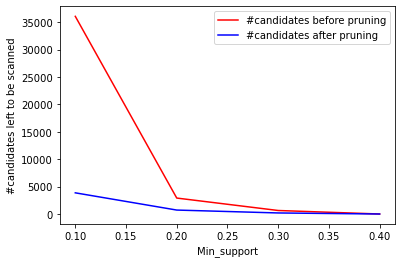

In [233]:
# your code
print(stats)
min_sup_values, C4_sizes, C4_sizes_pruned = zip(*stats) 
x_axis = min_sup_values

plt.plot(x_axis, C4_sizes, color='red', label='#candidates before pruning')
plt.plot(x_axis, C4_sizes_pruned, color='blue', label='#candidates after pruning')
plt.legend()
plt.xlabel('Min_support')
plt.ylabel('#candidates left to be scanned')
plt.show()

It requires much less number of candidates and therefore computing steps after the pruning step to find frequent itemsets. However as the minimum support requirement increases, the difference between the pruned vs not pruned decreases dramatically such that they are very similar above 0.30. 

d) Use the FP-Growth algorithm to obtain all frequent itemsets with **min_support = 0.3** from `customer_data_onehot`.

In [88]:
fi_fpg = fpgrowth(customer_data_onehot, min_support=0.3, use_colnames = True)
fi_fpg

support  \
0   0.697091   
1   0.577733   
2   0.521565   
3   0.504514   
4   0.461384   
..       ...   
91  0.324975   
92  0.321464   
93  0.311936   
94  0.303410   
95  0.307924   

                                                                                                       itemsets  
0                                                                                        (Purchase_Place_Store)  
1                                                                                        (Wine_Preference_Wine)  
2                                                                                        (Meat_Preference_Meat)  
3                                                                                        (Education_Graduation)  
4                                                                                    (Sweets_Preference_Sweets)  
..                                                                                                          ...  
91                                    (Sweets_Preference_No Sweets, Wine_Preference_No Wine, Children_Children)  
92  (Fruit_Preference_No Fruits, Sweets_Preference_No Sweets, Wine_Preference_No Wine, Meat_Preference_No Meat)  
93           (Sweets_Preference_No Sweets, Wine_Preference_No Wine, Meat_Preference_No Meat, Children_Children)  
94        (Fruit_Preference_No Fruits, Sweets_Preference_No Sweets, Wine_Preference_No Wine, Children_Children)  
95                                     (Wine_Preference_No Wine, Meat_Preference_No Meat, Purchase_Place_Store)  

[96 rows x 2 columns]

## Association Rules

**d)** In the following, you should generate association rules from the frequent itemsets.

1) Using only the frequent itemsets with min_support=0.3, generate different association rules using minimum confidence equal to 0.6 as a metric. Show the association rules.

In [240]:
# your code
assoc_rules = arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
assoc_rules

antecedents  \
0                                 (Education_Graduation)   
1                                 (Education_Graduation)   
2                                 (Wine_Preference_Wine)   
3                                    (Income_Class_High)   
4                              (Fruit_Preference_Fruits)   
..                                                   ...   
338  (Sweets_Preference_Sweets, Fruit_Preference_Fruits)   
339      (Wine_Preference_Wine, Fruit_Preference_Fruits)   
340                               (Meat_Preference_Meat)   
341                           (Sweets_Preference_Sweets)   
342                            (Fruit_Preference_Fruits)   

                                                                   consequents  \
0                                                          (Children_Children)   
1                                                       (Purchase_Place_Store)   
2                                                          (Income_Class_High)   
3                                                       (Wine_Preference_Wine)   
4                                                          (Income_Class_High)   
..                                                                         ...   
338                               (Meat_Preference_Meat, Wine_Preference_Wine)   
339                           (Sweets_Preference_Sweets, Meat_Preference_Meat)   
340  (Sweets_Preference_Sweets, Wine_Preference_Wine, Fruit_Preference_Fruits)   
341      (Meat_Preference_Meat, Wine_Preference_Wine, Fruit_Preference_Fruits)   
342     (Sweets_Preference_Sweets, Meat_Preference_Meat, Wine_Preference_Wine)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.504514            0.713139  0.358576    0.710736  0.996629   
1              0.504514            0.697091  0.349549    0.692843  0.993906   
2              0.577733            0.380642  0.369107    0.638889  1.678451   
3              0.380642            0.577733  0.369107    0.969697  1.678451   
4              0.460883            0.380642  0.320461    0.695321  1.826706   
..                  ...                 ...       ...         ...       ...   
338            0.374624            0.487462  0.328485    0.876841  1.798786   
339            0.397693            0.402708  0.328485    0.825977  2.051057   
340            0.521565            0.337011  0.328485    0.629808  1.868804   
341            0.461384            0.381143  0.328485    0.711957  1.867949   
342            0.460883            0.383651  0.328485    0.712731  1.857760   

     leverage  conviction  
0   -0.001213    0.991690  
1   -0.002143    0.986169  
2    0.149198    1.715145  
3    0.149198   13.934804  
4    0.145030    2.032822  
..        ...         ...  
338  0.145870    4.161583  
339  0.168331    3.432264  
340  0.152712    1.790931  
341  0.152632    2.148483  
342  0.151667    2.145548  

[343 rows x 9 columns]

2) From the association rules obtained in task (d) 1), provide the three rules with the highest lift. Comment on them.

In [243]:
# your code
assoc_rules.sort_values(by='lift',axis=0,ascending=False)

antecedents  \
252       (Sweets_Preference_Sweets, Wine_Preference_Wine)   
251              (Meat_Preference_Meat, Income_Class_High)   
240        (Wine_Preference_Wine, Fruit_Preference_Fruits)   
239              (Meat_Preference_Meat, Income_Class_High)   
324  (Fruit_Preference_No Fruits, Meat_Preference_No Meat)   
..                                                     ...   
103               (Income_Class_Medium, Children_Children)   
54                                  (Meat_Preference_Meat)   
26                                     (Children_Children)   
27                                  (Purchase_Place_Store)   
41                                  (Wine_Preference_Wine)   

                                                consequents  \
252               (Meat_Preference_Meat, Income_Class_High)   
251        (Sweets_Preference_Sweets, Wine_Preference_Wine)   
240               (Meat_Preference_Meat, Income_Class_High)   
239         (Wine_Preference_Wine, Fruit_Preference_Fruits)   
324  (Wine_Preference_No Wine, Sweets_Preference_No Sweets)   
..                                                      ...   
103                                  (Purchase_Place_Store)   
54                                   (Purchase_Place_Store)   
26                                   (Purchase_Place_Store)   
27                                      (Children_Children)   
41                                   (Purchase_Place_Store)   

     antecedent support  consequent support   support  confidence      lift  \
252            0.396189            0.359077  0.310431    0.783544  2.182105   
251            0.359077            0.396189  0.310431    0.864525  2.182105   
240            0.397693            0.359077  0.309930    0.779319  2.170338   
239            0.359077            0.397693  0.309930    0.863128  2.170338   
324            0.420261            0.357071  0.321464    0.764916  2.142196   
..                  ...                 ...       ...         ...       ...   
103            0.459880            0.697091  0.312939    0.680480  0.976170   
54             0.521565            0.697091  0.348044    0.667308  0.957274   
26             0.713139            0.697091  0.474423    0.665260  0.954337   
27             0.697091            0.713139  0.474423    0.680576  0.954337   
41             0.577733            0.697091  0.373119    0.645833  0.926469   

     leverage  conviction  
252  0.168169    2.960988  
251  0.168169    4.457000  
240  0.167127    2.904296  
239  0.167127    4.400528  
324  0.171401    2.734895  
..        ...         ...  
103 -0.007639    0.948011  
54  -0.015534    0.910477  
26  -0.022700    0.904908  
27  -0.022700    0.898055  
41  -0.029613    0.855272  

[343 rows x 9 columns]

Association Rules with highest lift are:
1. People who prefers sweets and wine are likely to prefer meat and are high income class - makes sense
2. People who prefers meat and are high income class are likely to prefer sweets and wine - the opposite
3. People who prefers wine and fruits are likely to prefer meat and are high income class - makes sense

# Q4 - Text Mining (15 points)
In this question, you will use the scripts of some Harry Potter movies. First, you will try to predict the character given a line in the script. Afterwards, using N-grams, you will generate sentences for some of the characters.

**a)** In this part, you will preprocess and reconstruct the data to make it suitable for the following tasks.

1) Load each of the datasets <b>hp_1.csv</b>, <b>hp_2.csv</b>, and <b>hp_3.csv</b> into its own dataframe and show the set of characters (here: a fictional character) appearing in each dataset.

In [95]:
# your code
hp_1 = pd.read_csv("dataset/hp_1.csv")
hp_2 = pd.read_csv("dataset/hp_2.csv")
hp_3 = pd.read_csv("dataset/hp_3.csv")

print("hp_1 chararcters {}".format(hp_1["Character"].unique()))
print("hp_2 chararcters {}".format(hp_2["Character"].unique()))
print("hp_3 chararcters {}".format(hp_3["Character"].unique()))

hp_1 chararcters ['Dumbledore' 'McGonagall' 'Hagrid' 'Petunia' 'Dudley' 'Vernon' 'Harry'
 'Snake' 'Someone' 'Barkeep\xa0Tom' 'Man' 'Witch' 'Quirrell' 'Boy'
 'Goblin' 'Griphook' 'Ollivander' 'Trainmaster' 'Mrs. Weasley' 'George'
 'Fred' 'Ginny' 'Ron' 'Woman' 'Hermione' 'Neville' 'Malfoy' 'Whispers'
 'Sorting Hat' 'Seamus' 'Percy' 'Sir Nicholas' 'Girl' 'Man in paint'
 'Fat Lady' 'Snape' 'Dean' 'Madam Hooch' 'Class' 'Harry ' 'Fred  ' 'Ron  '
 'George  ' 'Harry  ' 'Hermione  ' 'Ron ' 'Hermione ' 'Filch' 'All  '
 'Oliver ' 'Oliver  ' 'Flitwick' 'Draco  ' 'Flitwick  ' 'Seamus  '
 'Girl  ' 'Boy  ' 'Percy  ' 'McGonagall ' 'Ron and Harry' 'McGonagall  '
 'Quirrell  ' 'Snape  ' 'OIiver  ' 'Lee Jordan' 'Hagrid ' 'Gryffindors  '
 'Flint  ' 'Crowd  ' 'Flint' 'Hagrid  ' 'Man  ' 'Lee  Jordan'
 'Madam Hooch ' 'Quirrell ' 'Filch  ' 'Dumbledore  ' 'Hermoine'
 'Ron and Harry  ' 'All 3  ' 'Filch ' 'Firenze  ' 'Firenze ' 'Snape '
 'Neville  ' 'Ron   ' 'Voldemort ' 'Voldemort' 'Voldemort  ' 'Dumbledore '
 '

2) Merge the three datasets into a single dataframe called `hp_df` that comprises only the lines spoken from one of the four characters *Harry, Hermione, Dumbledore, and Snape*. Your new dataframe must contain two columns: one for the (four) characters and the other for the lines. You can name those columns "Character" and "Sentence" as in the original data. \
    Make sure that `hp_df` contains a single unique spelling for each of the characters. \
    Make sure that `hp_df` includes all lines (here: script lines) of a character even if this character is spelled slightly differently (e.g., Dumbledore or dumbledore) in the original dataset. \
    Show the first few lines of your dataframe.
    
*Hint: Be aware of white space characters!*

In [96]:
# your code
dumbledore = pd.concat([
        hp_1.query("Character == 'Dumbledore' | Character == 'Dumbledore  ' | Character == 'Dumbledore ' ")[['Sentence']],
        hp_2.query("Character == 'DUMBLEDORE'")[['Sentence']],
        hp_3.query("Character == 'DUMBLEDORE'")[['Sentence']]
    ], ignore_index=True)
dumbledore['Character'] = "Dumbledore"
harry = pd.concat([
        hp_1.query("Character == 'Harry' | Character == 'Harry ' | Character == 'Harry  ' |\
                        Character ==  'Ron and Harry' | Character == 'Ron and Harry  '")[['Sentence']],
        hp_2.query("Character == 'HARRY ' | Character == 'HARRY' | Character == 'FRED, GEORGE, RON, HARRY  ' |\
                         Character == 'HARRY AND RON' | Character == 'HARRY-RON-HERMIONE'")[['Sentence']],
        hp_3.query("Character == 'HARRY'")[['Sentence']]
    ], ignore_index=True)
harry['Character'] = "Harry"
hermione = pd.concat([
        hp_1.query("Character == 'Hermione' | Character == 'Hermione  ' | Character == 'Hermione '")[['Sentence']],
        hp_2.query("Character == 'HERMIONE'  | Character == 'HARRY-RON-HERMIONE'")[['Sentence']],
        hp_3.query("Character == 'HERMIONE'")[['Sentence']]
    ], ignore_index=True)
hermione['Character'] = "Hermione"
snape = pd.concat([
        hp_1.query("Character == 'Snape' | Character == 'Snape  ' | Character == 'Snape '")[['Sentence']],
        hp_2.query("Character == 'SNAPE'")[['Sentence']],
        hp_3.query("Character == 'SNAPE'")[['Sentence']],
    ], ignore_index=True)
snape['Character'] = "Snape"

hp_df = pd.concat([dumbledore, harry, snape, hermione], ignore_index=True)
print(hp_df.head())
print(hp_df.shape)
#print(hp_1.columns)

                                                          Sentence   Character
0  I should've known that you would be here, Professor McGonagall.  Dumbledore
1                                        I'm afraid so, professor.  Dumbledore
2                                            The good and the bad.  Dumbledore
3                                          Hagrid is bringing him.  Dumbledore
4                Ah, Professor, I would trust Hagrid with my life.  Dumbledore
(1883, 2)


3) Create the `hp_sampled` dataset which includes 90% of the `hp_df` data. Use the matriculation number of one of the group members as seed. Export the sampled dataset. 

In [98]:
# your code
hp_sample = hp_df.sample(frac=0.9, random_state=433484)
hp_sample.to_csv('./dataset/hp_sample.csv')

**b)** In this part, you are going to train a classifier that, given a line from the script, predicts the character. For each character, the data contains many sentences belonging to that character. Note that sometimes the "Sentence" column in the original dataset contains more than one sentence. The set of sentences for each character should be seen as the set of example documents belonging to that character (the class). Each individual sentence is a single document. The whole corpus consists of all the individual sentences.

1) Create a new dataframe called `hp_processed` from the dataframe `hp_sampled` such that the new dataframe contains again the columns "Character" and "Sentence", but every entry in the "Sentence" column must be a single sentence. Display the shape of the dataframe and compare it to the shape of `hp_sampled`.

In [99]:
# your code
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
def sentenize(sentence):
    return nltk.sent_tokenize(sentence)


[nltk_data] Downloading package punkt to /Users/kenny/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/kenny/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /Users/kenny/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [100]:
#hp_explode_this = hp_sample.assign(**{'Sentence':hp_sample['Sentence'].str.split('.')}) # trust the process
#print(hp_sample['Sentence'].str)
hp_explode_this = pd.DataFrame()
hp_explode_this[['Sentence', 'Character']] = hp_sample.apply(lambda row: pd.Series([sentenize(row['Sentence']), row['Character']]), axis=1) 

hp_processed = hp_explode_this.explode('Sentence')
hp_processed.reset_index(inplace=True, drop=True)
print("processed shape: {}, original: {}".format(hp_processed.shape, hp_sample.shape))
print(hp_processed.head())

processed shape: (1945, 2), original: (1695, 2)
            Sentence Character
0           Hang on.     Harry
1  This is Hogwarts.     Harry
2          And that…     Harry
3              Fine.     Harry
4     See you later.     Harry


2) Split the preprocessed data `hp_processed` into training (80%) and test (20%) data preserving the distribution based on "Character". 

(1556, 2)
(389, 2)


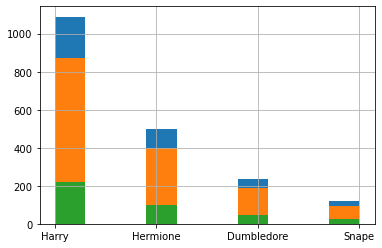

In [101]:
# your code
from sklearn.model_selection import StratifiedShuffleSplit

hp_generator = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=433484)
hp_train_index, hp_test_index = next(hp_generator.split(hp_processed['Sentence'], hp_processed['Character']))

hp_train = hp_processed[hp_processed.index.isin(hp_train_index)]
hp_test = hp_processed[hp_processed.index.isin(hp_test_index)]
# Looking at the distributions (Orange+Green matches blue, so we good)
hp_processed['Character'].hist()
hp_train['Character'].hist()
hp_test['Character'].hist()

print(hp_train.shape)
print(hp_test.shape)

3) Preprocess the training and test corpus (to lowercase, no punctuation, tokenization, lemmatization, and stopword removal) and obtain a boolean document-term matrix (i.e, each row in the matrix contains only 1s and 0s depending on whether a particular word appears in a sentence or not). Train a logistic classifier on the training corpus with the character as target feature. Use the classifier to predict the character of the sentences in the test corpus and show its accuracy on the test corpus. Comment on the result.

In [102]:
# your code
import string
from nltk.stem import WordNetLemmatizer 
from sklearn.preprocessing import MultiLabelBinarizer

# Our preprocessing from the task
stop_words = stopwords.words('english')
lemmatization = WordNetLemmatizer()
def preprocess_data(sentence):
    sentence = sentence.lower()
    #print(sentence)
    sentence = "".join([char for char in sentence if char not in string.punctuation])
    #print(sentence)
    sentence = nltk.word_tokenize(sentence)
    #print(sentence)
    sentence = [lemmatization.lemmatize(word) for word in sentence]
    #print(sentence)
    sentence = [word for word in sentence if word not in stop_words]
    #print(sentence)
    return [str(word) for word in sentence]

# first we preprocess the hp_train
log_hp_train_preprocessed = pd.DataFrame()
log_hp_train_preprocessed[['Sentence','Character']] = hp_train.apply(lambda row: pd.Series([preprocess_data(row['Sentence']),row['Character']]), axis=1)
log_hp_train_preprocessed.reset_index(inplace=True, drop=True)
# than we preprocess the hp_test
log_hp_test_preprocessed = pd.DataFrame()
log_hp_test_preprocessed[['Sentence','Character']] = hp_test.apply(lambda row: pd.Series([preprocess_data(row['Sentence']),row['Character']]), axis=1)
log_hp_test_preprocessed.reset_index(inplace=True, drop=True)
# we have to merge the train and test together, maybe test has words that does not exist in train, therefore would break the encoding
merge_train_and_test = pd.concat([log_hp_train_preprocessed, log_hp_test_preprocessed], ignore_index=True)
merge_train_and_test.reset_index(inplace=True, drop=True)
# use MultiLabelBinarizer to build 'document-term matrix' ... dont forget the Characters feature
mlb = MultiLabelBinarizer()
merge_train_and_test_label_bin = pd.DataFrame(mlb.fit_transform(merge_train_and_test['Sentence']),columns=mlb.classes_, index=merge_train_and_test.index)
merge_train_and_test_label_bin = pd.concat([merge_train_and_test_label_bin,merge_train_and_test['Character']], axis=1)
# we know that we have 1556 train, so we just cut off these and take the rest as test. We did not mix so order should be same!
log_train = merge_train_and_test_label_bin.head(1556)
log_test = merge_train_and_test_label_bin.tail(389)

print("shape transformed train {}".format(log_hp_train_preprocessed.shape))
print("shape transformed test {}".format(log_hp_test_preprocessed.shape))
print("merge test and train: {}".format(merge_train_and_test.shape))
print("MultiLabelBinarizer: {}".format(merge_train_and_test_label_bin.shape))
print("log_train: {}".format(log_train.shape))
print("log_test: {}".format(log_test.shape))

shape transformed train (1556, 2)
shape transformed test (389, 2)
merge test and train: (1945, 2)
MultiLabelBinarizer: (1945, 1567)
log_train: (1556, 1567)
log_test: (389, 1567)


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, PredefinedSplit


X = log_train.loc[:,log_train.columns != 'Character'].values
y = log_train["Character"].values

# findig parameters by brute force bunch of them
LRparam_grid = {
    'class_weight' : ['balanced', None],
    'C': [ 0.1, 1,10],
    'max_iter': [2,5,10,25],
    'penalty': ['l2'],
    'multi_class': ['ovr'], # tried multinomial with saga  but worse...
    'solver': ['liblinear']
}
LR = LogisticRegression(random_state=433484)
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit=True,
                         verbose = False, cv=5, scoring='balanced_accuracy')
LR_search.fit(X , y)
estimator = LR_search.best_estimator_
print(LR_search.best_params_)
print("Done")

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

{'C': 10, 'class_weight': 'balanced', 'max_iter': 2, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
Done


/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

  Dumbledore       0.40      0.30      0.34        47
       Harry       0.64      0.80      0.71       218
    Hermione       0.33      0.19      0.24       100
       Snape       0.26      0.25      0.26        24

    accuracy                           0.55       389
   macro avg       0.41      0.39      0.39       389
weighted avg       0.51      0.55      0.52       389

accuracy 0.5501285347043702
accuracy (random guessing): 0.2647814910025707


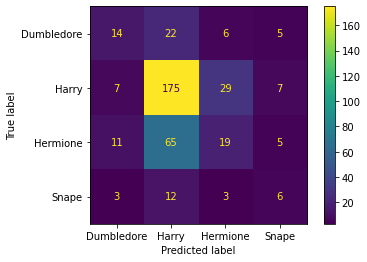

In [104]:
predict = estimator.predict(log_test.loc[:, log_test.columns != "Character"].values)
truth = log_test["Character"].values
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
print(classification_report(truth,predict))
print("accuracy {}".format(accuracy_score(truth,predict)))
ConfusionMatrixDisplay.from_predictions(truth, predict)
from random import choice
def random_guess(n):
    predict=['Dumbledore', 'Harry', 'Hermione', 'Snape']
    result = []
    for _ in range(0,n):
        result.append(choice(predict))
    return result
print("accuracy (random guessing): {}".format(accuracy_score(truth,random_guess(389))))

The model can predict Harry quite 'well' (with 0.64 precision). Although having much more training data for Hermione, the prediction is not more precise than for Dumbledore. This is because the model confuses Hermione with Harry! This can have various reason. It might be possible that both characters are close to each other = Friends, same age -> similar language!. Predicting snape is basically just as bad as guessing (mimics the distribution of data). We know that Snape is underrepresented in our train set... Although there is less train data for Dumbledore, our prediction is more precise than for Hermione. It can be possible that this is caused by Dumbledore's special language since he is a wise man...

The accuracy is about 0.55 which is definitely better than random guessing! We wanted to train on optimizing balanced accuracy as our goal is to predict all classes well!

4) Next, you are going to perform the same predicting task based on doc2vec.

1. Preprocess the training corpus (to lowercase, no punctuation, tokenization, lemmatization, and stopword removal). 
2. Create a doc2vec model to reduce the dimension of the document vector. Choose a vector size 4-8 and ignore all words whose count is lower than 3.
3. Train the doc2vec model on the training data (thus creating an embedding).
4. Use the created embedding to convert the training set to a set of document vectors.
5. Train a logistic classifier on the train data with the character as target feature.
6. Show the accuracy of prediction on the test data and comment on it.

In [105]:
# your code
merge_train_and_test = pd.concat([hp_train, hp_test], ignore_index=True)
merge_train_and_test.reset_index(drop=True, inplace=True)

# Preprocessing
corpus = []
tagged_docs = []
index=0
def tag_corpus(sentence):
    global index
    # use the preprocess_data function from above
    sentence = preprocess_data(sentence)
    # create the taggetdoc needed for doc2vec
    corpus.append(sentence)

    tagged_docs.append( TaggedDocument(sentence, [index]))
    index += 1

merge_train_and_test.apply(lambda row: tag_corpus(row['Sentence']), axis=1)
train_tags = tagged_docs[:1556]
# should discard on default
model = Doc2Vec(train_tags, vector_size=8, seed=433484, min_count=3)
model.build_vocab(train_tags)
model.train(corpus_iterable=train_tags, total_examples=model.corpus_count, epochs=50)
vectors = [model.infer_vector(doc) for doc in corpus]



# great now same as above, first 1556 are train, 389 rest are test!
doc_train = pd.DataFrame(vectors[:1556])
doc_test = pd.DataFrame(vectors[-389:])
doc_train = doc_train.join(merge_train_and_test.head(1556)['Character'])
_tmp = merge_train_and_test.tail(389)['Character']
_tmp.reset_index(inplace=True, drop=True)
doc_test = doc_test.join(_tmp)

print(doc_train.shape)
print(doc_test.shape)


(1556, 9)
(389, 9)


In [106]:
# your code
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, PredefinedSplit


X = doc_train.loc[:,doc_train.columns != 'Character'].values
y = doc_train["Character"].values

# findig parameters by brute force bunch of them
LRparam_grid = {
    'class_weight' : ['balanced', None],
    'C': [ 0.1, 1,10,25],
    'max_iter': [2,5,10,25, 50],
    'penalty': ['l2', 'elasticnet'],
    'multi_class': ['ovr', 'multinomial'],
    'solver': ['liblinear', 'saga' ]
}
LR = LogisticRegression(random_state=433484)
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit=True,
                         verbose = False, cv=5, scoring='balanced_accuracy')
LR_search.fit(X , y)
estimator = LR_search.best_estimator_
print(LR_search.best_params_)
print("Done")

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warn

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterat

/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

{'C': 25, 'class_weight': 'balanced', 'max_iter': 2, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'saga'}
Done


/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1000 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/kenny/opt/anaconda3/envs/env-IDS2

              precision    recall  f1-score   support

  Dumbledore       0.16      0.26      0.19        47
       Harry       0.57      0.72      0.64       218
    Hermione       0.00      0.00      0.00       100
       Snape       0.15      0.21      0.18        24

    accuracy                           0.45       389
   macro avg       0.22      0.30      0.25       389
weighted avg       0.35      0.45      0.39       389

accuracy 0.4498714652956298
accuracy (random guessing): 0.26735218508997427


/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kenny/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

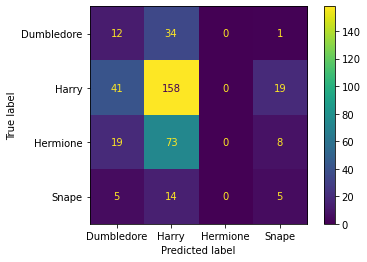

In [107]:
# your code
predict = estimator.predict(doc_test.loc[:, doc_test.columns != "Character"].values)
truth = doc_test["Character"].values
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
print(classification_report(truth,predict))
print("accuracy {}".format(accuracy_score(truth,predict)))
ConfusionMatrixDisplay.from_predictions(truth, predict)
from random import choice
def random_guess(n):
    predict=['Dumbledore', 'Harry', 'Hermione', 'Snape']
    result = []
    for _ in range(0,n):
        result.append(choice(predict))
    return result
print("accuracy (random guessing): {}".format(accuracy_score(truth,random_guess(389))))

Our accuracy is about 0.37. This is worst than the approach using the One Hot Encoded features. We tried running on optimizing `accuracy` in the `GridSearchCV` and could achieve similar accuracy as in the above task by only guessing harry. But we wanted to optimize the `balanced_accuracy` as the goal is to predict all classes well. 

**c)** For the following tasks use the `hp_processed` (the data before splitting into training and test data).

1) For each character, create a list containing all sentences of that character.
    For each character separately, build a bigram language model using MLE. Do not perform stemming and stopword removal for this task, but apply other preprocessing steps such as to lowercase, no punctuation, and tokenization. Use both right and left padding.

In [108]:
# your code
harry_sentence = hp_processed.query("Character == 'Harry'")['Sentence'].tolist()
dumbledore_sentence = hp_processed.query("Character == 'Dumbledore'")['Sentence'].tolist()
hermione_sentence = hp_processed.query("Character == 'Hermione'")['Sentence'].tolist()
snape_sentence = hp_processed.query("Character == 'Snape'")['Sentence'].tolist()

def flatten_list(lists):
    
    flattened = []
    for l in lists:
        flattened.extend(l)
        
    return flattened

from nltk.util import pad_sequence
def sentenize_this(sentence):
    sentence = sentence.lower()
    #print(sentence)
    sentence = "".join([char for char in sentence if char not in string.punctuation])
    #print(sentence)
    sentence = nltk.word_tokenize(sentence)
    #sentence = list(pad_sequence(sentence, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>', n=2))
    #bigram = list(nltk.bigrams(sentence))
    return sentence

from nltk.lm.preprocessing import flatten, padded_everygram_pipeline

text_harry = [sentenize_this(s) for s in harry_sentence]
train_harry, vocab_harry = padded_everygram_pipeline(2, text_harry)

text_dumbledore = [sentenize_this(s) for s in dumbledore_sentence]
train_dumbledore, vocab_dumbledore = padded_everygram_pipeline(2, text_dumbledore)

text_hermione = [sentenize_this(s) for s in hermione_sentence]
train_hermione, vocab_hermione = padded_everygram_pipeline(2, text_hermione)

text_snape = [sentenize_this(s) for s in snape_sentence]
train_snape, vocab_snape = padded_everygram_pipeline(2, text_snape)

from nltk.lm import MLE
lm_harry = MLE(2)
lm_harry.fit(train_harry, vocab_harry)

lm_dumbledore = MLE(2)
lm_dumbledore.fit(train_dumbledore, vocab_dumbledore)

lm_hermione = MLE(2)
lm_hermione.fit(train_hermione, vocab_hermione)

lm_snape = MLE(2)
lm_snape.fit(train_snape, vocab_snape)

2) For each character, use the created language model to generate a sentence of ten words. Display the sentences.

In [110]:
# your code
print("Harry says: {}".format(' '.join(lm_harry.generate(10, random_seed=43484))))
print("Dumbledore says: {}".format(' '.join(lm_dumbledore.generate(10, random_seed=3484))))
print("Hermione says: {}".format(' '.join(lm_hermione.generate(10, random_seed=4484))))
print("Snape says: {}".format(' '.join(lm_snape.generate(10, random_seed=4334802))))

Harry says: okay </s> lamp down the malfoys </s> <s> then it
Dumbledore says: or glide over there </s> you must be spared </s>
Hermione says: on </s> we succeed more than one wizard voldemort always
Snape says: asphodel and wolfsbane </s> by the stomach of you silly


3) Build a 4-gram model with the same data as in the previous task. Use both right and left padding.

In [111]:
# your code
harry_sentence = hp_processed.query("Character == 'Harry'")['Sentence'].tolist()
dumbledore_sentence = hp_processed.query("Character == 'Dumbledore'")['Sentence'].tolist()
hermione_sentence = hp_processed.query("Character == 'Hermione'")['Sentence'].tolist()
snape_sentence = hp_processed.query("Character == 'Snape'")['Sentence'].tolist()

def flatten_list(lists):
    
    flattened = []
    for l in lists:
        flattened.extend(l)
        
    return flattened

from nltk.util import pad_sequence
def sentenize_this(sentence):
    sentence = sentence.lower()
    #print(sentence)
    sentence = "".join([char for char in sentence if char not in string.punctuation])
    #print(sentence)
    sentence = nltk.word_tokenize(sentence)
    #sentence = list(pad_sequence(sentence, pad_left=True, pad_right=True, left_pad_symbol='<s>', right_pad_symbol='</s>', n=2))
    #bigram = list(nltk.bigrams(sentence))
    return sentence

from functools import partial
from itertools import chain
from nltk.util import everygrams, pad_sequence, ngrams
flatten = chain.from_iterable
pad_both_ends = partial(
    pad_sequence,
    pad_left=True,
    left_pad_symbol="<s>",
    pad_right=True,
    right_pad_symbol="</s>",
)
def padded_everygram_pipeline(order, text):
    padding_fn = partial(pad_both_ends, n=order)
    return (
        (everygrams(list(padding_fn(sent)), max_len=order) for sent in text),
        flatten(map(padding_fn, text)),
    )

text_harry = [sentenize_this(s) for s in harry_sentence]
train_harry, vocab_harry = padded_everygram_pipeline(4, text_harry)

text_dumbledore = [sentenize_this(s) for s in dumbledore_sentence]
train_dumbledore, vocab_dumbledore = padded_everygram_pipeline(4, text_dumbledore)

text_hermione = [sentenize_this(s) for s in hermione_sentence]
train_hermione, vocab_hermione = padded_everygram_pipeline(4, text_hermione)

text_snape = [sentenize_this(s) for s in snape_sentence]
train_snape, vocab_snape = padded_everygram_pipeline(4, text_snape)



from nltk.lm import MLE
lm_harry = MLE(4)
lm_harry.fit(train_harry, vocab_harry)

lm_dumbledore = MLE(4)
lm_dumbledore.fit(train_dumbledore, vocab_dumbledore)

lm_hermione = MLE(4)
lm_hermione.fit(train_hermione, vocab_hermione)

lm_snape = MLE(4)
lm_snape.fit(train_snape, vocab_snape)



4) For each character, use the created 4-gram language model to generate a sentence of ten words. Display the sentences.

In [112]:
# your code

print("Harry says: {}".format(' '.join(lm_harry.generate(10, text_seed=['<s>'], random_seed=43484))))
print("Dumbledore says: {}".format(' '.join(lm_dumbledore.generate(10, text_seed=['<s>'],random_seed=4033484))))
print("Hermione says: {}".format(' '.join(lm_hermione.generate(10, text_seed=['<s>'], random_seed=4337484))))
print("Snape says: {}".format(' '.join(lm_snape.generate(10, text_seed=['<s>'], random_seed=43344))))


Harry says: come on </s> </s> </s> </s> </s> </s> </s> </s>
Dumbledore says: <s> hagrid is bringing him </s> </s> </s> </s> </s>
Hermione says: <s> everywhere else is full </s> </s> </s> </s> </s>
Snape says: <s> <s> a girl has been snatched by the monster


5) Compare the sentences generated by the bigram model with the sentences generated by the 4-gram model.

It looks like the bigram model dont't seem to be making much sense while the 4-gram model make more realistic sentences. THe english language is probably to complicated for a 2 words context to make realistic sentences. Looking at the 4-Gram we also see that the model generates more stopping signs. Since our sentences in the data set are relatively short, we have many sentences and many short sentences which caused many stopping signs. The MLE is than resolving them as the maximum liklihood. 

# Q5 - Process Mining (23 points)

In this task, we consider a simulated process of students that participate in an online course.
The course comprises 6 batches of lecture material as well as a mandatory assignment to be delivered in two parts. (Note that in this process, it is not required to achieve a certain score in the assignment in order to be admitted to the exam.)

While there are strict deadlines for the assignment and the exam, there is only a recommended schedule for the lecture material (i.e., consume material in order).

The system logs for every student, among other activities, when he downloads a certain lecture material batch. 

## Loading the Data and Basic Statistics

**a)** Load the data **log.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - 'Activity' is the activity key
 - 'Student' is the case ID
 - 'Timestamp' is the timestamp

In [247]:
# Your code
df = pd.read_csv('./dataset/log.csv', sep=',')
display(df)
pl = pm4py.format_dataframe(df, case_id='Student', activity_key='Activity', timestamp_key='Timestamp')
display(pl)

# convert dataframe to pm4py log
log = log_converter.apply(pl)

Timestamp  Student  Activity Lifecycle  Points
0      2021-09-15 00:18:18   346630  Register  complete     NaN
1      2021-09-15 00:27:35   351651  Register  complete     NaN
2      2021-09-15 01:23:21   343682  Register  complete     NaN
3      2021-09-15 01:37:35   343951  Register  complete     NaN
4      2021-09-15 01:55:36   348017  Register  complete     NaN
...                    ...      ...       ...       ...     ...
19647  2022-02-20 14:00:00   344147      Exam  complete    87.0
19648  2022-02-20 14:00:00   348171      Exam  complete    75.0
19649  2022-02-20 14:00:00   354308      Exam  complete    90.0
19650  2022-02-20 14:00:00   345076      Exam  complete    84.0
19651  2022-02-20 14:00:00   349555      Exam  complete    74.0

[19652 rows x 5 columns]

time:timestamp case:concept:name                concept:name  \
1413  2021-10-05 21:29:31+00:00            343516                    Register   
6537  2021-12-03 08:30:11+00:00            343516                Assignment 1   
7060  2021-12-03 21:39:25+00:00            343516  Consume Lecture Material 3   
8198  2021-12-05 04:04:49+00:00            343516  Consume Lecture Material 1   
8868  2021-12-06 05:21:45+00:00            343516  Consume Lecture Material 2   
...                         ...               ...                         ...   
16732 2022-02-16 22:45:20+00:00            354699  Consume Lecture Material 5   
16763 2022-02-17 05:30:52+00:00            354699  Consume Lecture Material 3   
16817 2022-02-17 11:50:09+00:00            354699  Consume Lecture Material 2   
16929 2022-02-17 22:30:00+00:00            354699  Consume Lecture Material 4   
18199 2022-02-20 14:00:00+00:00            354699                        Exam   

      Lifecycle  Points  @@index  
1413   complete     NaN     1413  
6537   complete    78.0     6537  
7060   complete     NaN     7060  
8198   complete     NaN     8198  
8868   complete     NaN     8868  
...         ...     ...      ...  
16732  complete     NaN    16732  
16763  complete     NaN    16763  
16817  complete     NaN    16817  
16929  complete     NaN    16929  
18199  complete    42.0    18199  

[19652 rows x 6 columns]

**b)** Compute the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [248]:
# Your code
print(f"Number of events: {len(df.index)}")
print(f"Number of cases: {len(log)}") 
print(f"Earliest timestamp: {min(pm4py.get_event_attribute_values(log, 'time:timestamp'))}")
print(f"Latest timestamp: {max(pm4py.get_event_attribute_values(log, 'time:timestamp'))}")
print(f"Number of trace variants: {len(pm4py.get_variants_as_tuples(log))}")

Number of events: 19652
Number of cases: 2000
Earliest timestamp: 2021-09-15 00:18:18+00:00
Latest timestamp: 2022-02-20 14:00:00+00:00
Number of trace variants: 432


**c)** Usually, it is insightful to have a look at the distribution of the variants in terms of how often a certain variant is present in the log.
Therefore, create a **scatter plot** that shows the distribution of the variants as follows:
- x-axis: The variants (in ascending order of their support)
- y-axis: Frequency of the variant in the log (total or relative)

Text(0, 0.5, 'Occurences')

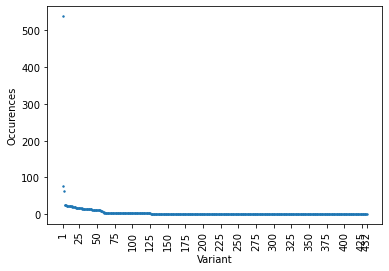

In [249]:
# Your code
#Get statisticits about traces returns a [dict] where each dict contains a trace variant and its count
variants_count = case_statistics.get_variant_statistics(log)
#Sort each element in list 'variants_count' by its key 'count'
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

# get labels
labels = []
for x in range(len(variants_count)):
    # labels.append(str(x['variant']))
    labels.append(x+1)

# get counts
counts = []
for c in variants_count:
    counts.append(c['count'])

# plot
plt.scatter(labels,counts, s=2)

#For readability variants are labeled by their position in the sort of all variants by frequency.
plt.xticks(ticks=[1,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,432], rotation='vertical')
plt.xlabel('Variant')
plt.ylabel('Occurences')



**d)** While the variant distribution shows potential standard process executions in terms of the activity ordering, the distribution of the case durations shows the typical timeframe of cases.
Create a histogram plot over the case durations. For the sake of readability, make sure that the x-axis labels (in this case the case durations) have an easily readable format, that is, your x-axis labels should look like this:
<br></br>
<div>
<img src="templates/caseDurationXAxis.png" width="500"/>
</div>

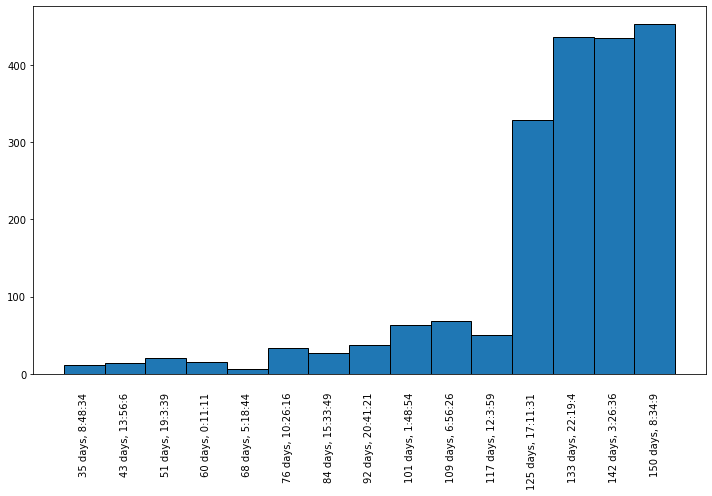

In [250]:
# your code
import datetime as dt
import matplotlib.dates as md

def calc_labels(time):
    """
    Formates a given time to the specified days, hours:minutes:seconds label.
    @Param: int time in seconds
    @returns: days, hours:minutes:seconds string
    """
    day = time // (24 * 3600)
    time = time % (24 * 3600)
    hour = time // 3600
    time %= 3600
    minute = time // 60
    time %= 60
    seconds = time
    return f"{int(day)} days, {int(hour)}:{int(minute)}:{int(seconds)}"


# get the case durations in seconds
all_case_durations = case_statistics.get_all_case_durations(log, parameters={case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"})

# put durations to into histogram
n_bins=15
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True) 
n, bins, patches = plt.hist(all_case_durations, bins=n_bins, edgecolor='black')

# calculate the bin label for each bin 
ticklabels = []
for dur in bins:
    ticklabels.append(calc_labels(dur))

# remove the old labels
xtformat = md.DateFormatter('%H:%M')
xtinter = md.MinuteLocator(byminute=[0], interval=1)
axs.xaxis.set_major_formatter(xtformat)
axs.xaxis.set_major_locator(xtinter)

# annotate the new bin labels
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for label, x in zip(ticklabels, bin_centers):
    # Laben the bins with the required format
    text = axs.annotate(label, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center',rotation=90 )

# show the histogram
plt.show()

## Discovery and Conformance Checking
Next, you are going to discover process models for different perspectives on the process. Moreover, you will evaluate how well the process models can represent the behavior present in the log (i.e., the fitness of the models).

### Filtering

**e)** Before discovering models, create three addtional perspectives onto the process by creating three additional event log from the log loaded in a):

1. Log containing only 30% of the most frequent traces (**log_varaint03**)
2. Log containing only 50% of the most frequent traces (**log_varaint05**)
3. Log containing only students that take the exam, that is, cases that end with 'Exam' (**log_exam**)

In [253]:
# your code
log_variant03 = pm4py.filter_variants_percentage(log, 0.3)

log_variant05 = pm4py.filter_variants_percentage(log, 0.5)

log_exam = attributes_filter.apply(log, ['Exam'],
                                          parameters={attributes_filter.Parameters.ATTRIBUTE_KEY: "concept:name", attributes_filter.Parameters.POSITIVE: True})

/var/folders/7w/vnglv8td2nzbzrsjv8hs36d80000gn/T/ipykernel_17273/2502706861.py:2: DeprecatedWarning:

filter_variants_percentage is deprecated as of 2.1.3.1 and will be removed in 2.4.0. Filtering method will be removed due to fuzzy interpretation of the threshold.                        Will be replaced with two new functions filter_variants_top_k and filter_variants_relative_frequency

/var/folders/7w/vnglv8td2nzbzrsjv8hs36d80000gn/T/ipykernel_17273/2502706861.py:4: DeprecatedWarning:

filter_variants_percentage is deprecated as of 2.1.3.1 and will be removed in 2.4.0. Filtering method will be removed due to fuzzy interpretation of the threshold.                        Will be replaced with two new functions filter_variants_top_k and filter_variants_relative_frequency



### Inductive Miner and Replay Fitness

**f)** To get a better understanding of the processes in our four event logs (base log + three additional logs), create processes models using the **Inductive Miner**.
Concretely, for each of the 4 event logs, create two process models using the Inductive Miner with noise threshold **0 and 0.2**. Moreover, to access how well the model presents the logged behavior, apply conformance checking in terms of token-based replay to the model and the log from which it has been mined. Visualize each model as a process tree and as the corresponding Petri net.

In total, your cells should output 8 conformance scores, 8 process trees, and 8 Petri nets (for each log + noise threshold combination). Make sure that it is clear which model and conformance score belongs to log and parameter configuration.

For example, your output can look like this
#### Log: Base
##### IM threshold 0
>Fitness score

>Picture of the process tree

>Picture of the Petri net

##### IM threshold 0.2
>Fitness score

>Picture of the process tree

>Picture of the Petri net

**Describe your results**. How well do the models fit and, in particular, how do the models for
- log_variant05 and log (base log)
- log_variant05 and log_variant03
- log base and log_exam

differ in terms of the behavior that they allow?


LOG: Base
IM threshold 0.0


replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

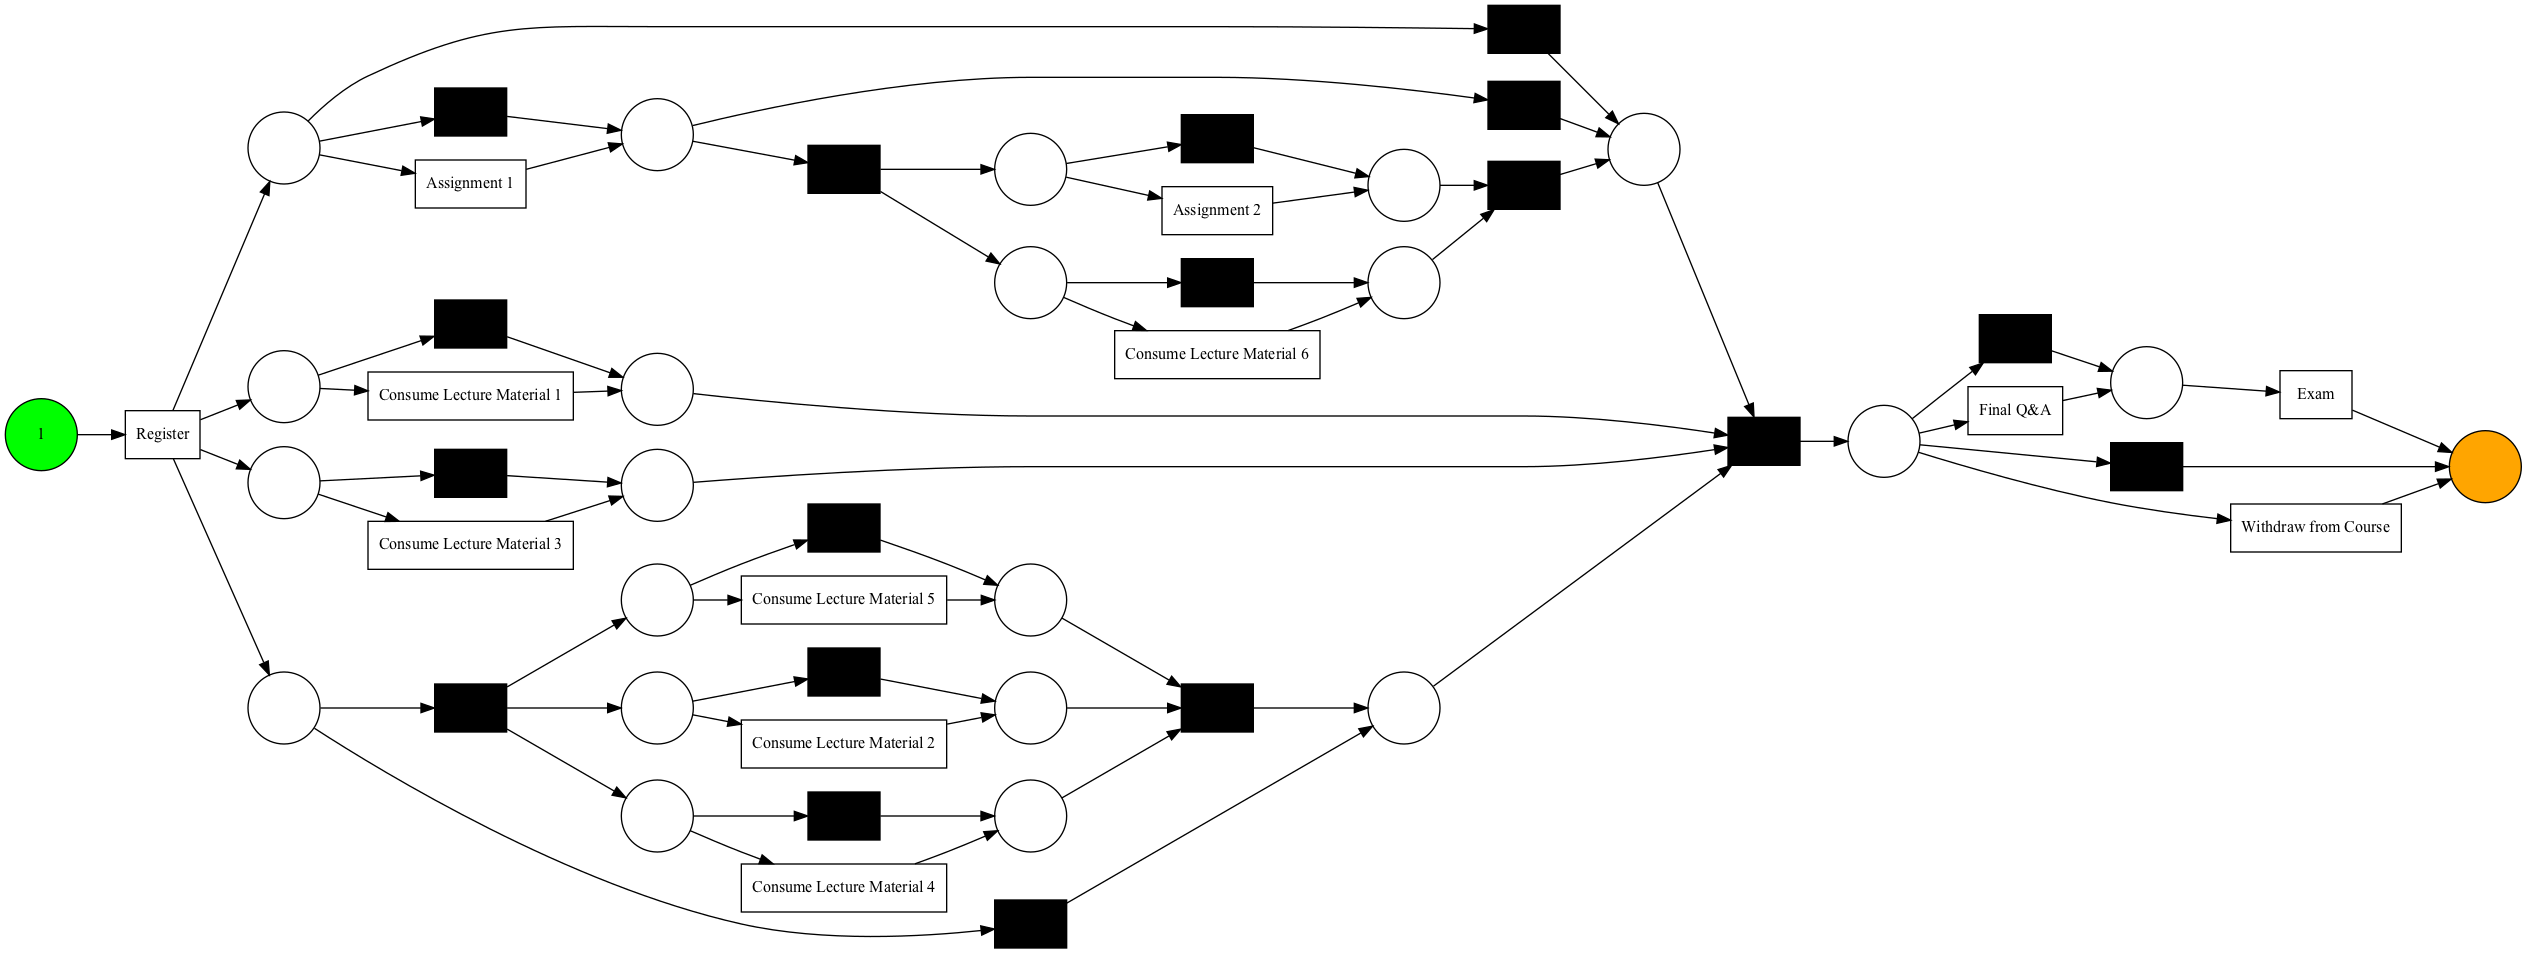

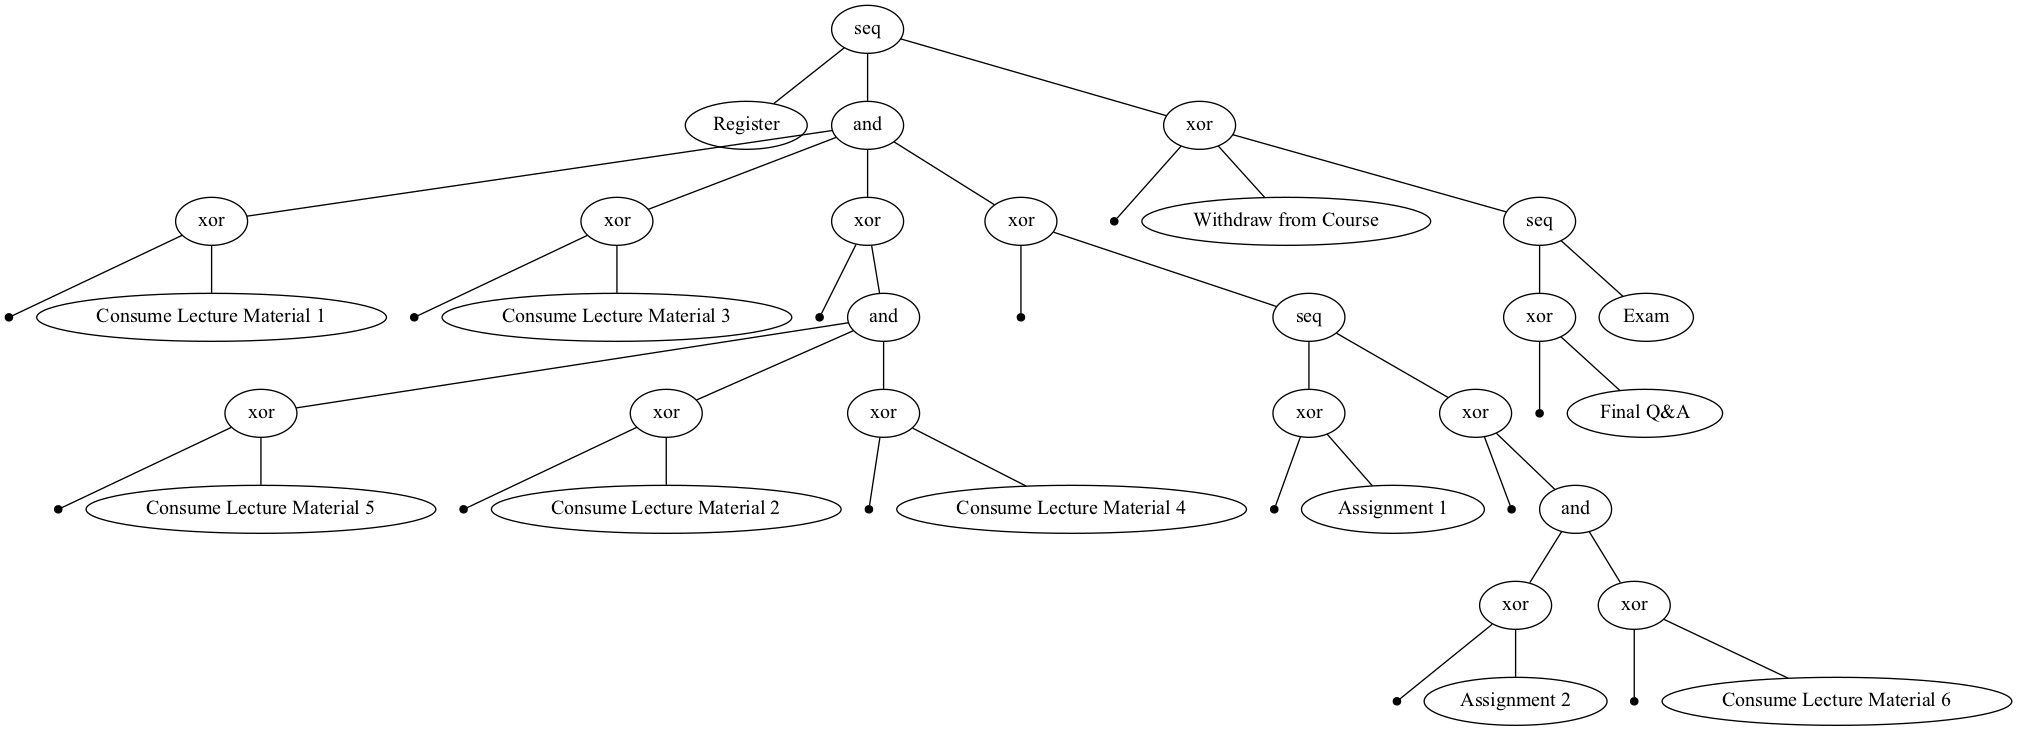

LOG: Base
IM threshold 0.2


replaying log with TBR, completed variants ::   0%|          | 0/432 [00:00<?, ?it/s]

{'perc_fit_traces': 69.3,
 'average_trace_fitness': 0.905576373340711,
 'log_fitness': 0.9325048340840334,
 'percentage_of_fitting_traces': 69.3}

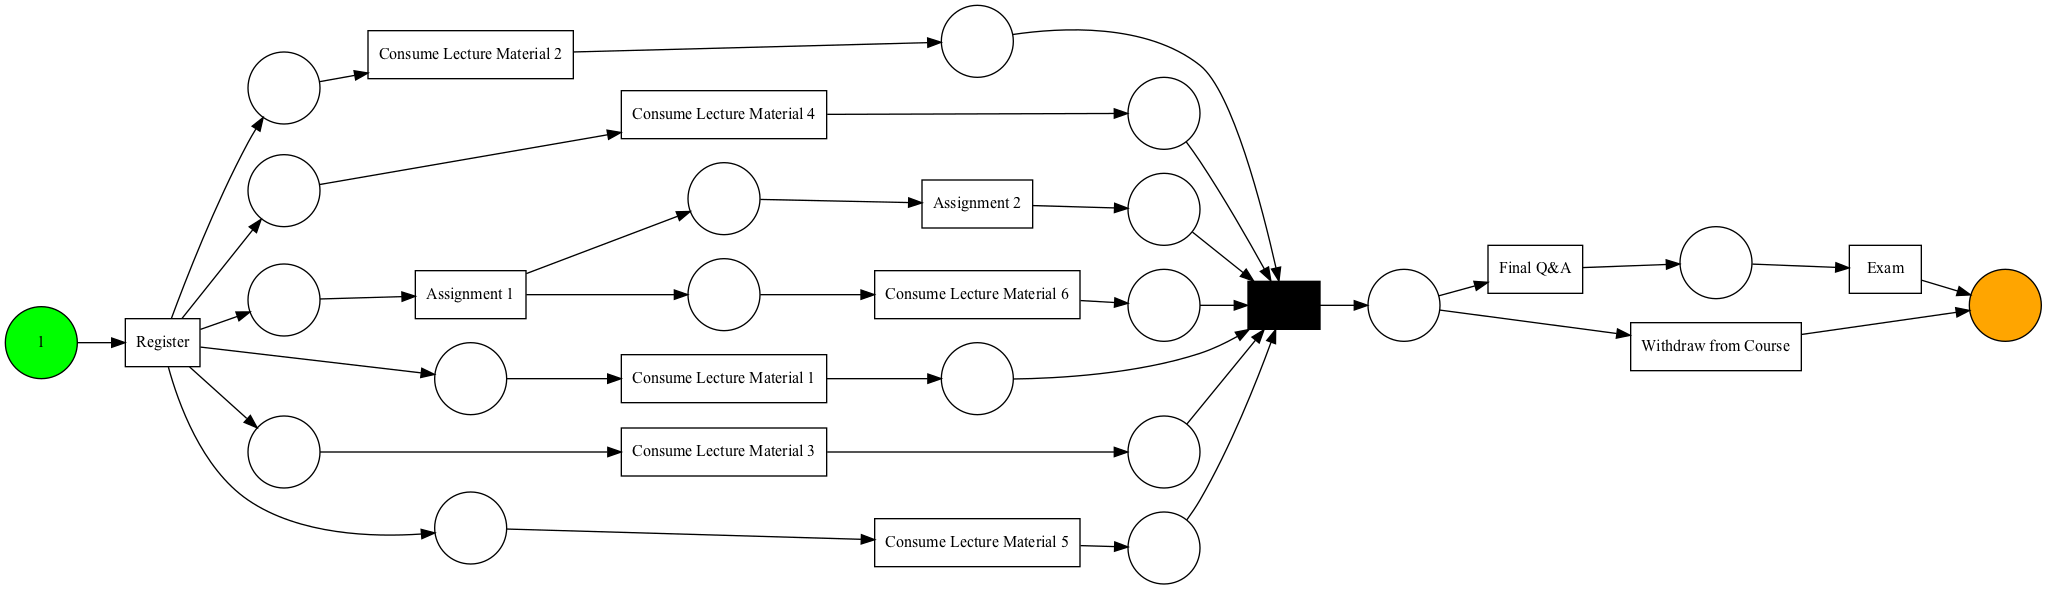

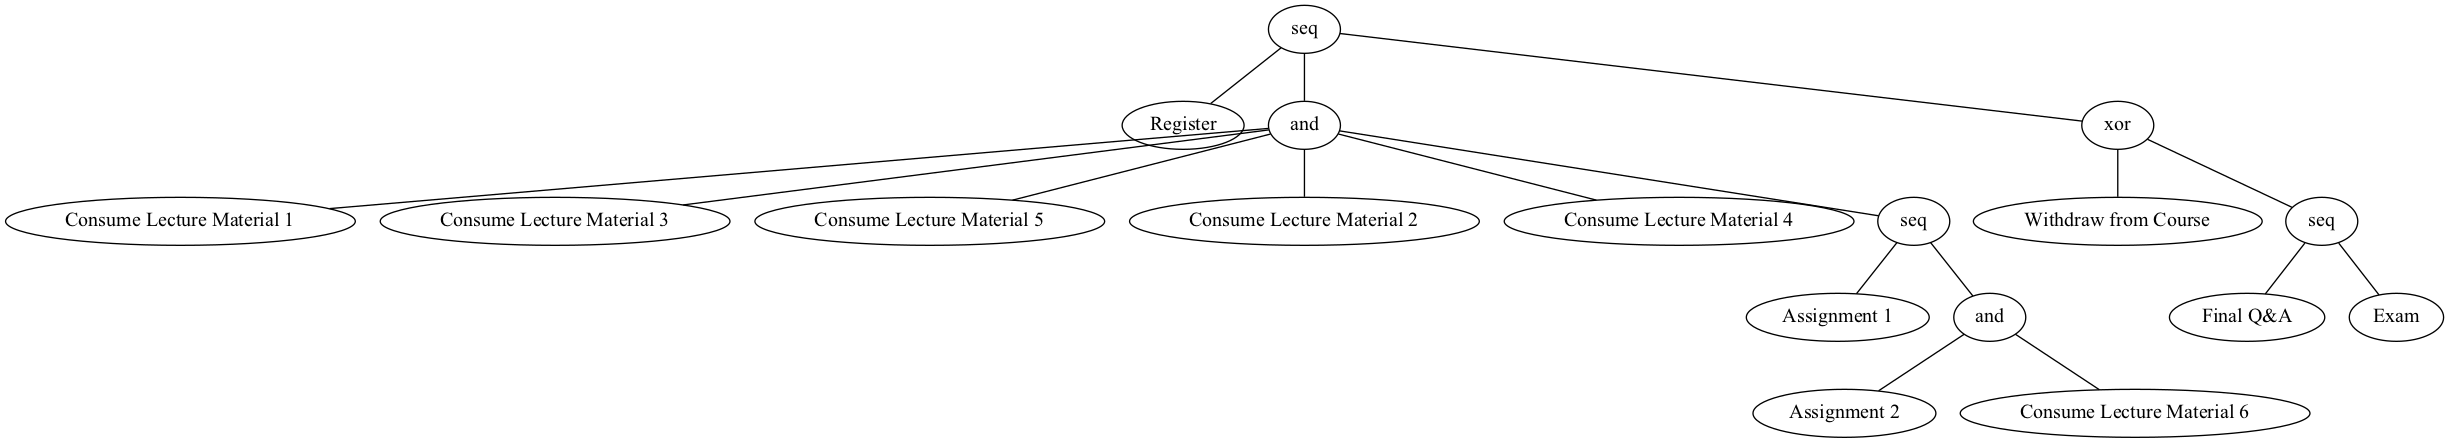

LOG: Variant 0.3
IM threshold 0.0


replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

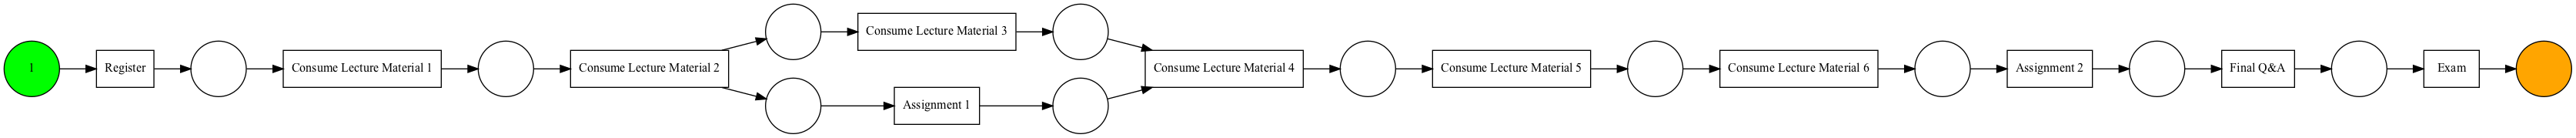

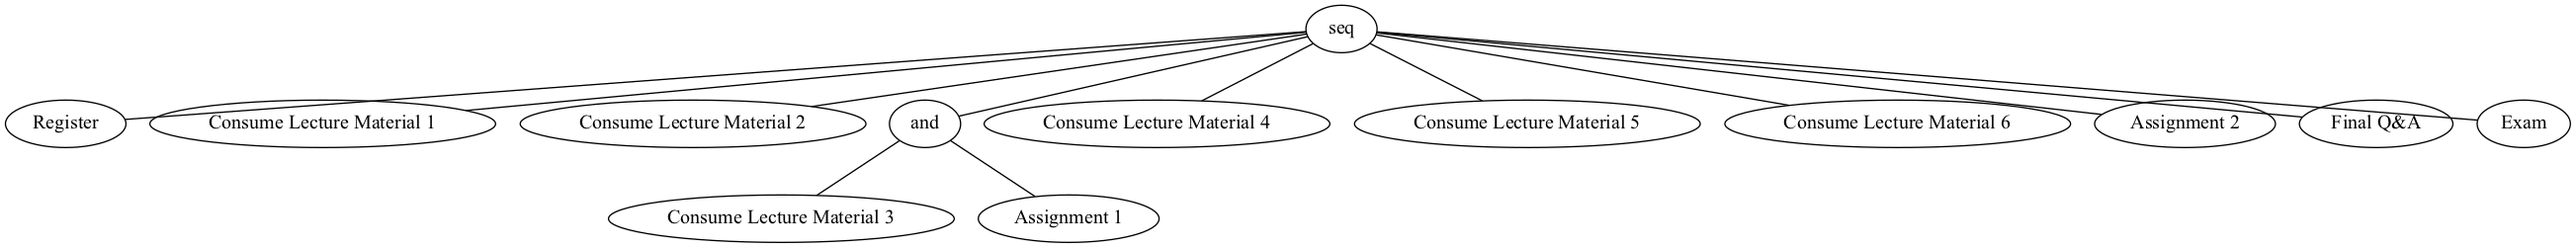

LOG: Variant 0.3
IM threshold 0.2


replaying log with TBR, completed variants ::   0%|          | 0/2 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

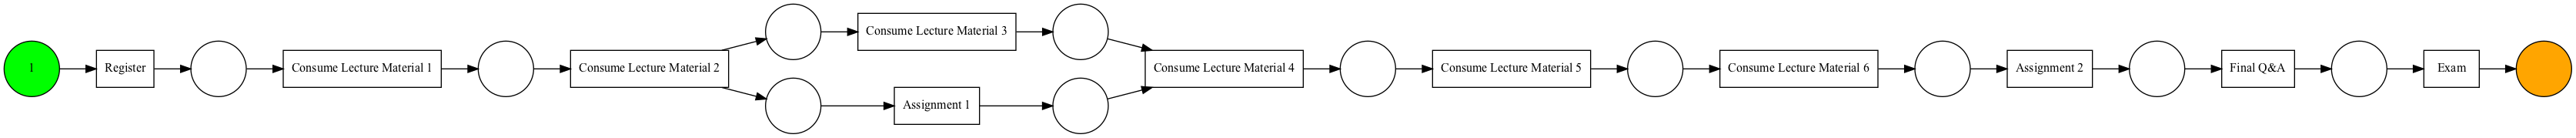

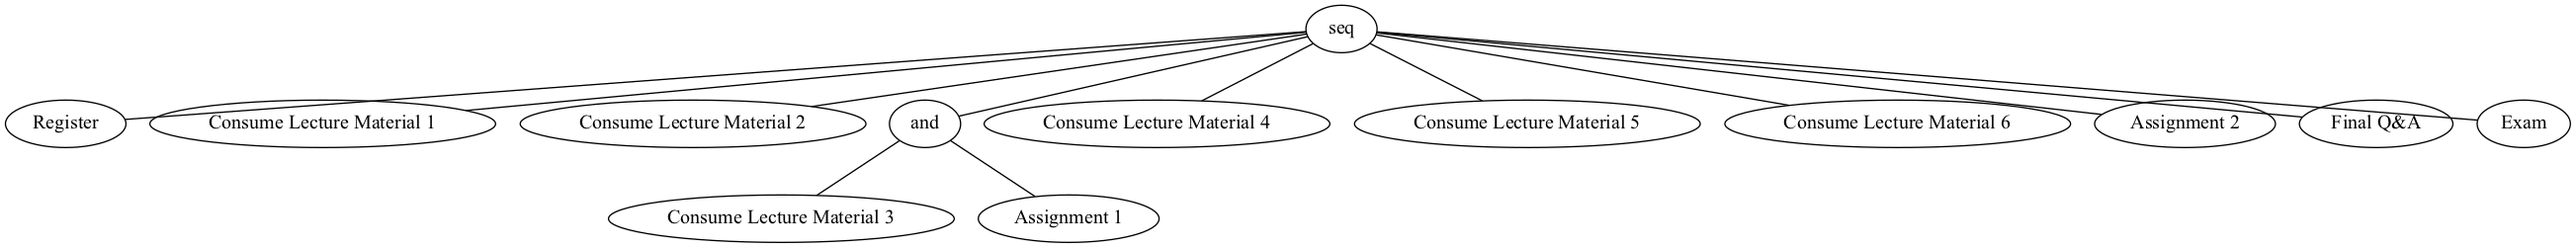

LOG: Variant 0.5
IM threshold 0.0


replaying log with TBR, completed variants ::   0%|          | 0/18 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

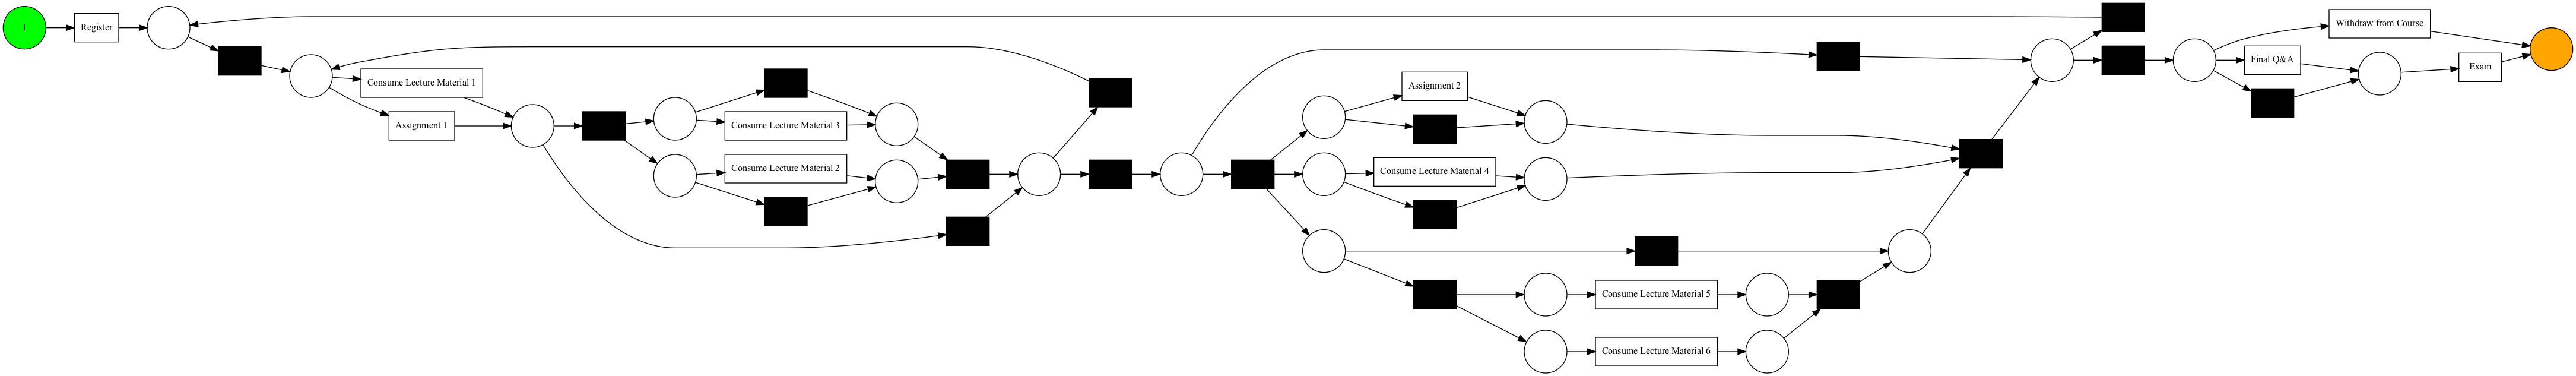

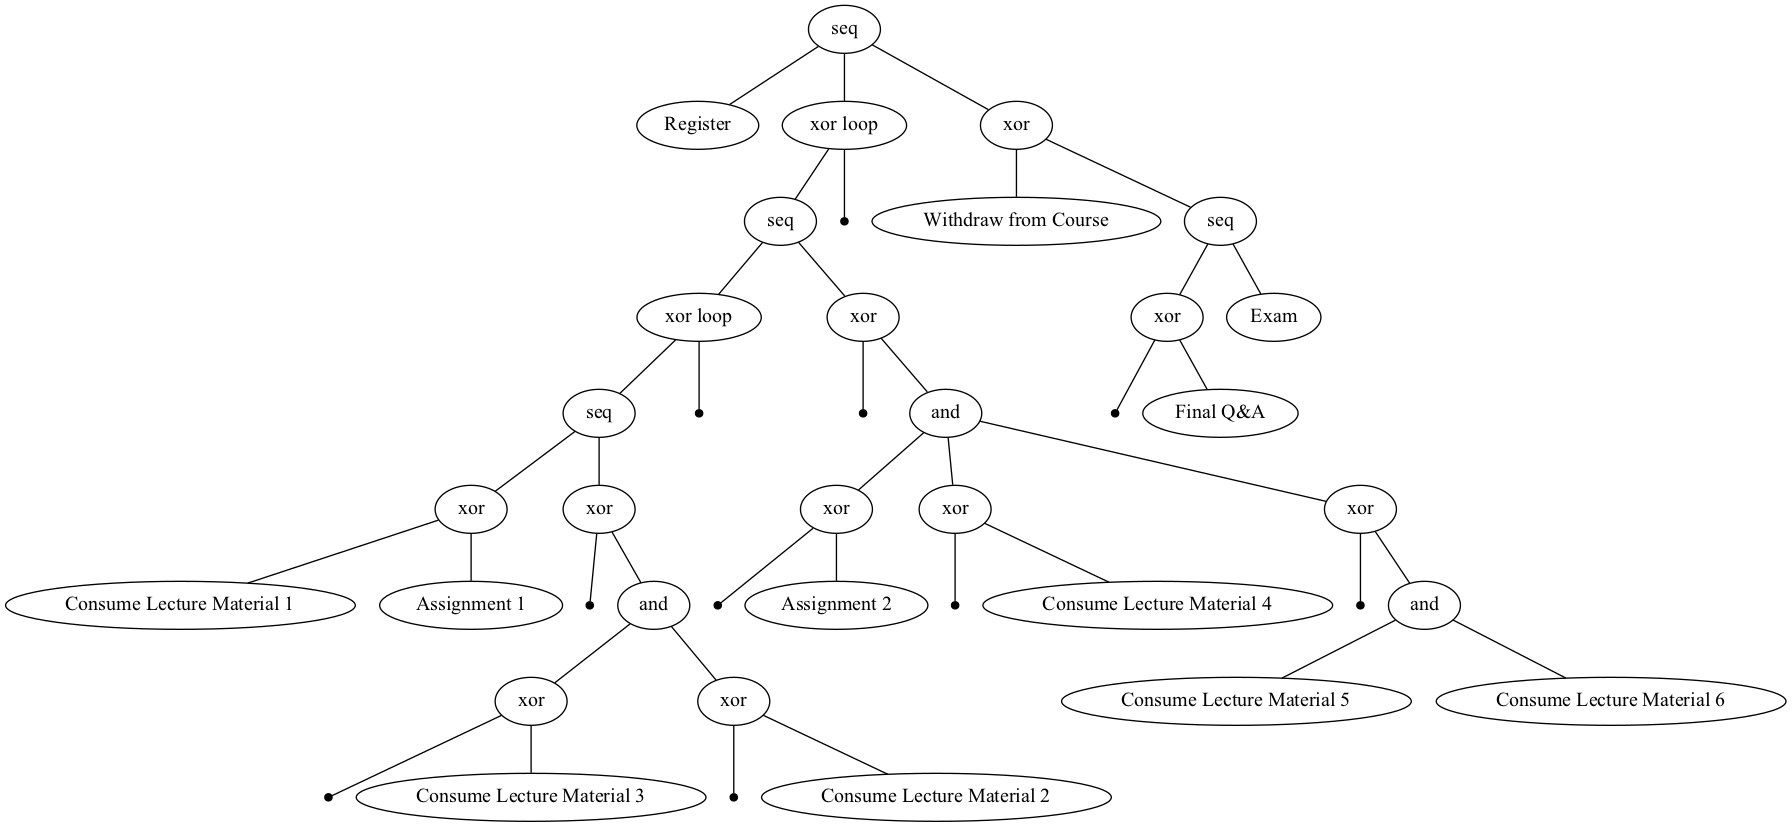

LOG: Variant 0.5
IM threshold 0.2


replaying log with TBR, completed variants ::   0%|          | 0/18 [00:00<?, ?it/s]

{'perc_fit_traces': 76.86196623634558,
 'average_trace_fitness': 0.9803935624172175,
 'log_fitness': 0.9844609736446894,
 'percentage_of_fitting_traces': 76.86196623634558}

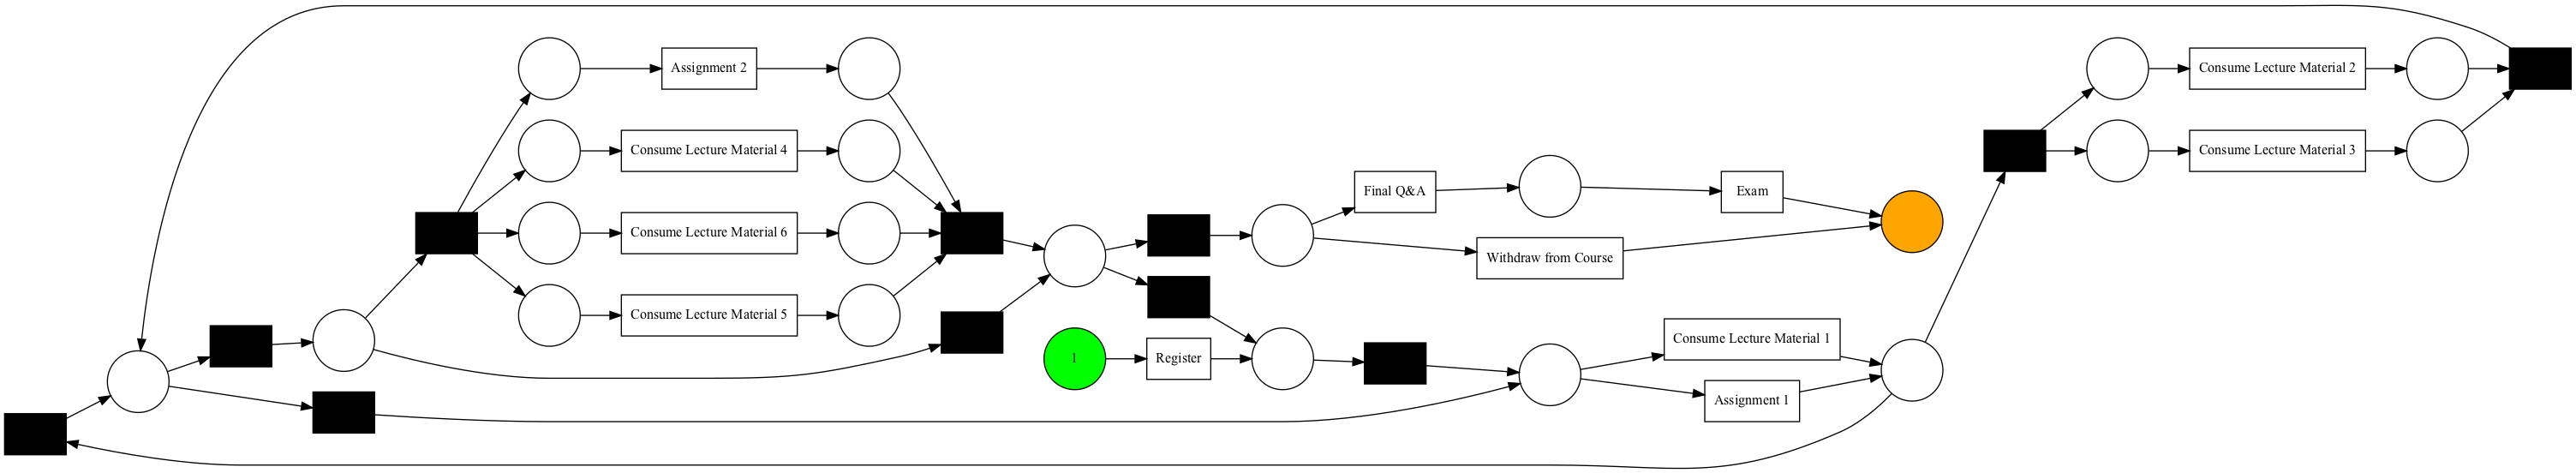

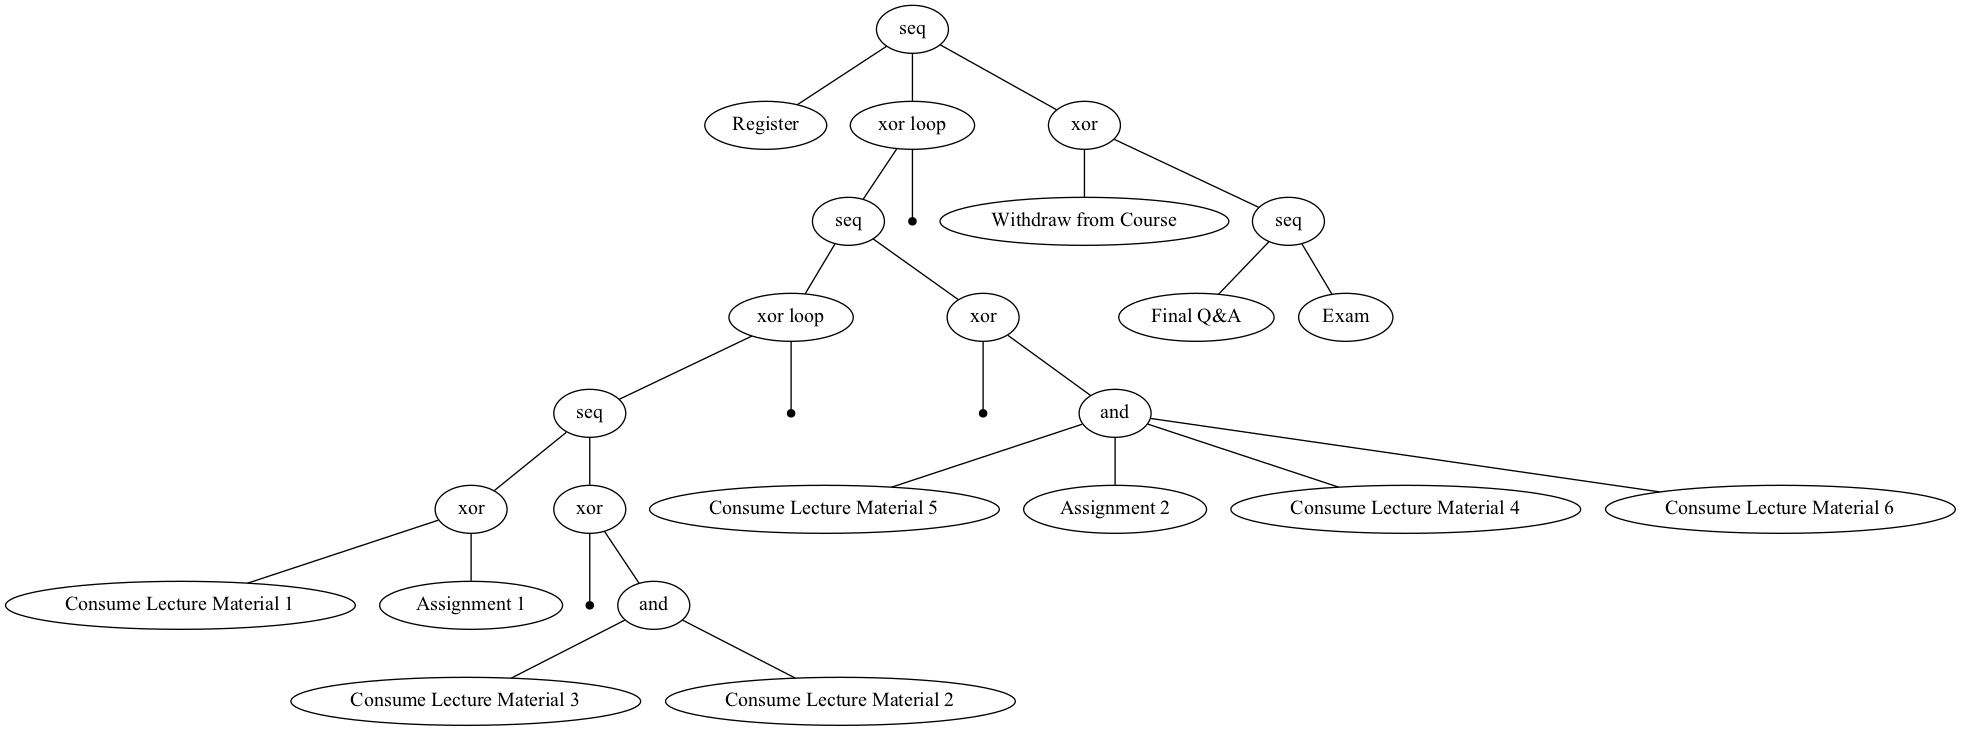

LOG: Exam
IM threshold 0.0


replaying log with TBR, completed variants ::   0%|          | 0/397 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

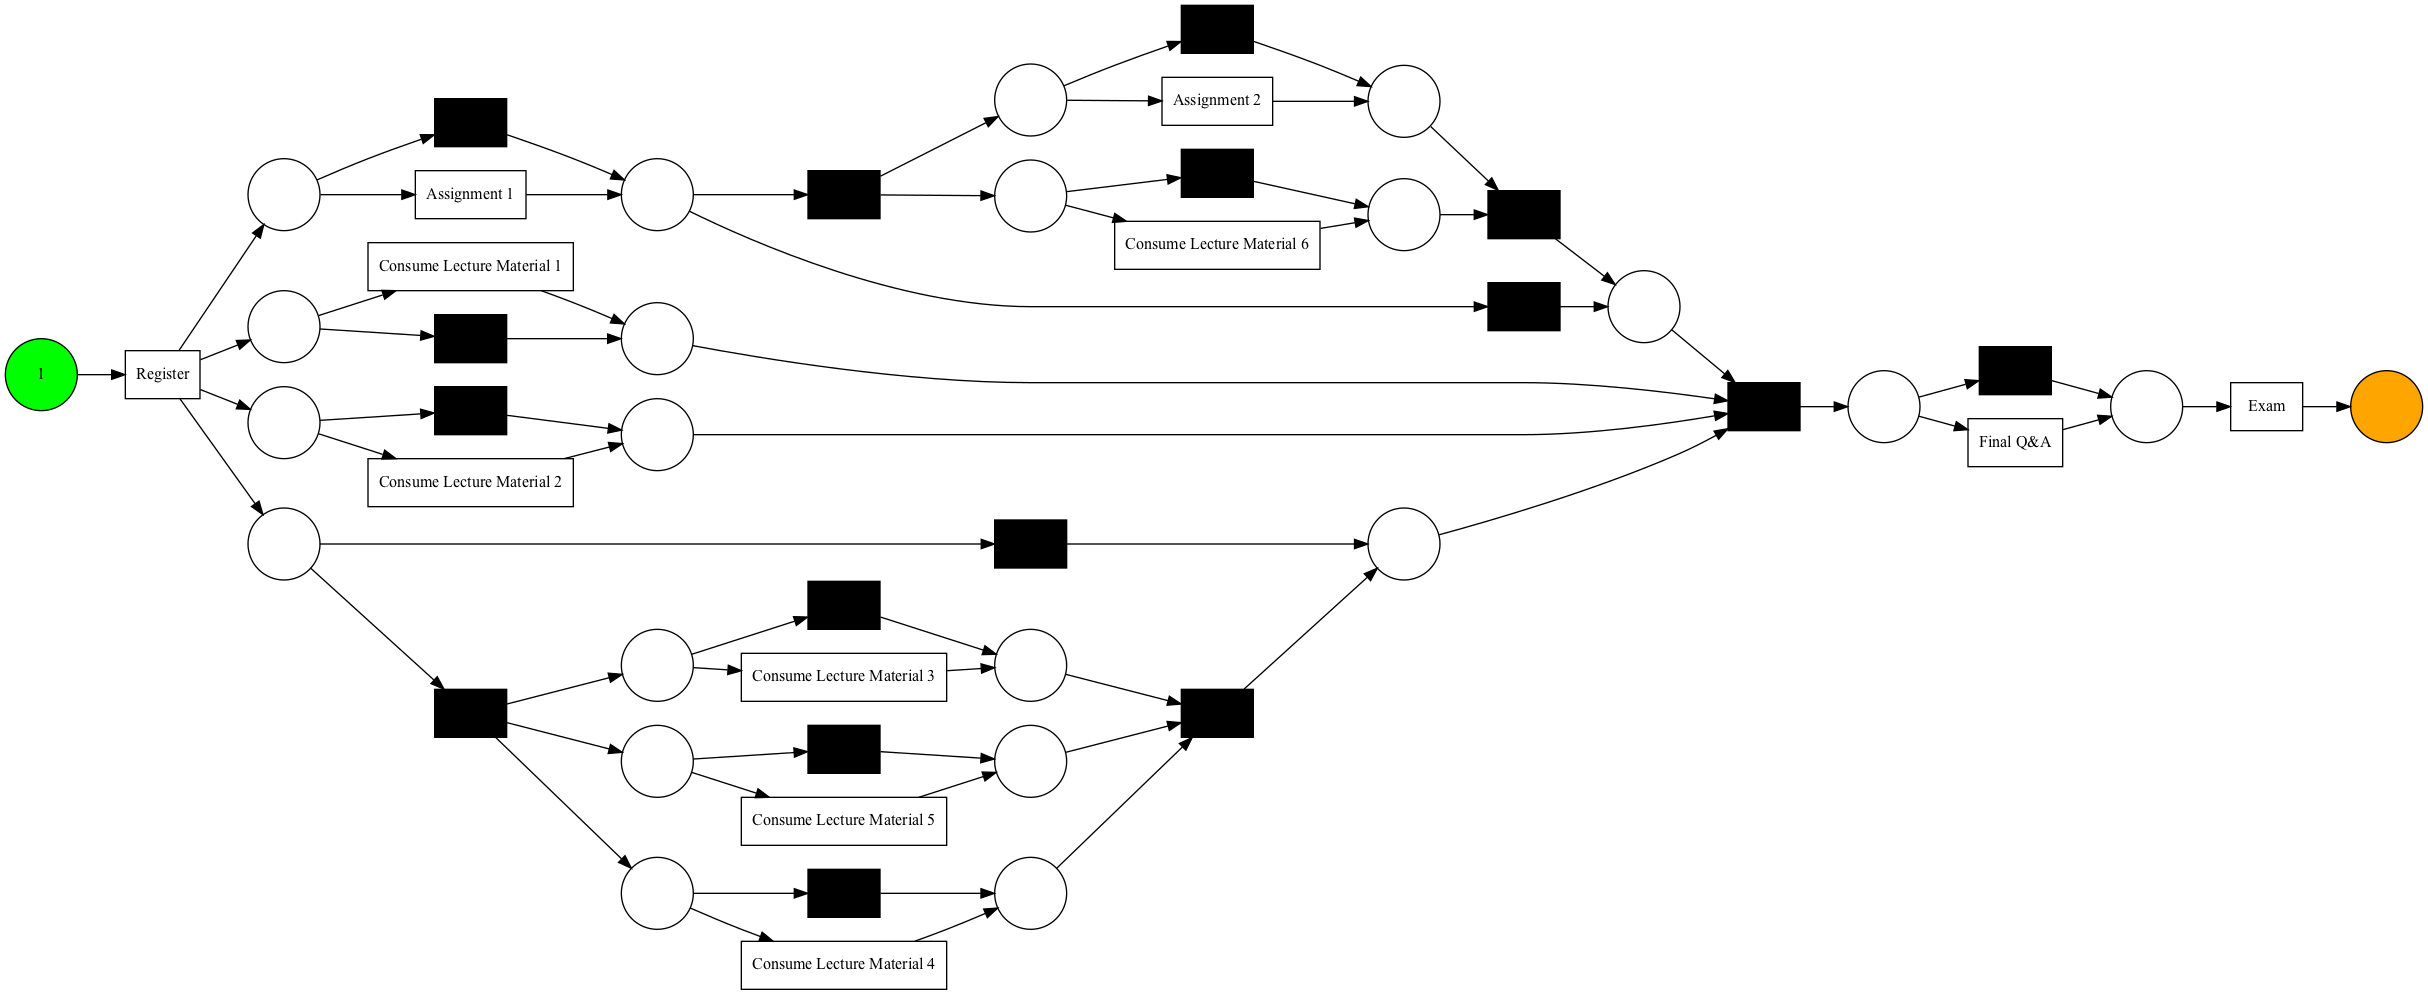

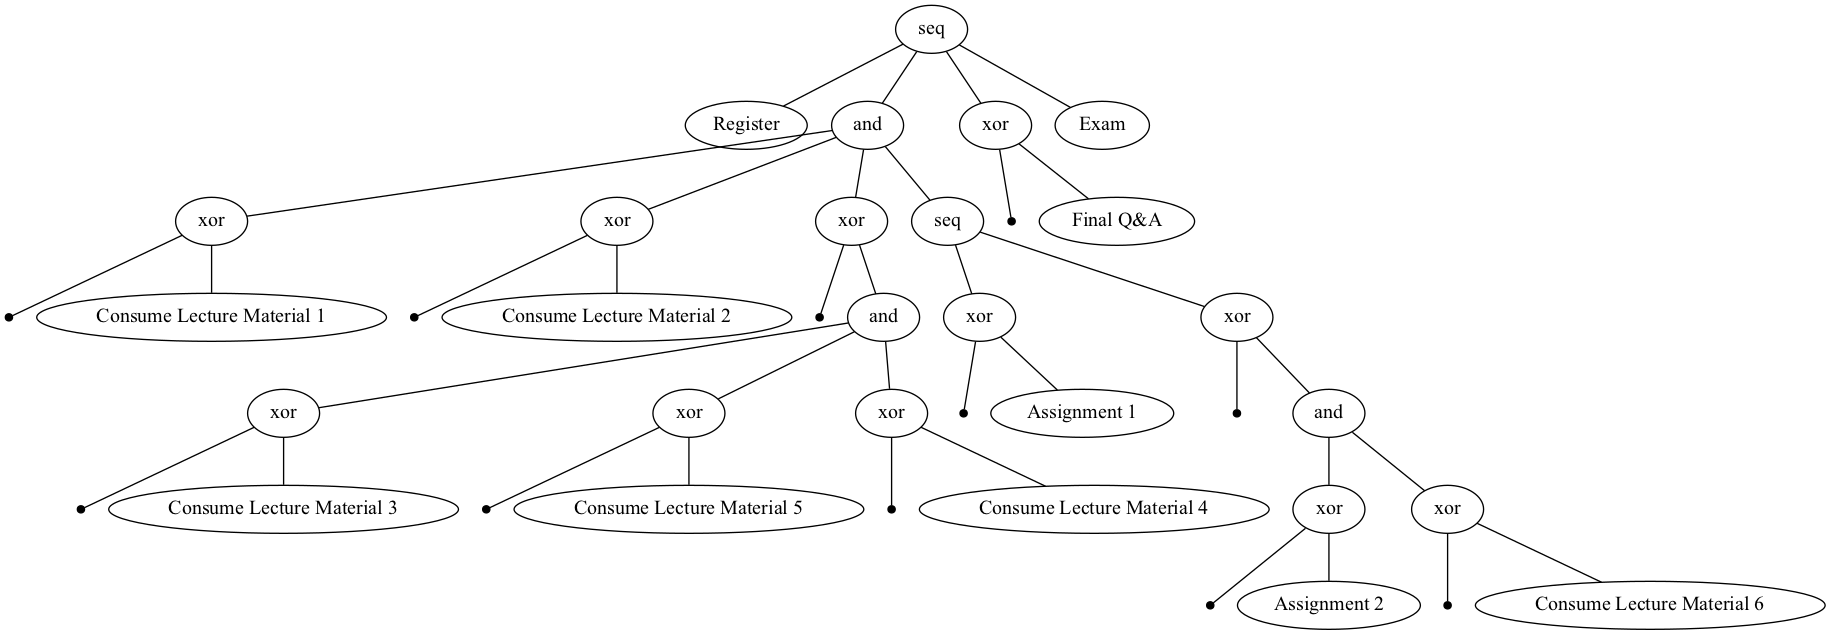

LOG: Exam
IM threshold 0.2


replaying log with TBR, completed variants ::   0%|          | 0/397 [00:00<?, ?it/s]

{'perc_fit_traces': 77.51677852348993,
 'average_trace_fitness': 0.9420329422692011,
 'log_fitness': 0.9557918485072727,
 'percentage_of_fitting_traces': 77.51677852348993}

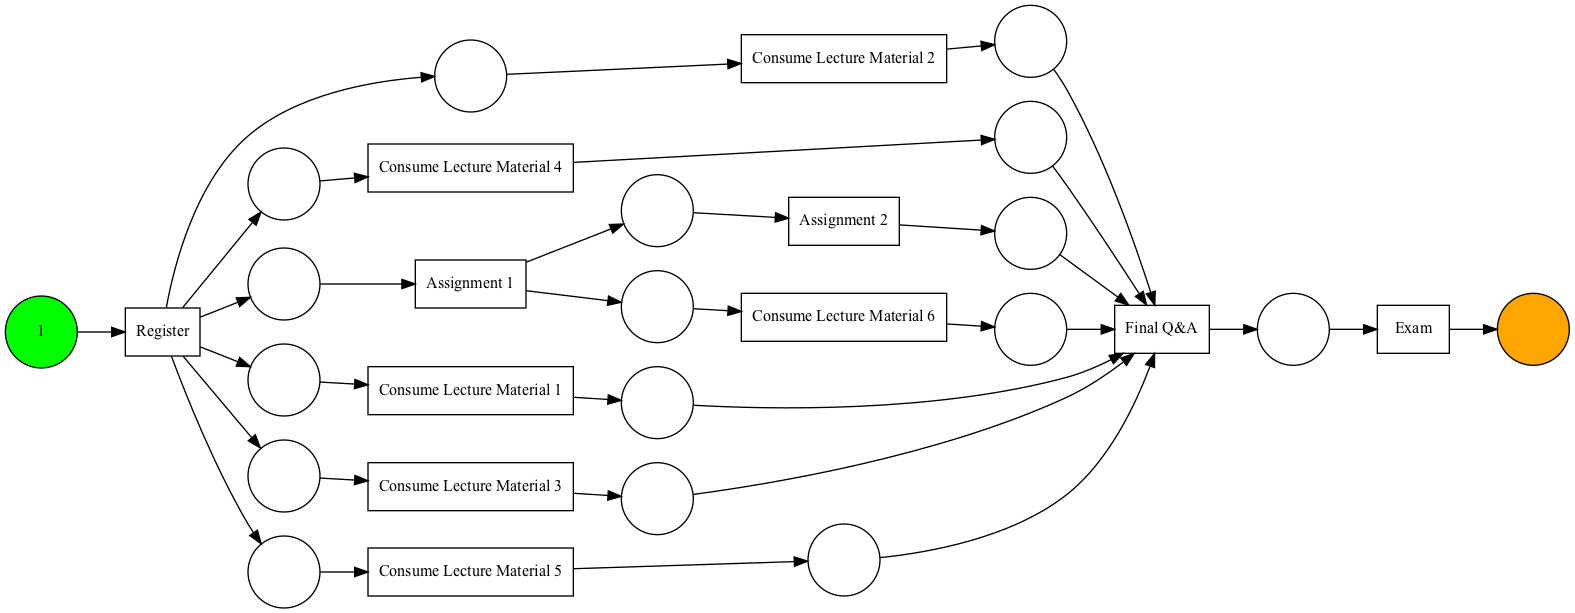

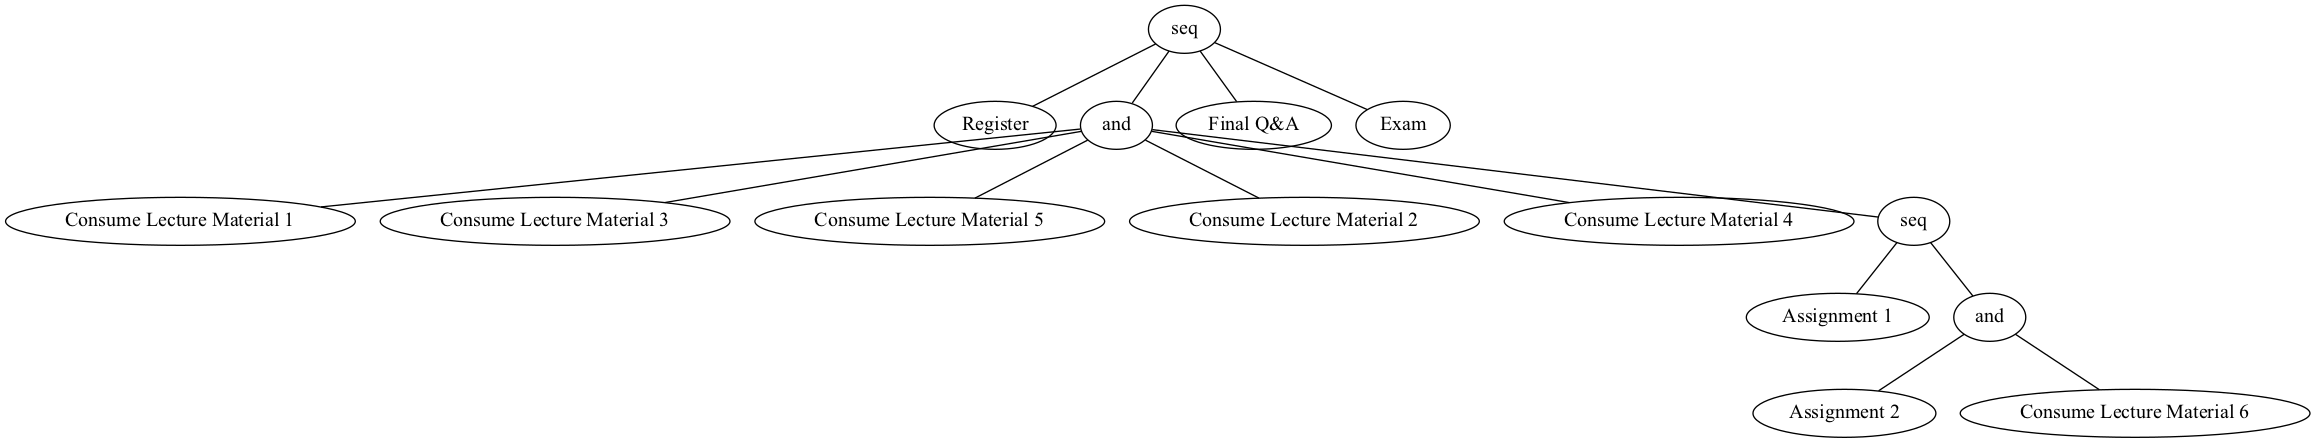

In [254]:
# your code
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

logs = [log, log_variant03, log_variant05, log_exam]
for l in logs:
    if l == log:
        print("LOG: Base")
    if l == log_variant03:
        print("LOG: Variant 0.3")
    if l == log_variant05:
        print("LOG: Variant 0.5")
    if l == log_exam:
        print("LOG: Exam")
    print(f"IM threshold 0.0")
    net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(l, noise_threshold=0.0)
    process_tree = pm4py.discover_process_tree_inductive(l, noise_threshold=0.0)
    fitness = replay_fitness_evaluator.apply(l, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
    display(fitness)

    pm4py.view_petri_net(net, initial_marking, final_marking, format='png') 
    pm4py.view_process_tree(process_tree, format='png') 

    if l == log:
        print("LOG: Base")
    if l == log_variant03:
        print("LOG: Variant 0.3")
    if l == log_variant05:
        print("LOG: Variant 0.5")
    if l == log_exam:
        print("LOG: Exam")
    print(f"IM threshold 0.2")
    net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(l, noise_threshold=0.2)
    process_tree = pm4py.discover_process_tree_inductive(l, noise_threshold=0.2)
    fitness = replay_fitness_evaluator.apply(l, net, initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
    display(fitness)

    pm4py.view_petri_net(net, initial_marking, final_marking, format='png') 
    pm4py.view_process_tree(process_tree, format='png') 


**Fitness of the models**
- base log has perfect fitness for 0.0 noise threshold and 93% fitness for 0.2 noise threshold
- log_variant03 has perfect fitness for both noise thresholds
- log_variant05 has  perfect fitness for 0.0 noise threshold and 98% fitness for 0.2 noise threshold
- log_exam has  perfect fitness for 0.0 noise threshold and 98% fitness for 0.2 noise threshold

**log_variant05 vs log_Base**

Noise Threshold 0:
Log_Base allows for any behavior possible over the course regardless of the order. Similarly, log_variant05 allows such behavior. However, in log_variant05 the material of lectures 4, 5 and 6 can be only consumed after completing assignment 1 or consuming lecture 1. In log_base the lectures can be consumed in any order.

Noise Threshold 0.2:
In this case log_base allows to only take the exam when a student has participated in the final Q&A. Also, the Q&A can only be reached when consuming at least one lecture material or doing both assignments.
Similarly for log_variant05, the exam can only be taken when participating in the Q&A. However, the first action (after registering of course) a student can do is assignment 1 or consume lecture 1. Lectures 4, 5, 6, and assignemnt 2 are again done in parallel.

In conclusion, while in the log_base petri everything can be done in parallel, thus in any order, in log_variant05 there are some restrictions on the order of actions.

**log_variant05 vs log_variant03**

In log_variant03 the petri nets are the same for both noise thresholds. In both cases the petri net is sequential, consuming the lecture material in order, completing assignment 2, attending the Q&A, and taking part in the exam. Notably, a student may not withdraw from the course.

log_variant05 is much more different, where a much more 'chaotic' behavior/order is possible. Most notably, in log_variant05 lectures can be consumed in parallel and can be skipped. Also, students are able to withdraw from the course.

**log_Base vs log_exam**

In both cases, the allowed behavior for log_Base and log_exam are almost identical with the only difference being that students in log_exam either must take the exam and not withdraw from the course or not partake in the exam. This is expected since log_exam is a subset of log_base in which students have taken the exam.


### Paths of Excellence

**g)** As lectures are in a constant urge to improve their courses in a way that participants learn as much as possible ;), you are facing the research question to identify *paths of excellence*.
In particular, you should identify how the studying behavior differs between excellent students (**final exam score greater than or equal to 85**) and non-excellent students (**final exam score less than 85**).
Try to answer this research questions using techniques from the preceding Process Mining questions. 

*Hint: There is no single unique solution (e.g., in terms of parameter choice); therefore, it suffices if your "design choices" are reasonble.* \
*Hint: The final exam score is point score that is associated with the "Exam" event.*


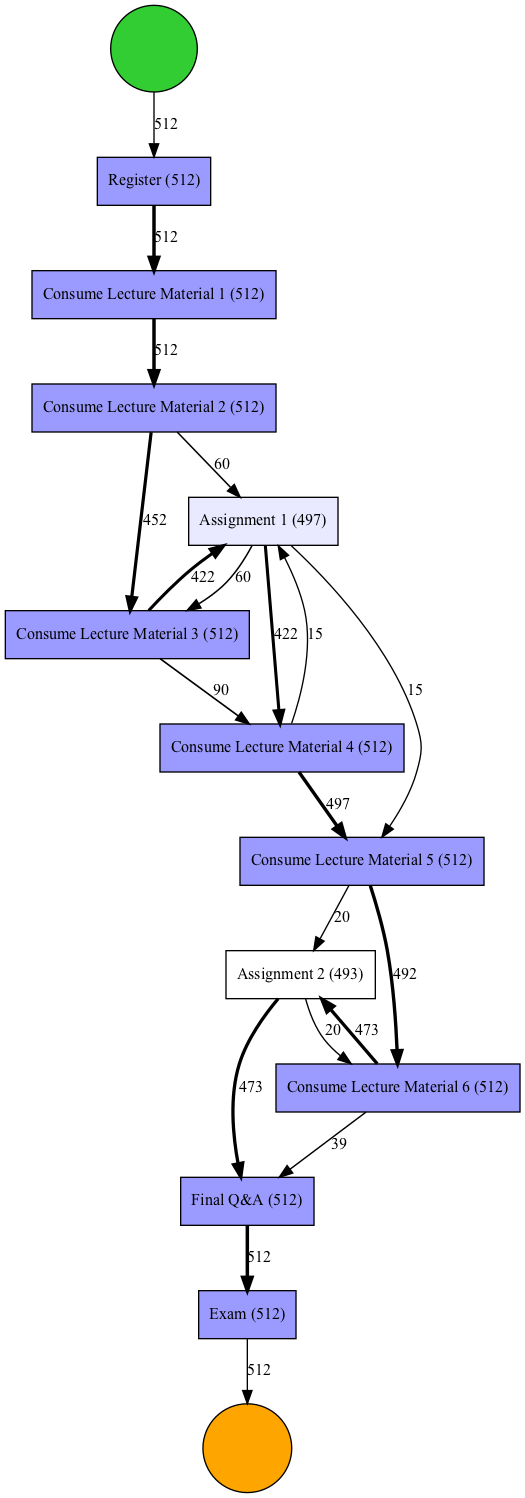

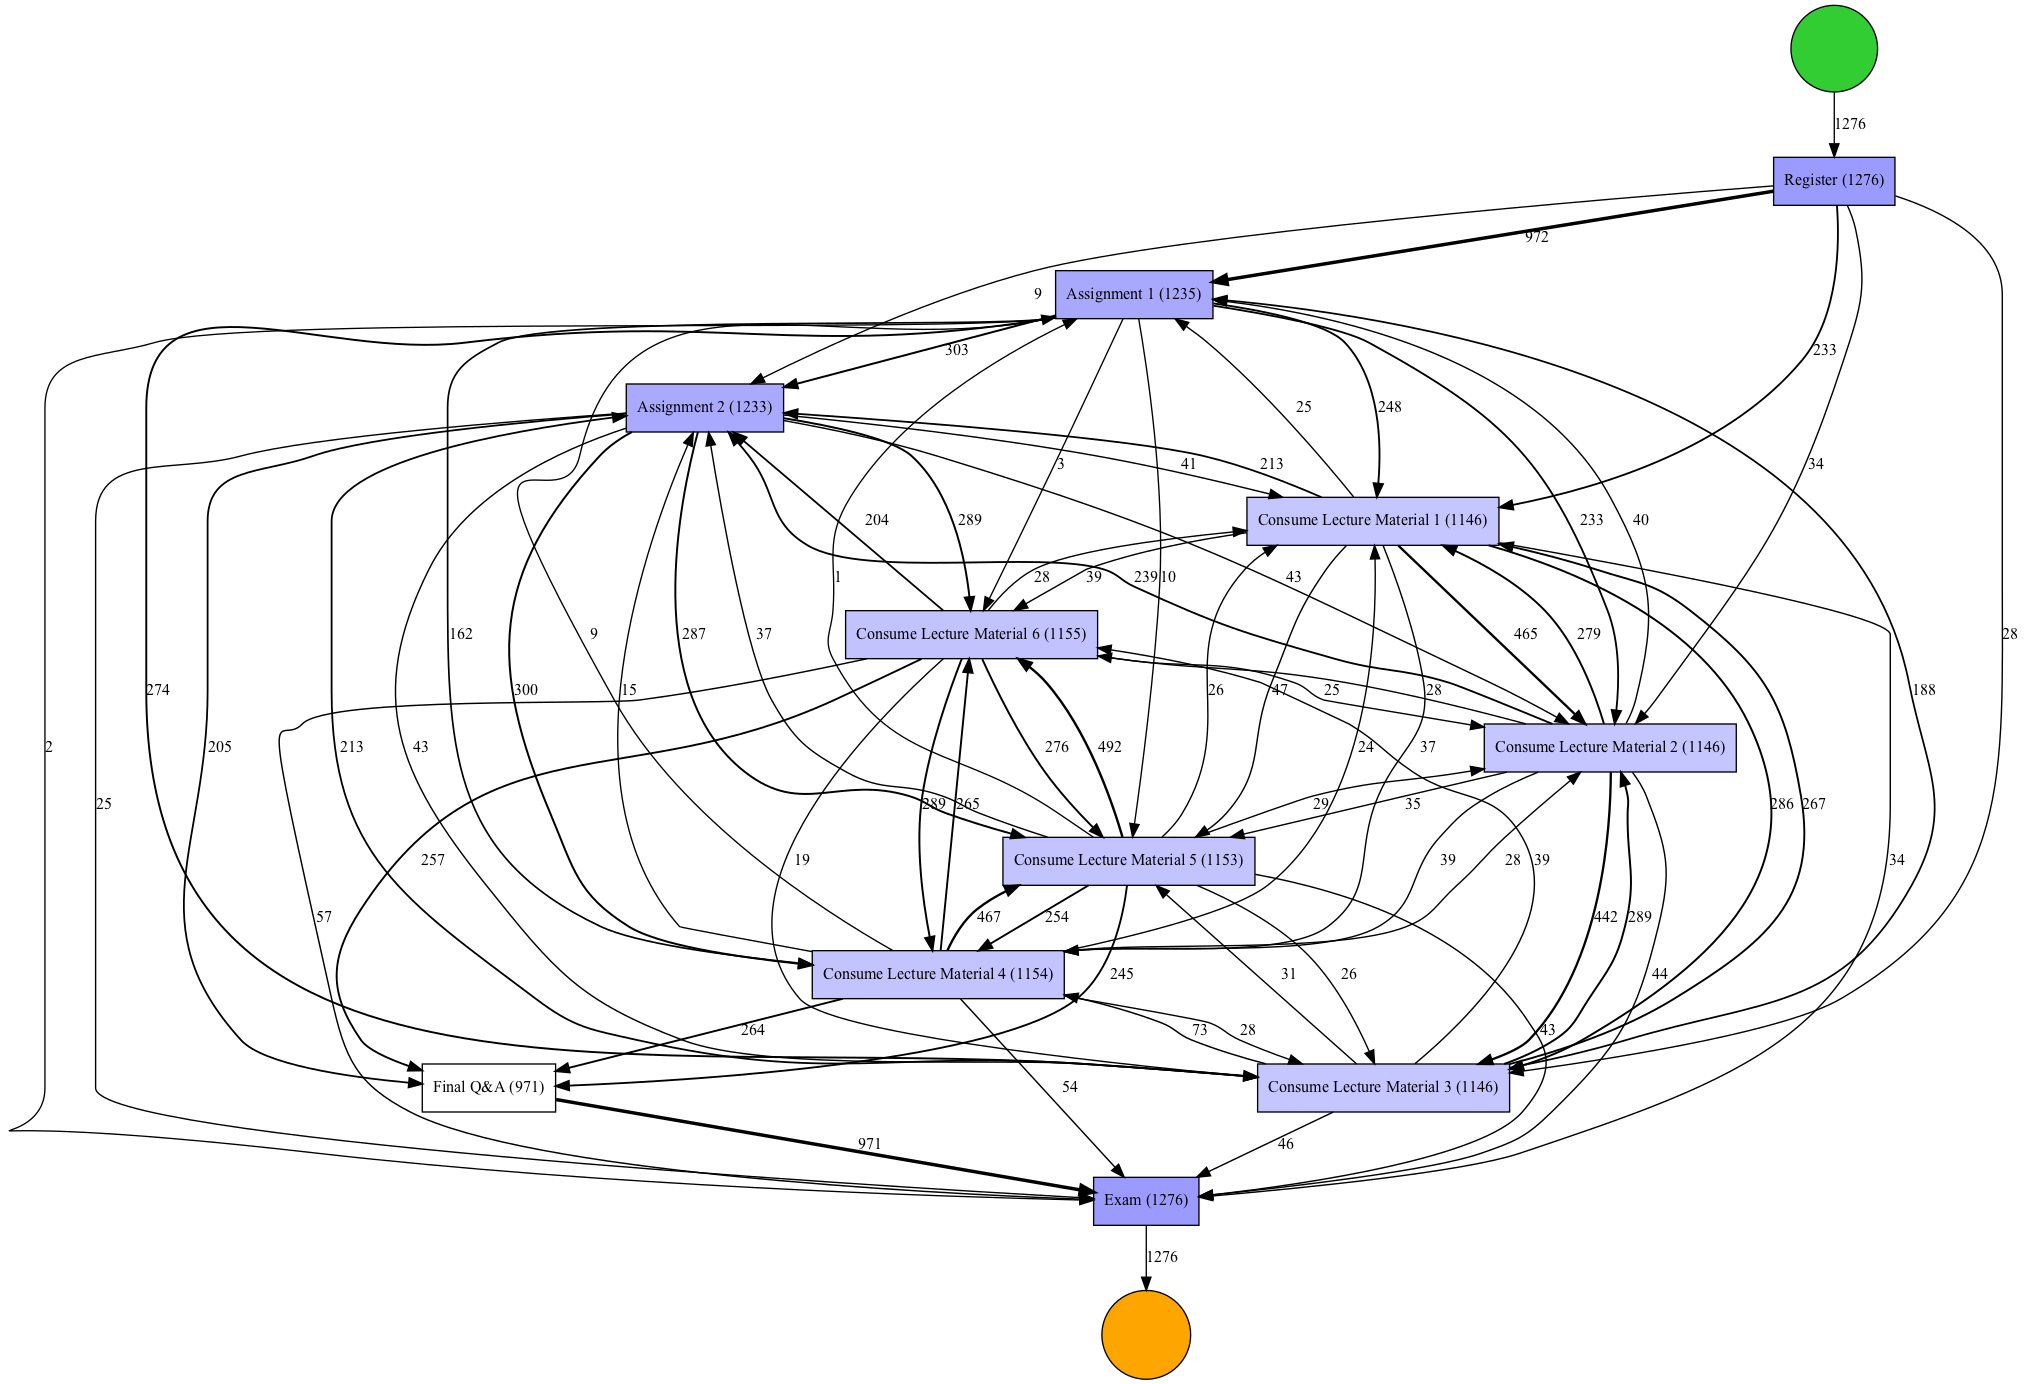

In [261]:
# your code
log_exellence  = attributes_filter.apply_numeric(log, 85, 100,
                                parameters={attributes_filter.Parameters.ATTRIBUTE_KEY: "Points",
                                attributes_filter.Parameters.STREAM_FILTER_KEY1: "concept:name",
                                attributes_filter.Parameters.STREAM_FILTER_VALUE1: "Exam"})
dfg, start_activities, end_activities =  pm4py.discover_directly_follows_graph(log_exellence)
pm4py.view_dfg(dfg, start_activities, end_activities)

log_normal  = attributes_filter.apply_numeric(log, 0, 84,
                                 parameters={attributes_filter.Parameters.ATTRIBUTE_KEY: "Points",
                                 attributes_filter.Parameters.STREAM_FILTER_KEY1: "concept:name",
                                 attributes_filter.Parameters.STREAM_FILTER_VALUE1: "Exam"})
dfg, start_activities, end_activities =  pm4py.discover_directly_follows_graph(log_normal)
pm4py.view_dfg(dfg, start_activities, end_activities)


Excellent Students: 
- all students consumed all lecture material in the correct order before taking the exam and paticipate in the Q&A. 
- not all of the excellence students completed both assignments
- to do well, consume lecture material in order before doing the assignments

Normal students:
- actions taken are a lot less streamlined and 'all over the place'
- doing the first assignment before even consuming lecture material.
- many of the lecture material were not consumed in order. 


## Performance and Frequency Decoration

**h)** While the discovery of a process model is the most prototypical step in a process mining analysis, its enrichment by frequency and performance statistics is a very common step too. To this end, enrich the Petri net that you discovered for log_exam using Inductive Miner with noise threshold 0.2 by frequency and performance information. Plot two Petri nets decorated with frequency and performance information, respectively.

Describe your results. Can you observe any problems (in particular with respect to the initial process description)?

log_exam with frequency statistics


replaying log with TBR, completed variants ::   0%|          | 0/397 [00:00<?, ?it/s]

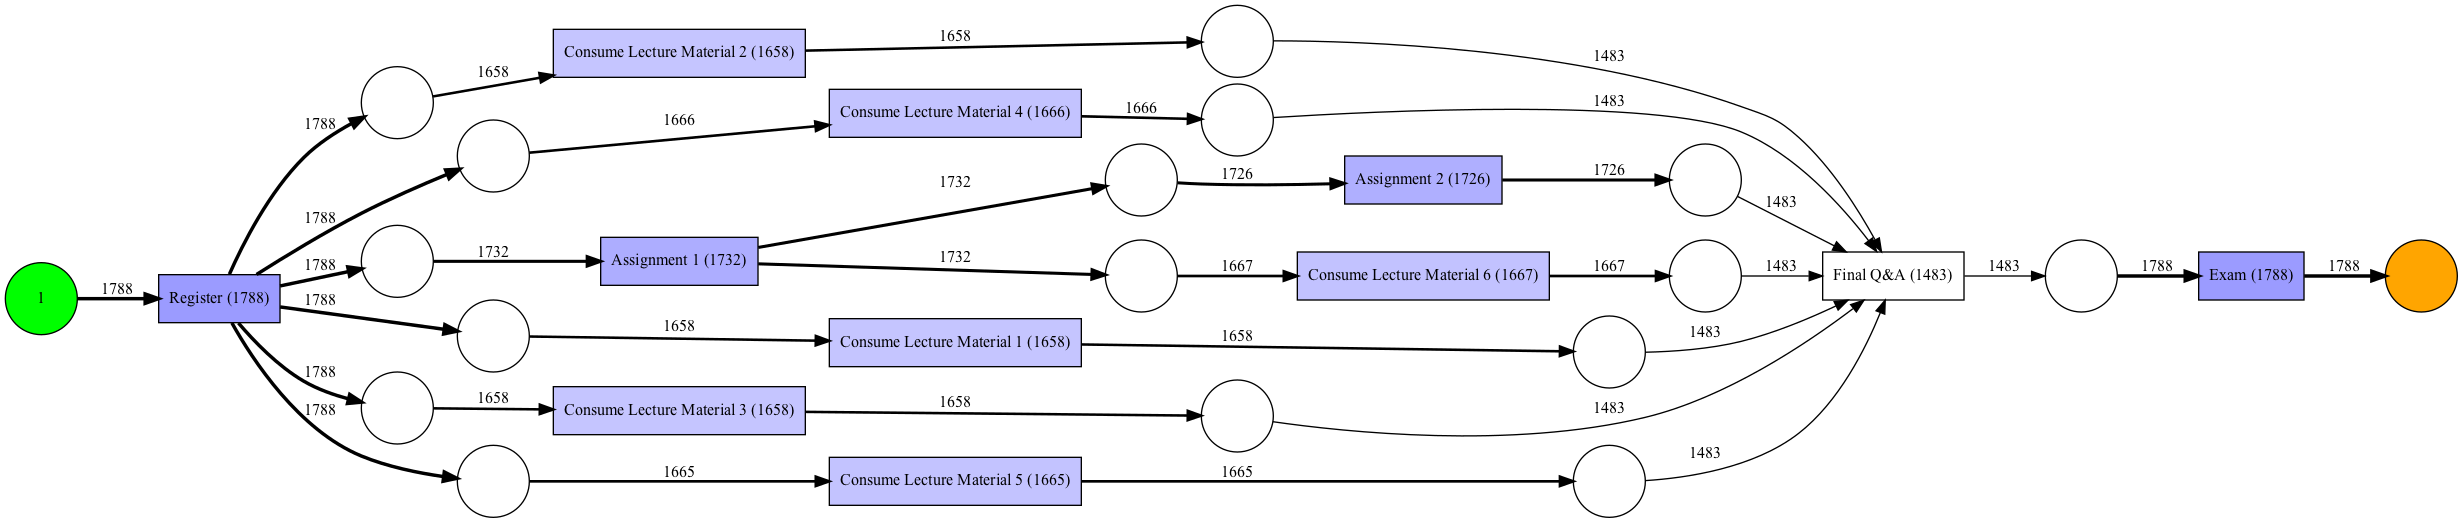

log_exam with performance statistics


replaying log with TBR, completed variants ::   0%|          | 0/397 [00:00<?, ?it/s]

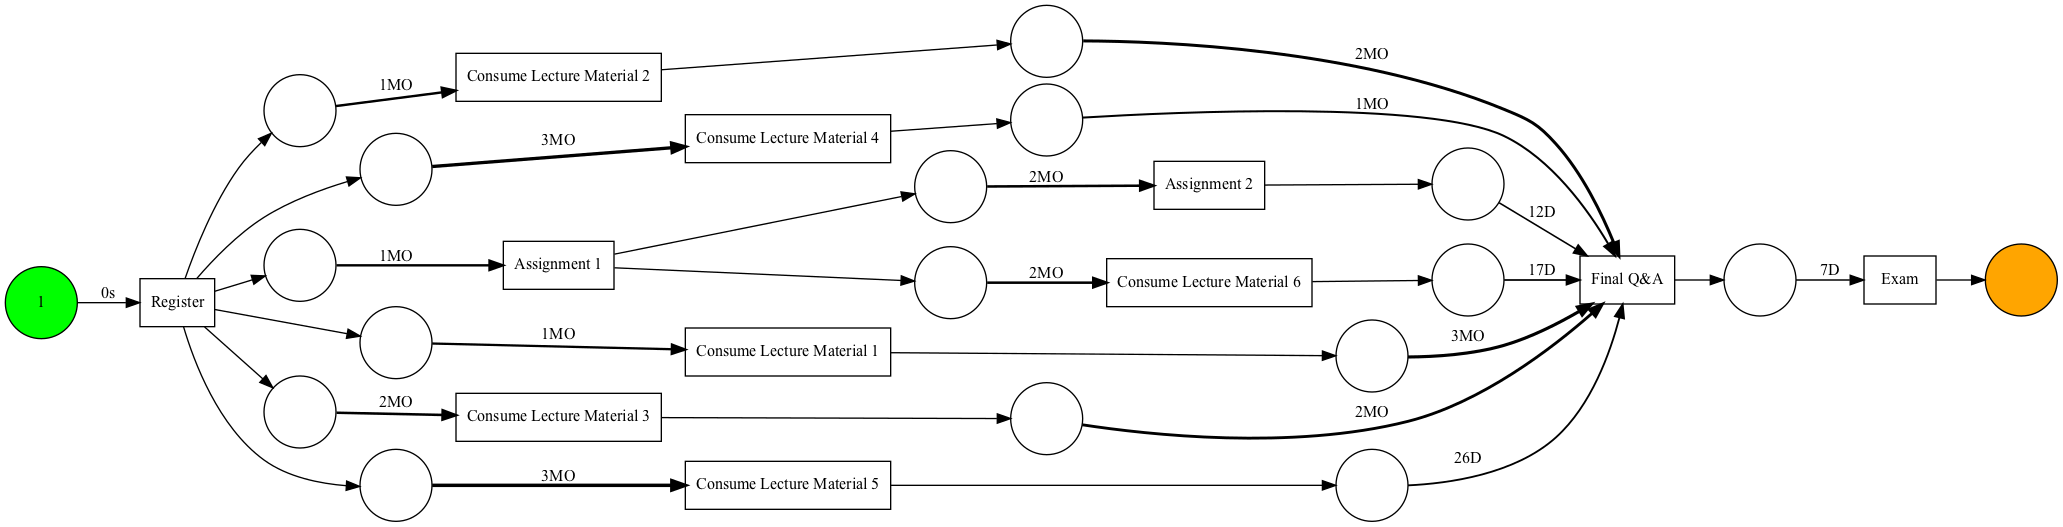

In [256]:
# your code
#Because we did not save the petri net in a specific variable, we calculate it again
#Then, we add the frequency and performance statistics and show the results
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(log_exam, noise_threshold=0.2)

print("log_exam with frequency statistics")
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log_exam)
pn_visualizer.view(gviz)

print("log_exam with performance statistics")
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.PERFORMANCE, log=log_exam)
pn_visualizer.view(gviz)


1. There were 1788 registered in the course and also took the exam. However, only 1726 students completed the mandatory assignments for the exam admission. This behavior of the petri net is explainable by the fact that the only transition leading the end place is 'Exam'. Therefore, all entries entering start place have to exit the environment, which means that student took the exam which did not have the admission, or it is the effect of the lack of a path to "withdraw from course" or "no exam admission".

2. Regarding the performance statistics, no real issues are noticeable. The lecture materials are consumed and the assignments are done in order, and no illegal paths are taken.

## Process Mining Meets Advanced Visualization

### Studying Activity Heatmap

**a)** In this task, we are going to use advanced visualization techniques to create an overview over the course acitivities over time (**log.csv**).
In particular, you shall create a heatmap that shows how often activities occur in a particular week. 
Your heatmap should adhere to the following specification:
- y-axis: Shows the activity labels
- x-axis: Time in terms of course weeks. See the following example snippet:
<div>
<img src="templates/PMAV_HeatmapXAxisSnippet.png" width="100"/>
</div>
- data: The bucket counts should be derived from **log.csv**

Using this configuration, the bucket 2021-11-24 till 2021-12-01 with y-axis label "Exam" and value v would be read as:
In the week between 2021-11-24 and 2021-12-01 v exams took place.

Describe your result. Which patterns do you observe?

Year/Week                   2021/37  2021/38  2021/39  2021/40  2021/41  \
Activity                                                                  
Assignment 1                    NaN      NaN      NaN      NaN      NaN   
Assignment 2                    NaN      NaN      NaN      NaN      NaN   
Consume Lecture Material 1     11.0     32.0     83.0    107.0    157.0   
Consume Lecture Material 2      NaN      3.0      9.0     22.0     54.0   
Consume Lecture Material 3      NaN      NaN      NaN      4.0      2.0   
Consume Lecture Material 4      NaN      NaN      NaN      NaN      NaN   
Consume Lecture Material 5      NaN      NaN      NaN      NaN      NaN   
Consume Lecture Material 6      NaN      NaN      NaN      NaN      NaN   
Exam                            NaN      NaN      NaN      NaN      NaN   
Final Q&A                       NaN      NaN      NaN      NaN      NaN   
Register                      284.0    430.0    426.0    377.0    282.0   
Withdraw from Course            NaN      NaN      NaN      NaN      NaN   

Year/Week                   2021/42  2021/43  2021/44  2021/45  2021/46  ...  \
Activity                                                                 ...   
Assignment 1                    NaN      NaN      NaN      NaN      NaN  ...   
Assignment 2                    NaN      NaN      NaN      NaN      NaN  ...   
Consume Lecture Material 1    199.0    173.0     13.0      NaN      NaN  ...   
Consume Lecture Material 2     89.0    160.0    219.0    202.0     17.0  ...   
Consume Lecture Material 3     17.0     44.0     94.0    155.0    192.0  ...   
Consume Lecture Material 4      NaN      NaN      NaN      NaN      NaN  ...   
Consume Lecture Material 5      NaN      NaN      NaN      NaN      NaN  ...   
Consume Lecture Material 6      NaN      NaN      NaN      NaN      NaN  ...   
Exam                            NaN      NaN      NaN      NaN      NaN  ...   
Final Q&A                       NaN      NaN      NaN      NaN      NaN  ...   
Register                       34.0     31.0     24.0     33.0     28.0  ...   
Withdraw from Course            NaN      NaN      NaN      NaN     31.0  ...   

Year/Week                   2021/51  2021/52  2022/1  2022/2  2022/3  2022/4  \
Activity                                                                       
Assignment 1                    NaN      NaN     NaN     NaN     NaN     NaN   
Assignment 2                    NaN      NaN     NaN     NaN     NaN   760.0   
Consume Lecture Material 1      NaN      NaN     NaN     NaN     NaN     NaN   
Consume Lecture Material 2      NaN      NaN     NaN     NaN     NaN     NaN   
Consume Lecture Material 3      NaN      NaN     NaN     NaN     NaN     NaN   
Consume Lecture Material 4      NaN      NaN     NaN     NaN     NaN     NaN   
Consume Lecture Material 5    146.0     88.0   124.0   121.0     NaN     NaN   
Consume Lecture Material 6     43.0     36.0   101.0   137.0   146.0   177.0   
Exam                            NaN      NaN     NaN     NaN     NaN     NaN   
Final Q&A                       NaN      NaN     NaN     NaN     NaN     NaN   
Register                        NaN      NaN     NaN     NaN     NaN     NaN   
Withdraw from Course            NaN      NaN     NaN     NaN     NaN    98.0   

Year/Week                   2022/5  2022/52  2022/6  2022/7  
Activity                                                     
Assignment 1                   NaN      NaN     NaN     NaN  
Assignment 2                1013.0      NaN     NaN     NaN  
Consume Lecture Material 1     NaN      NaN     NaN   186.0  
Consume Lecture Material 2     NaN      NaN     NaN   188.0  
Consume Lecture Material 3     NaN      NaN     NaN   182.0  
Consume Lecture Material 4   687.0      NaN    89.0   194.0  
Consume Lecture Material 5   689.0     42.0    87.0   192.0  
Consume Lecture Material 6   726.0     17.0    82.0   194.0  
Exam                           NaN      NaN     NaN  1788.0  
Final Q&A                

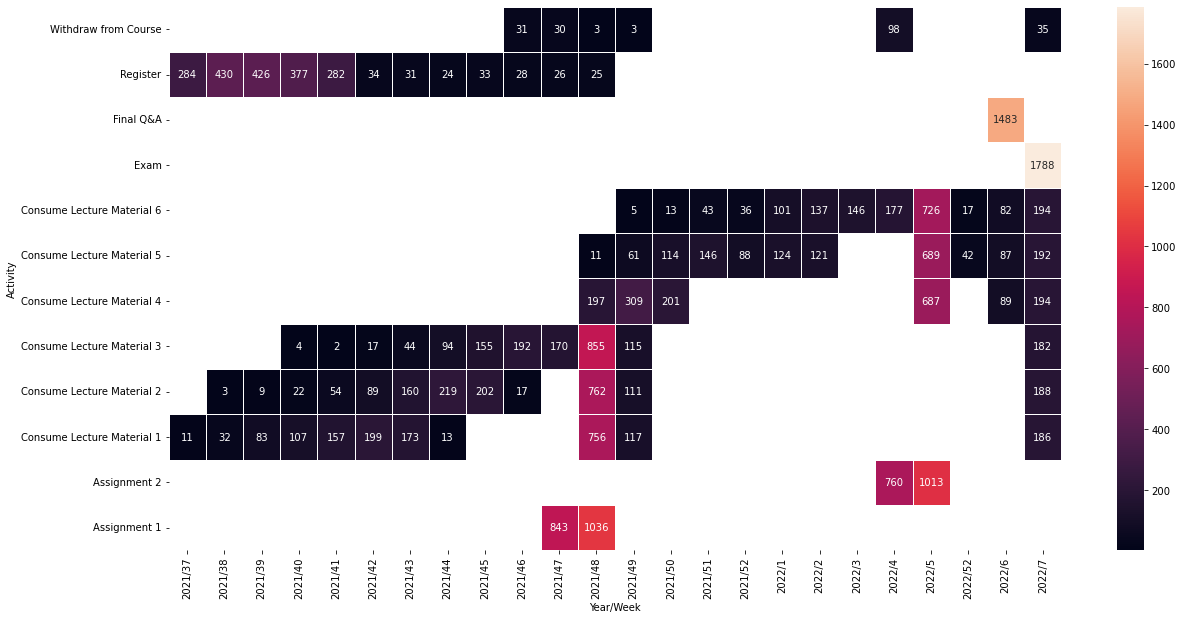

In [257]:
# your code
import datetime
df = pd.read_csv('./dataset/log.csv')
df = df[['Activity', 'Timestamp']]
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year/Week'] = df['Timestamp'].apply(lambda x: "%d/%d" % (x.year, x.week))

count = df.groupby(['Year/Week', 'Activity'], as_index=False).size()
df = count.pivot_table(values='size', index='Activity', columns='Year/Week')

display(df)

# plot the heatmap
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df, annot=True, fmt='.0f', linewidths=.5, ax=ax)
ax.invert_yaxis()


*Your markdown for your discussion.*

**b)** Can you relate the patterns that you observe in the heatmap to the process models that you discovered in question **Q5 - f)**?

*Hint: In contrast to the other questions, this question is deliberately less explicit. You may approach it having the following question in mind: \
Is there a pattern in the heatmap that explains why a certain process model shows a certain behavior/control flow?*

1. Registration for the course is done over several weeks, with the most students registering in the first 4. 
2. For lecture viewing, some students consumed the content over few weeks before assignment 1 was due, however most students consumed lecture material 1, 2, 3 and did assignment 2 in week 48 of 2021. Between assignment 1 and 2 the number of students who consumed lecture material dropped again, then peaked again in week 5 of 2022 where assignment 2 was due.
3. In the week before the exam many, but not all, students took part in the final Q&A. 
4. In the week of the exam ~180 students consumed all the lecture material for exam preparation.
5. Most of students who withdrawn from the course did so in the weeks where assignments where due and in the week of the exam.
6. All 1788 students took the exam in the same week, which is to be expected.

### Process Flow

**c)** Assume that another process analyst also had access to the event log. 
Given the data, he created the following novel entities:
- 'Block 1 Complete': The participant downloaded the entire material of the first lecture block (materials 1, 2, and 3). (Not considering when he downloaded it)
- 'Block 1 Incomplete': The participant did not download the entire material of the first lecture block
- 'Block 2 Complete': See 'Block 1 Complete'
- 'Block 2 Incomplete': See 'Block 1 Incomplete'
- 'Ass 1 Excellent': Participant scored at least 85 points in the first part of the assignment
- 'Ass 1 Not Excellent': Participant scored less than 85 points in the part of the assignment
- 'Ass 2 Not Excellent', 'Ass 2 Excellent', 'Exam Not Excellent', 'Exam Excellent': Similar to 'Ass 1 Excellent' and 'Ass 1 Not Excellent'
- 'Withdraw': Participant dropped the course

Based on the entities he derived a set of flow, for example, the flow between 'Block 1 Complete' and 'Ass 1 Excellent' describes how often a partipant who consumed the first lecture block scored excellent in the first part of the assignment.

The next cell loads the entities and flows for you. The flows are stored as a dictionary following the pattern:

    (source, target): flow_value
    
where source and target are indices into the entities list.

Create a **Sankey diagram** that visulizes these flows. Please use `plotly.graph_object.Sankey` to create the diagram.

Briefly **describe** your results.
Moreover, **discuss** this visualization considering your knowlege from the Process Mining task.

*Hint: Having a look at the Sankey diagram will make the analyst's idea behind the entities much clearer.*

In [259]:
with open('./dataset/sankeyEntities.pkl', 'rb') as f:
    entities = pickle.load(f)
with open('./dataset/sankeyFlows.pkl', 'rb') as f:
    flows = pickle.load(f)

In [260]:
# your code
import plotly.graph_objects as go

keys = list(flows.keys())
values = list(flows.values())
values = values[:-9]
keys = keys[:-9]
sources = []
targets = []
for k in keys:
    sources.append(k[0])
    targets.append(k[1])
entities = list(entities)

# create and print the diagram
fig = go.Figure(data=[go.Sankey(
        node= dict(
        pad = 50,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = entities,
        color = "blue"  
        ),
    link= dict(
        source = sources,
        target = targets,
        value = values,
    )
)])

fig.show()

We can see in the Sankey diagram that most students who registered in the course also completed block 1. Of those students who completed block 1 ~28% completed the first assignment with an excellent score. The majority (1150 students) completed the assignment with a normal score and 64 students withdrew from the course because of low scores on Assignment 1. From the 142 students who did not complete block 1, no one completed assignment 1 with an excellent score. 

All students who completed assignment 1 with an excellent score all completed Block 2, except for 2. The students with a normal score in assignment 2 mostly completed Block 2, except for ~11% who did not complete block 2. 99 students with a normal score withdrawn from the course.

All students who completed block 2 also completed assignment 2, where ~33% students achieved an excellent score. The 143 students who did not complete Block 2 all had a non-excellent score in assignment 2. 

Students who had an excellent score in assignment 2 all completed the exam and the majority of those students (73%) also achieved an excellent score in the exam. From the students who had a normal score in assignment 2 the majority also had a non-excellent score in the exam.

These results agree with the ones we got from process mining. In the petri graph for students with an excellent score, we could see that those students took a highly sequential path through the lecture and course materials. What we could not see in the process mining results was that the students with excellent exam score also had a high probability of excellent assignments. However, it is quite reasonable that an excellent assignment score, which imply a good understanding of the course material, leads to an excellent score in the exam.

# Question 6 - Big Data (15 points) 

### Problem Description
You are working at a finance company that makes loans to individuals and businesses. As a process analyst in *business intelligence team*, you are expected to deliver data-driven insights to improve business processes of the company. Recently, your boss asked you to discover a comprehensive process model of 10 international branches using your big data skills. Your colleague already tried it using commercial on-premise tools, but, due to the immense size of the data, he didn't manage to even load the data to the tool. You are planning to 1) load the datasets from 10 different branches to Hadoop Distributed File System (HDFS), 2) preprocess them using HDFS, and 3) use MapReduce programming model to discover a comprehensive process model. 

### Preparation
The preparation of this problem consists of two steps:

**Preparation step 1**: Replace the filepath to your own filepath to produce the **LoanApplication.csv**.  

In [263]:
import pandas as pd
#your filepath
filepath = "./dataset/LoanApplication.csv"
original_log = pd.read_csv(filepath,sep=",")
original_log.head()

eventID                  CaseID                Activity  Timestamp  \
0   661035  Application_1000086665    A_Create Application   18601566   
1   661036  Application_1000086665             A_Submitted   18601566   
2   661040  Application_1000086665               A_Concept   18601632   
3   661041  Application_1000086665  W_Complete application   18679694   
4   661043  Application_1000086665              A_Accepted   18767152   

                 LoanGoal ApplicationType  RequestedAmount       Action  \
0  Other, see explanation      New credit           5000.0      Created   
1  Other, see explanation      New credit           5000.0  statechange   
2  Other, see explanation      New credit           5000.0  statechange   
3  Other, see explanation      New credit           5000.0     Obtained   
4  Other, see explanation      New credit           5000.0  statechange   

   FirstWithdrawalAmount Accepted  NumberOfTerms OfferID org:resource  \
0                    NaN      NaN            NaN     NaN       User_1   
1                    NaN      NaN            NaN     NaN       User_1   
2                    NaN      NaN            NaN     NaN       User_1   
3                    NaN      NaN            NaN     NaN      User_14   
4                    NaN      NaN            NaN     NaN       User_5   

   MonthlyCost  EventOrigin                 EventID Selected  CreditScore  \
0          NaN  Application  Application_1000086665      NaN          NaN   
1          NaN  Application     ApplState_161925113      NaN          NaN   
2          NaN  Application     ApplState_385184570      NaN          NaN   
3          NaN     Workflow      Workitem_518019192      NaN          NaN   
4          NaN  Application     ApplState_856156982      NaN          NaN   

   OfferedAmount  Duration  
0            NaN         0  
1            NaN         0  
2            NaN         0  
3            NaN         0  
4            NaN         0

**Preparation step 2**: In this question, we generate 10 event logs based on the ``original_log``. For randomization, you need to use the sum of the group's matriculation numbers (e.g., a group with 3 students having "100000", "100001", and "100002" as their matriculation numbers will use "300003" for the randomization).

In [264]:
# Below are GIVEN utility functions (do not modify):
import random
import os
def _ramdomize(x):
    random_val = random.randint(5,10)
    return x+random_val

def _randomize_log(log,matriculation_num):
    """Randomize case attributes based on the matriculation number

    Keyword arguments:
    log -- event log
    matriculation_num - sum of matriculation numbers
    """
    attribute_cols = ["Duration"]
    random.seed(matriculation_num)
    for attr in attribute_cols:
        log[attr] = log[attr].apply(_ramdomize)
    return log

def _extract_log(log,iter_num):
    """Extract n-th log to ./generated_logs/

    Keyword arguments:
    log -- event log
    iter_num -- n-th iteration
    """
    log.to_csv("./generated_logs/generated_log-{}.tsv".format(iter_num),header=False,index=False, sep="\t",line_terminator="")

def generate_log(original_log,num_replication,mat_num):
    """Generate logs (randomized by the matriculation number and extracted to ./generated_logs/) 

    Keyword arguments:
    log -- event log
    num_replication -- number of generated logs
    mat_num -- sum of matriculation numbers
    """
    case_col="CaseID"
    timestamp_col = "Timestamp"
    dir_path = "./generated_logs"
    try:
        os.mkdir(dir_path)
    except OSError:
        print ("Directory already exists: %s" % dir_path)
    else:
        print ("Successfully created the directory %s " % dir_path)
    
    for i in range(num_replication):
        print("starts {}".format(i))
        generated_log = original_log.copy(deep=True)
        generated_log[case_col] = str(i) + generated_log[case_col]
        generated_log[timestamp_col] = generated_log[timestamp_col].apply(str).str.zfill(10)
        randomized_log = _randomize_log(generated_log,mat_num)
        _extract_log(randomized_log,i)
        print ("Successfully created %i th log at %s "% (i,dir_path))

Replace the SUM_MAT_NUM to yours to generate logs.

In [265]:
# your code
SUM_MAT_NUM = 416070+432884 
NUM_REPITITION=10
generate_log(original_log,NUM_REPITITION,SUM_MAT_NUM)

Successfully created the directory ./generated_logs 
starts 0
Successfully created 0 th log at ./generated_logs 
starts 1
Successfully created 1 th log at ./generated_logs 
starts 2
Successfully created 2 th log at ./generated_logs 
starts 3
Successfully created 3 th log at ./generated_logs 
starts 4
Successfully created 4 th log at ./generated_logs 
starts 5
Successfully created 5 th log at ./generated_logs 
starts 6
Successfully created 6 th log at ./generated_logs 
starts 7
Successfully created 7 th log at ./generated_logs 
starts 8
Successfully created 8 th log at ./generated_logs 
starts 9
Successfully created 9 th log at ./generated_logs 


In [266]:
display(SUM_MAT_NUM)

848954

### 6.1. Hadoop Distributed File System (HDFS)

Now, it's time to work with the Hadoop Distributed File System (HDFS). The goal of this task is to merge 10 event logs at your disk using HDFS. Follow the instructions below and show your results in each step (screenshots of the command line). We use "letter identifier" for this task (The letter identifier is the string consisting of the first letters of the group memebers' first names, e.g., for the group with "Antonio Rüdiger", "Bernd Leno", "Christian Günter", the indentifier is "ABC").

    1) Import the event logs to your Docker engine (at /usr/local/hadoop/(identifier)-generated-logs/).
    2) Upload the event logs to the running HDFS (at /input/(identifier)-generated-logs/). 
    3) Merge all the files and copy the result back to HDFS (at /input/(identifier)-final-log-10.tsv).
    4) Merge 6 files (you can randomly select) and copy the result back to HDFS (at /input/(identifier)-final-log-6.tsv).
    5) Merge 2 files (you can randomly select) and copy the result back to HDFS (at /input/(identifier)-final-log-2.tsv).
    6) Print out the completely-merged event log from 3), i.e., "(identifier)-final-log-10.tsv", in the command line (the screenshot may contain 10 rows).

In [ ]:
#your code
from IPython.display import Image
# Image(filename='your_path_to_screenshot_of_a1')

In [ ]:
#your code
#Image(filename='your_path_to_screenshot_of_a2') 

In [ ]:
#your code
#Image(filename='your_path_to_screenshot_of_a3') 

In [ ]:
#your code
#Image(filename='your_path_to_screenshot_of_a4') 

### 6.2. Process Discovery

Discover a process model from the completely merged event log using MapReduce algorithms. Explain how you discover the process model with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce computation (as text file)
    4) Jupyter notebook script that visualize (1) a directly-follows graph and (2) a Petri net  based on the computed directly-follows relations.

<font color='red'>Important!</font> Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce computations for this task, you will get 0 points.The deliverables of 1), 2), and 3) should be submitted as outputs. 

In [ ]:
# your code

### 6.3. Performance Analysis

a) Compute the total service time for each case based on MapReduce algorithms using the completely-merged event log (i.e., (identifier)-final-log-10.tsv) and visualize 100 cases that show the longest total service time using any chart.
    
The deliverables of 1), 2), 3) and 4) should be submitted as outputs:
```
1) Mapper function (as python file(s))
2) Reducer function (as python file(s))
3) Hadoop commands for MapReduce calculation (as text file)
4) Result: total service times for cases (as text file)
```

b) Compare the (approximate) computation time of the service time calculation between 1. the completely-merged event log (i.e., (identifier)-final-log-10.tsv), 2. 6-merged event log (i.e., (identifier)-final-log-6.tsv), and 3. 2-merged event log (i.e., (identifier)-final-log-2.tsv). Interpret the difference (e.g., the computation time scales linearly with the increasing number of events).

In [ ]:
# your code